# Predicting Credit Card Default Risk Using Machine Learning Techniques
Objective :
This project aims to predict customer default payments, emphasizing the implications for risk management. The predictive accuracy of estimating the probability of default provides greater value than a simple classification of clients as credible or non-credible. We will utilize the K-S chart to effectively assess which customers are likely to default on their credit card payments.
Objective of our project is to predict which customer might default in upcoming months.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

# Data Description

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:¶

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;

X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 

X8 = payment delay for eight months; 

X9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
     

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [5]:
df = pd.read_csv("default of credit card clients.csv")

In [7]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

# Dataset Overview

The dataset consists of 30,000 credit card customer records with the following features:

ID: Unique identifier for each client
                     
LIMIT_BAL: Credit amount given in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: Education level (1 = graduate school, 2 = university, 3 = high school, 0/4/5/6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age (in years)

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

To predict the likelihood of customer default on credit card payments based on historical transactions over six months.

# Handling missing data

In [15]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

dtype: int64
The output indicates there are no missing values in any of the columns, meaning each feature in this dataset is fully populated.

# Handling duplicates

In [23]:
# Checking for duplicate values in the dataset.
duplicate_values = df.duplicated().sum()
# Outputting the result
print(f"Number of duplicate entries in the dataset: {duplicate_values}")

Number of duplicate entries in the dataset: 0


#The check confirms that there are no duplicate values in the dataset, ensuring that each entry is unique. This is crucial for maintaining data integrity and reliability in analysis and modeling.

# Dependent variables

In [27]:
#renaming for better convinience
df['IsDefaulter'] =df ['default payment next month']
df.drop('default payment next month',axis = 1)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  IsDefaulter  
0             0         0         0         0            1  
1          1000      1000         0      2000            1  
2          1000      1000      1000      5000            0  
3          1200      1100      1069      1000            0  
4         10000      9000       689       679            0  
...         ...       ...       ...       ...          ...  
29995      5003      3047      5000      1000            0  
29996      8998       129         0         0            0  
29997     22000      4200      2000      3100            1  
29998      1178      1926     52964      1804            1  
29999      1430      1000      1000      1000            1  

[30000 rows x 25 columns]

<Axes: xlabel='IsDefaulter', ylabel='count'>

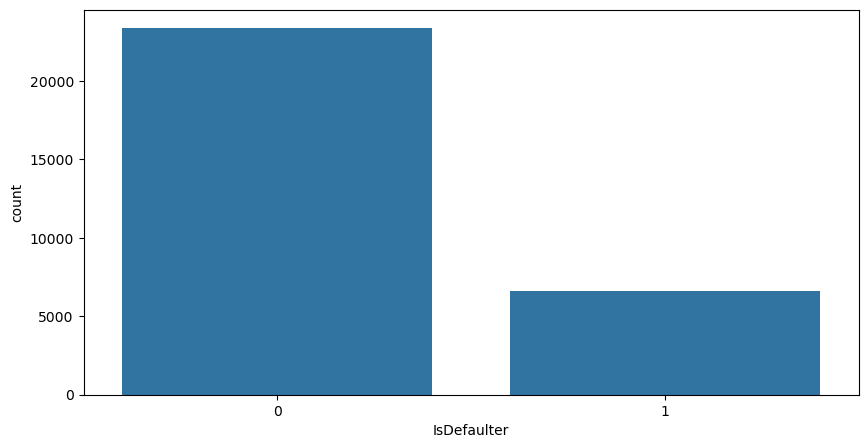

In [29]:
#Displaying the counts of each class (defaulter vs. non-defaulter) within the IsDefaulter column

plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [31]:
df['IsDefaulter'].value_counts()

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

#As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

# Independent Variable

#Categorical Features
#We have few categorical features in our dataset. Let'Check how they are related with out target class.

SEX

1 - Male 2 - Female

In [46]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

#Education

In [48]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

#As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [52]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0) #Creating a filter
df.loc[fil, 'EDUCATION'] = 4 #applying the filter and recategorizing
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

#Marriage

In [54]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

#We have few values for 0, which are not determined . So I am adding them in Others category.

In [58]:
fil = df['MARRIAGE'] == 0 #Creating a Filter
df.loc[fil, 'MARRIAGE'] = 3   #Applying the Filter and Re-categorizing
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

#Plotting our categorical features

In [61]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']       #Defining Categorical features

In [63]:
df_cat = df[categorical_features]        #Creating a Subset with Categorical Features
df_cat['Defaulter'] = df['IsDefaulter']    #Adding the Target Variable
     

In [65]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},                  #Replacing Numeric Categories with Strings
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

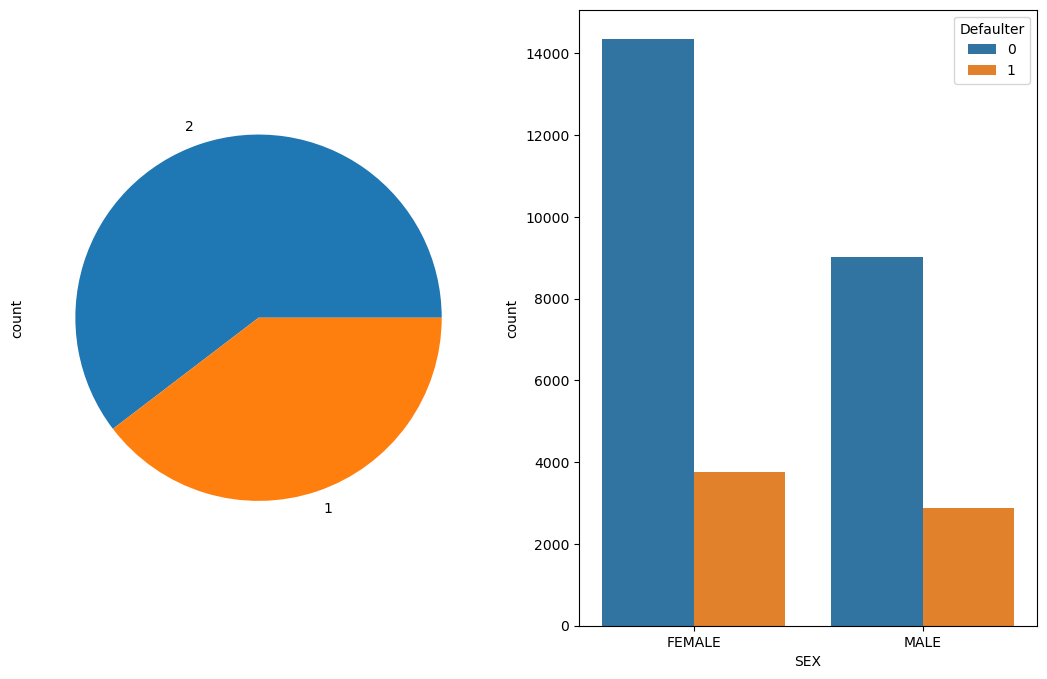

<Figure size 1000x500 with 0 Axes>

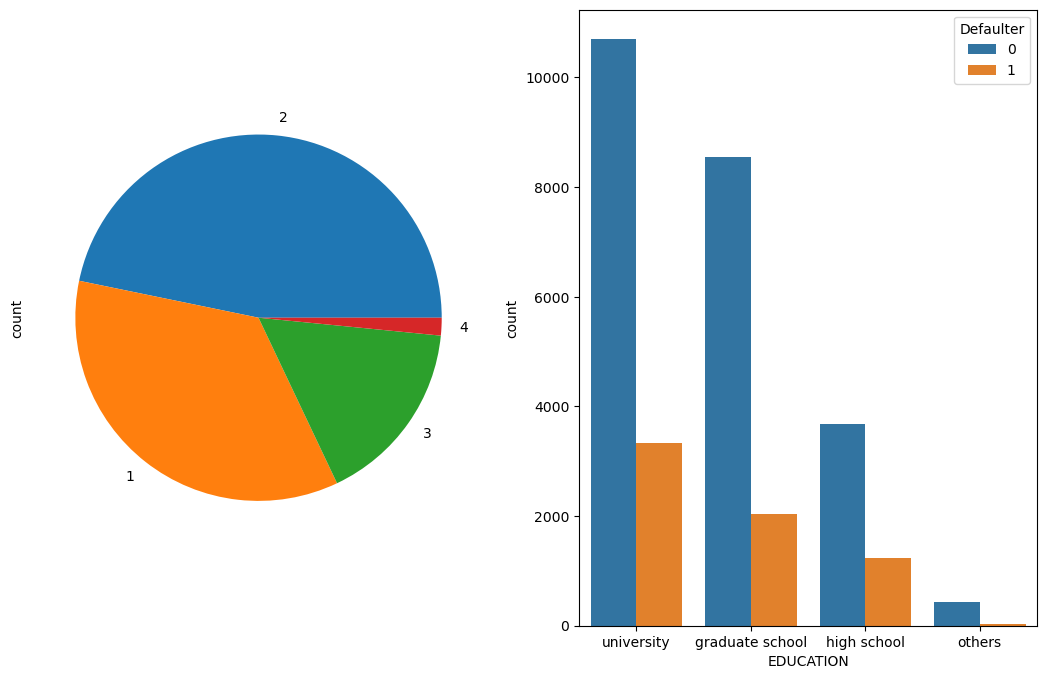

<Figure size 1000x500 with 0 Axes>

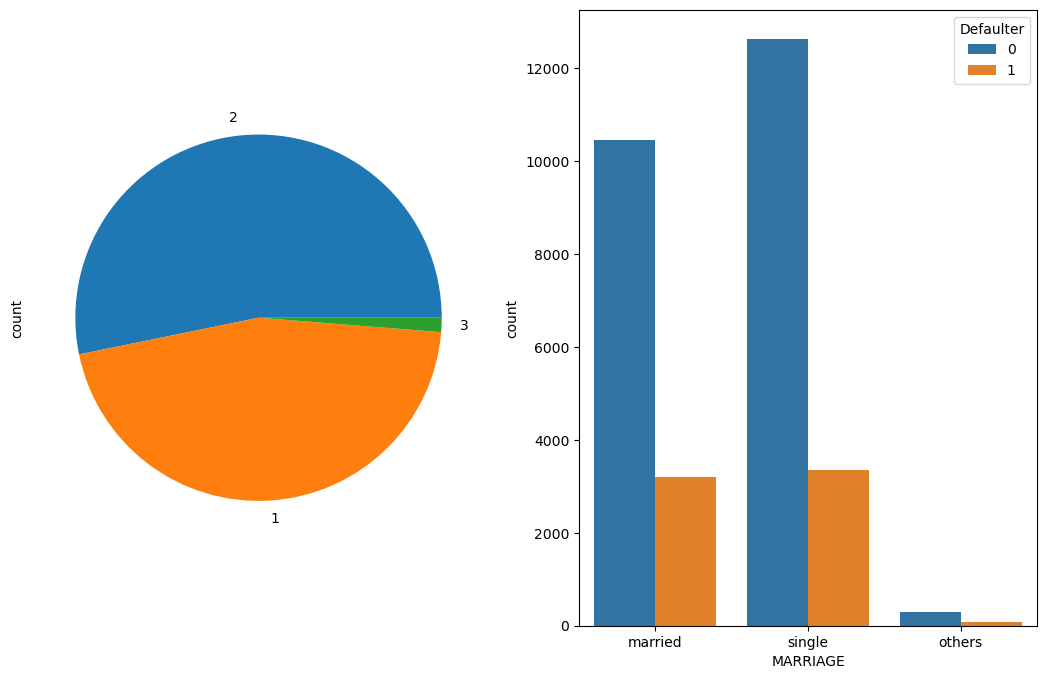

In [67]:

for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

#Observation for categorical features

The dataset indicates a higher number of female credit card holders, with a significant proportion of defaulters being female.
    
Among defaulters, there is a notable representation of individuals with higher education levels, specifically those who attended graduate school or university.

Additionally, single individuals constitute a larger portion of the defaulter group compared to married individuals.

# Limit Balance

In [71]:
df['LIMIT_BAL'].max()

1000000

In [73]:
df['LIMIT_BAL'].min()

10000

In [75]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

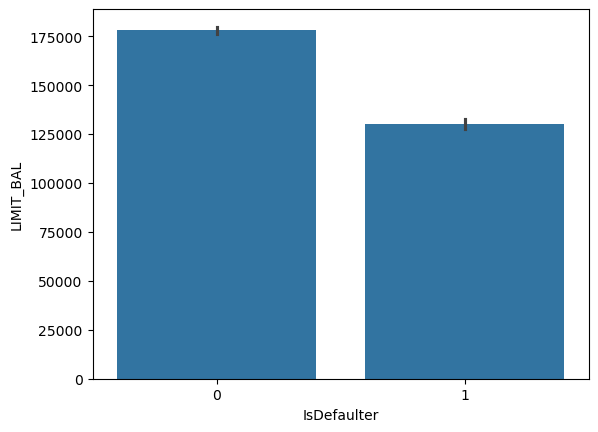

In [77]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)   #The bar plot helps visualize the average credit limit for defaulters and non-defaulters

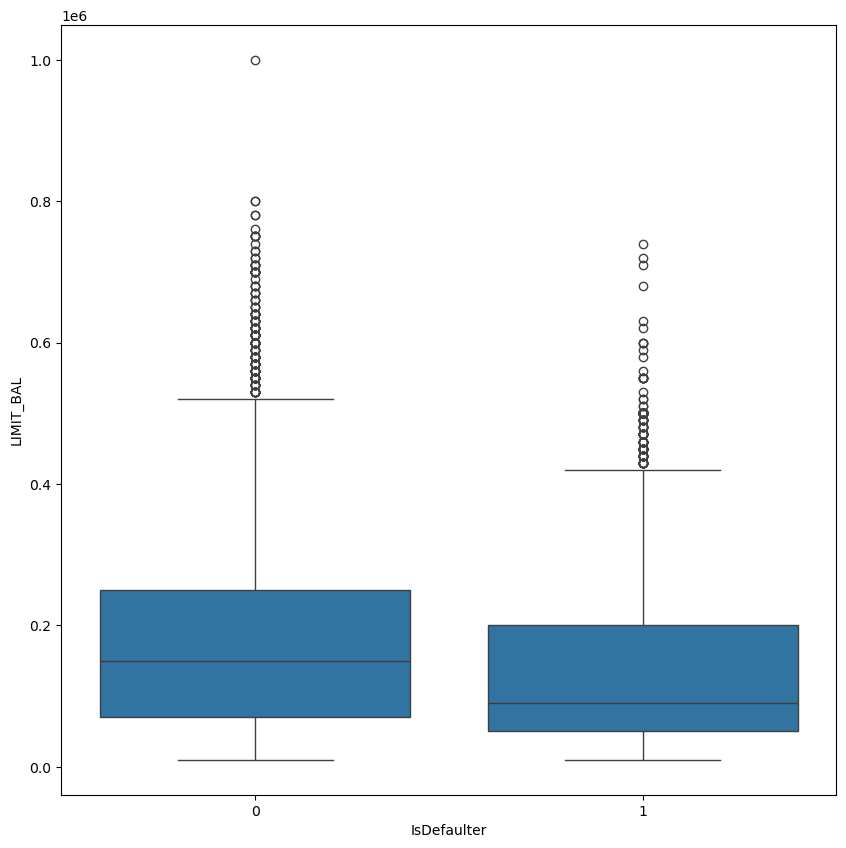

In [79]:
"""
Creating a box plot to visualize the distribution of LIMIT_BAL (the amount of credit) for two groups:
defaulters (1) and non-defaulters (0).

Purpose:
Box Plot: Displays the median, quartiles, and potential outliers in the credit limit amounts for each group.
Insights: This can help identify differences in credit limits between defaulters and non-defaulters,
revealing patterns or anomalies in the data.
"""

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

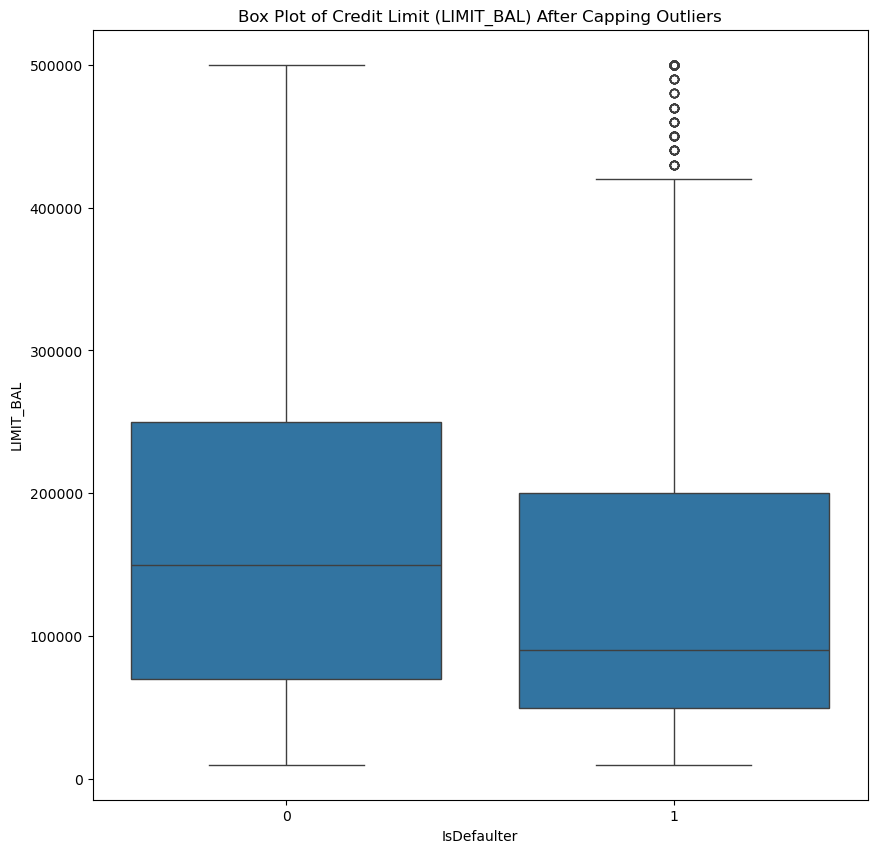

In [81]:
# Cap the outliers in LIMIT_BAL at the 99th percentile
cap_value = df['LIMIT_BAL'].quantile(0.99)
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] > cap_value, cap_value, df['LIMIT_BAL'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)
plt.title("Box Plot of Credit Limit (LIMIT_BAL) After Capping Outliers")
plt.show()

#Handling Outliers for LIMIT_BAL

#We identified and visualized the outliers in the LIMIT_BAL variable using a box plot.

#To manage the extreme values, we capped the outliers at the 99th percentile.

#This approach helps reduce the influence of extreme values while preserving the overall data pattern.

#Observation: The capped values showed a more manageable distribution with fewer extreme values.

#Decision: Proceed with the capped LIMIT_BAL values to improve data robustness and model performance.

In [84]:
#renaming columns to improve readability and understanding.

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
     

In [86]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1    20000.0    2          2         1   24         2        2       -1   
1   2   120000.0    2          2         2   26        -1        2        0   
2   3    90000.0    2          2         2   34         0        0        0   
3   4    50000.0    2          2         1   37         0        0        0   
4   5    50000.0    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1  ...             0             0             0          689   
1        0  ...          3455          3261             0         1000   
2        0  ...         14948         15549          1518         1500   
3        0  ...         28959         29547          2000         2019   
4        0  ...         19146         19131          2000        36681   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0            0            0            0            0   
1         1000         1000            0         2000   
2         1000         1000         1000         5000   
3         1200         1100         1069         1000   
4        10000         9000          689          679   

   default payment next month  IsDefaulter  
0                           1            1  
1                           1            1  
2                           0            0  
3                           0            0  
4                           0            0  

[5 rows x 26 columns]

In [ ]:
AGE
Plotting graph of number of ages of all people with credit card irrespective of gender.

In [88]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [90]:
df['AGE']=df['AGE'].astype('int')

"""
converts the AGE column in the DataFrame df to the integer data type. This ensures that all age values are treated as integers,
which is important for numerical operations and analysis, such as plotting or calculations.
"""

'\nconverts the AGE column in the DataFrame df to the integer data type. This ensures that all age values are treated as integers,\nwhich is important for numerical operations and analysis, such as plotting or calculations.\n'

<Axes: xlabel='AGE', ylabel='Count'>

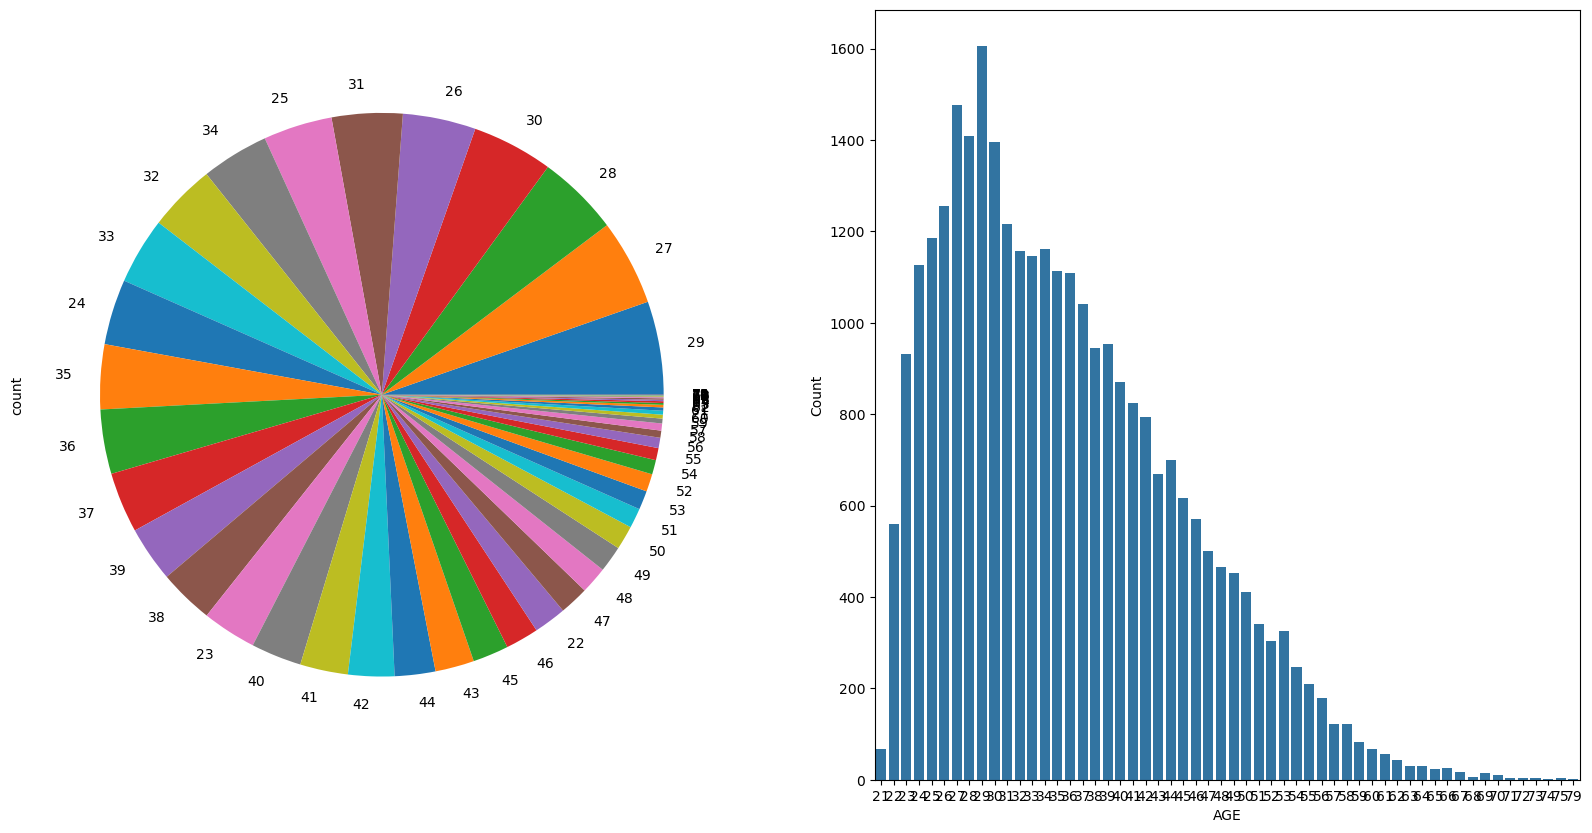

In [92]:
Day_df = df['AGE'].value_counts().reset_index()
Day_df.columns = ['AGE', 'Count']  # Rename columns for clarity

# Create the plots
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))        #Creates a figure with two subplots side by side.
df['AGE'].value_counts().plot(kind="pie", ax=axes[0], subplots=True)          #Plots a pie chart showing the distribution of ages.
sns.barplot(x='AGE', y='Count', data=Day_df, ax=axes[1], orient='v')          #Creates a bar plot showing the count of each age.

# Visualization of the AGE data, helping to understand the distribution of ages among credit card holders effectively.
     

In [94]:
# Calculate the mean age of customers based on their default status.
# This analysis helps to assess the relationship between age and credit card default behavior,
# providing insights into whether age is a significant factor in predicting defaults.

df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [96]:
# Convert all columns in the DataFrame to integer data type.
# This is necessary to ensure consistency in data types for analysis,
# especially when performing mathematical operations or modeling,
# which may require integer inputs rather than other types like floats.

df = df.astype('int')
     

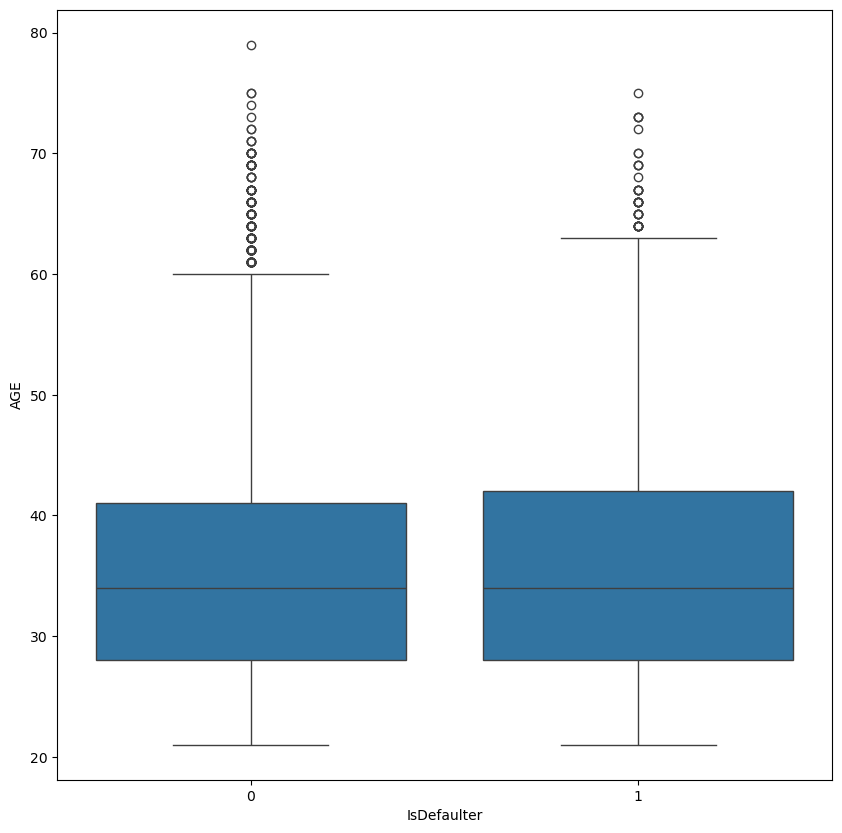

In [98]:
# Create a boxplot to visualize the distribution of age for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the age distribution
# for defaulters (1) and non-defaulters (0). This visualization can reveal trends in age related to credit card default risk.

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

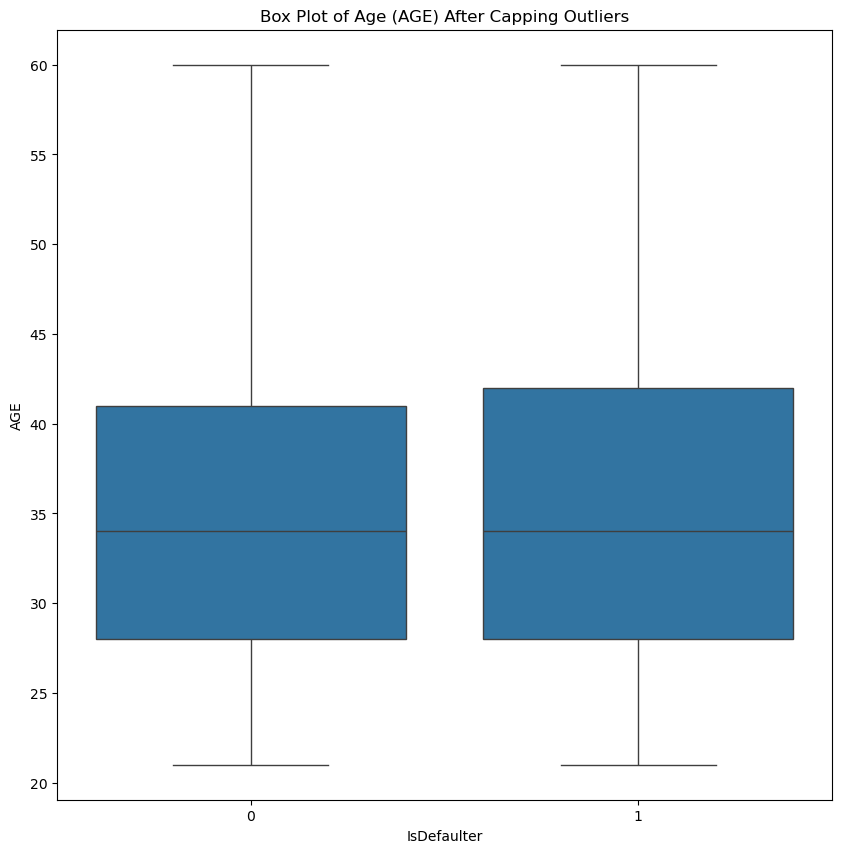

In [100]:
# Cap the outliers in AGE at the 99th percentile
cap_value_age = df['AGE'].quantile(0.99)
df['AGE'] = np.where(df['AGE'] > cap_value_age, cap_value_age, df['AGE'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)
plt.title("Box Plot of Age (AGE) After Capping Outliers")
plt.show()

In [ ]:
# We identified and visualized the outliers in the AGE variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.
# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped AGE values to enhance data quality and model performance.

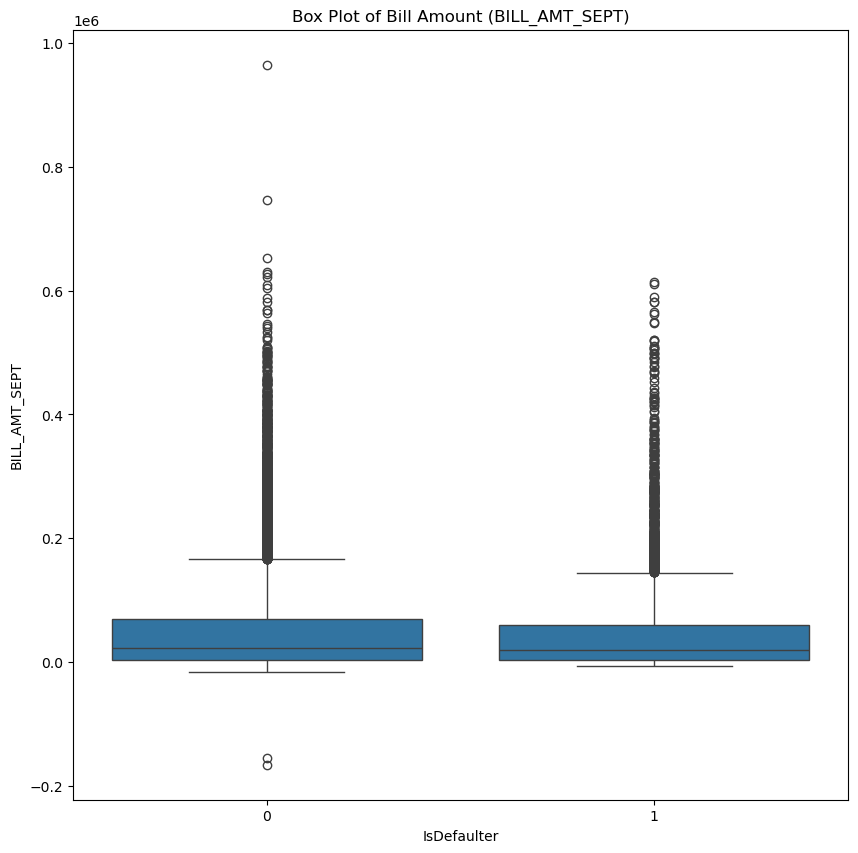

In [102]:
# Create a box plot to visualize the distribution of bill amount for September for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the bill amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_SEPT", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_SEPT)")
plt.show()
     

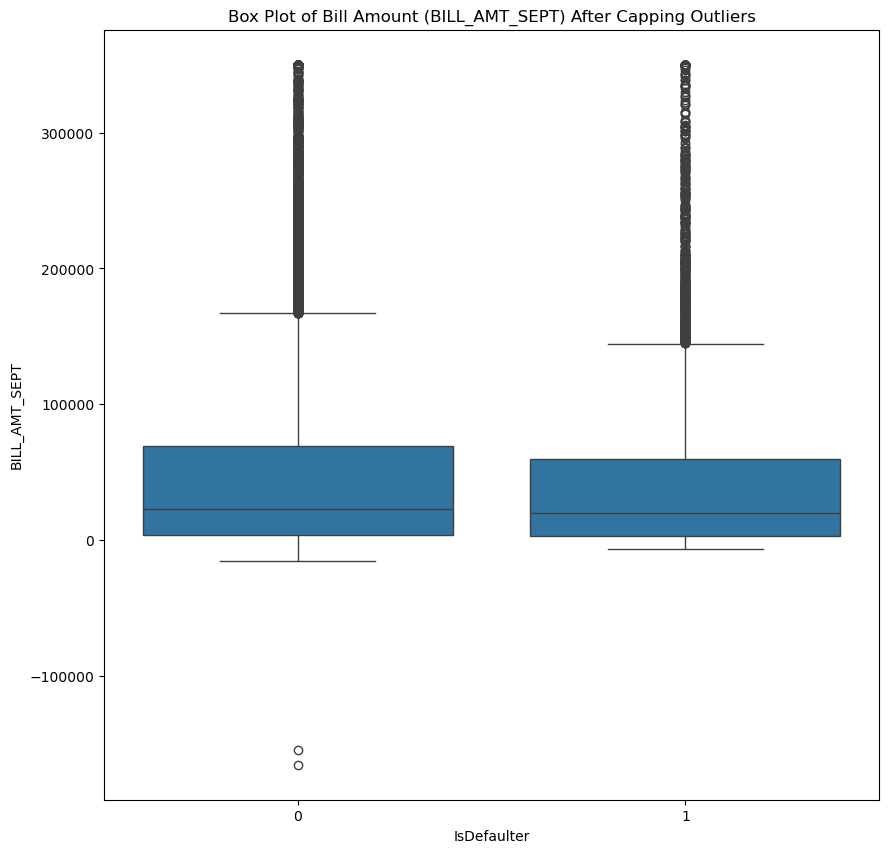

In [104]:
# Cap the outliers in BILL_AMT_SEPT at the 99th percentile
cap_value_bill_sept = df['BILL_AMT_SEPT'].quantile(0.99)
df['BILL_AMT_SEPT'] = np.where(df['BILL_AMT_SEPT'] > cap_value_bill_sept, cap_value_bill_sept, df['BILL_AMT_SEPT'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_SEPT", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_SEPT) After Capping Outliers")
plt.show()

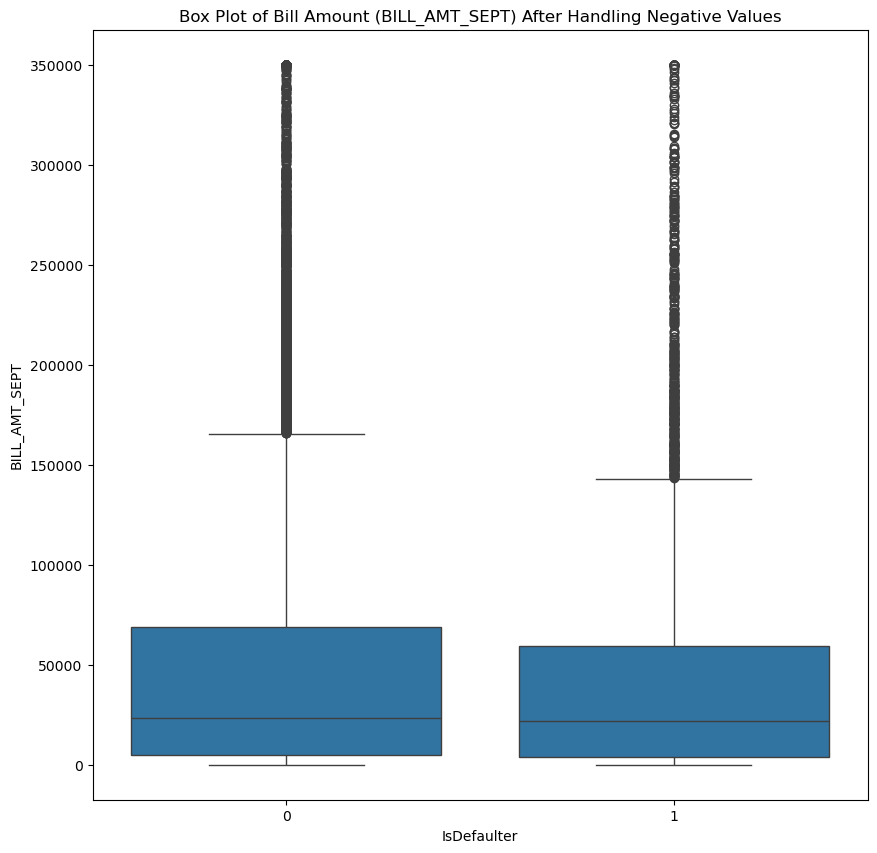

In [106]:
# Identifying negative values in BILL_AMT_SEPT
negative_values = df[df['BILL_AMT_SEPT'] < 0]

# Handling strategy: Replace negative values with the median of the variable
median_value = df['BILL_AMT_SEPT'].median()
df['BILL_AMT_SEPT'] = np.where(df['BILL_AMT_SEPT'] < 0, median_value, df['BILL_AMT_SEPT'])

# Verifying the changes
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_SEPT", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_SEPT) After Handling Negative Values")
plt.show()

In [108]:
# Handling Negative Values in BILL_AMT_SEPT

# We identified negative values in the BILL_AMT_SEPT variable that could indicate data entry errors or unique transactions.
# To address these, we replaced the negative values with the median of the variable.
# This approach ensures that the data remains consistent and suitable for analysis.

# Observation: The corrected values showed a more consistent distribution.
# Decision: Proceed with the corrected BILL_AMT_SEPT values to enhance data quality and model performance.
     

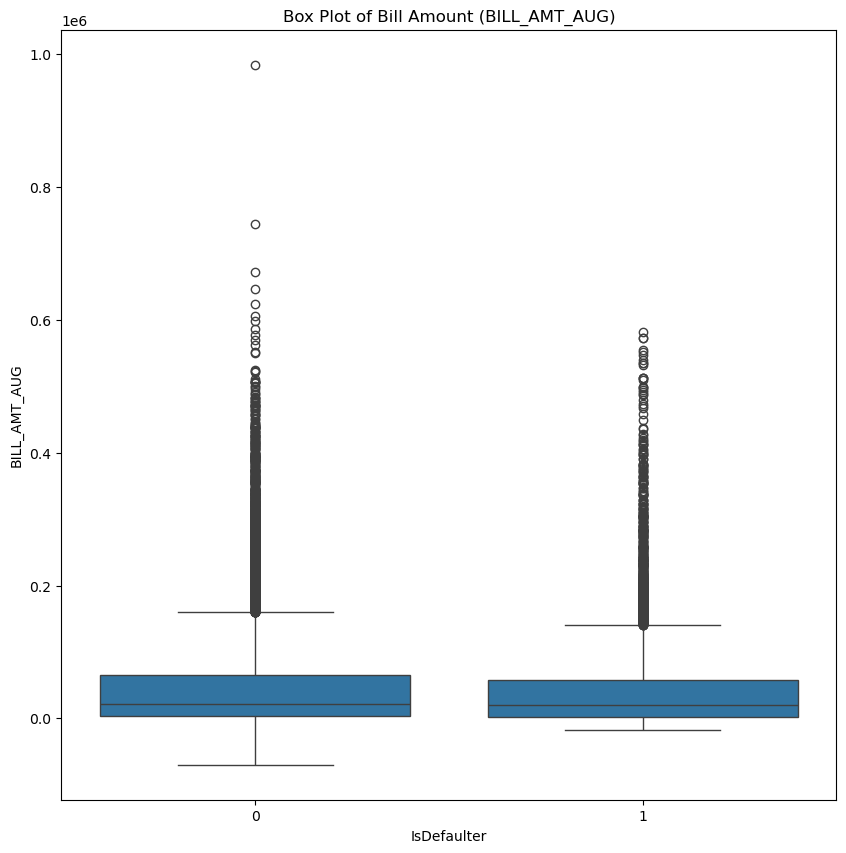

In [110]:
# Create a box plot to visualize the distribution of bill amount for August for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the bill amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_AUG", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_AUG)")
plt.show()

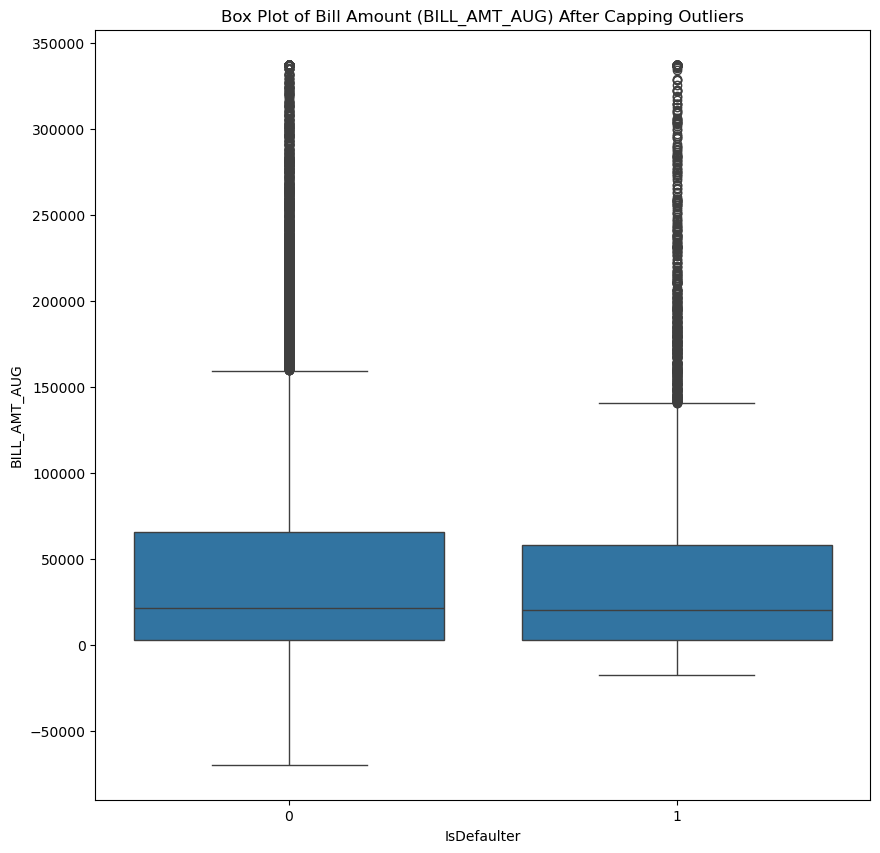

In [112]:
# Cap the outliers in BILL_AMT_AUG at the 99th percentile
cap_value_bill_aug = df['BILL_AMT_AUG'].quantile(0.99)
df['BILL_AMT_AUG'] = np.where(df['BILL_AMT_AUG'] > cap_value_bill_aug, cap_value_bill_aug, df['BILL_AMT_AUG'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_AUG", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_AUG) After Capping Outliers")
plt.show()

In [114]:
# Handling Outliers for BILL_AMT_AUG

# We identified and visualized the outliers in the BILL_AMT_AUG variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped BILL_AMT_AUG values to enhance data quality and model performance.
# Remaining Outliers: Some outliers remain within an acceptable range to maintain data integrity.

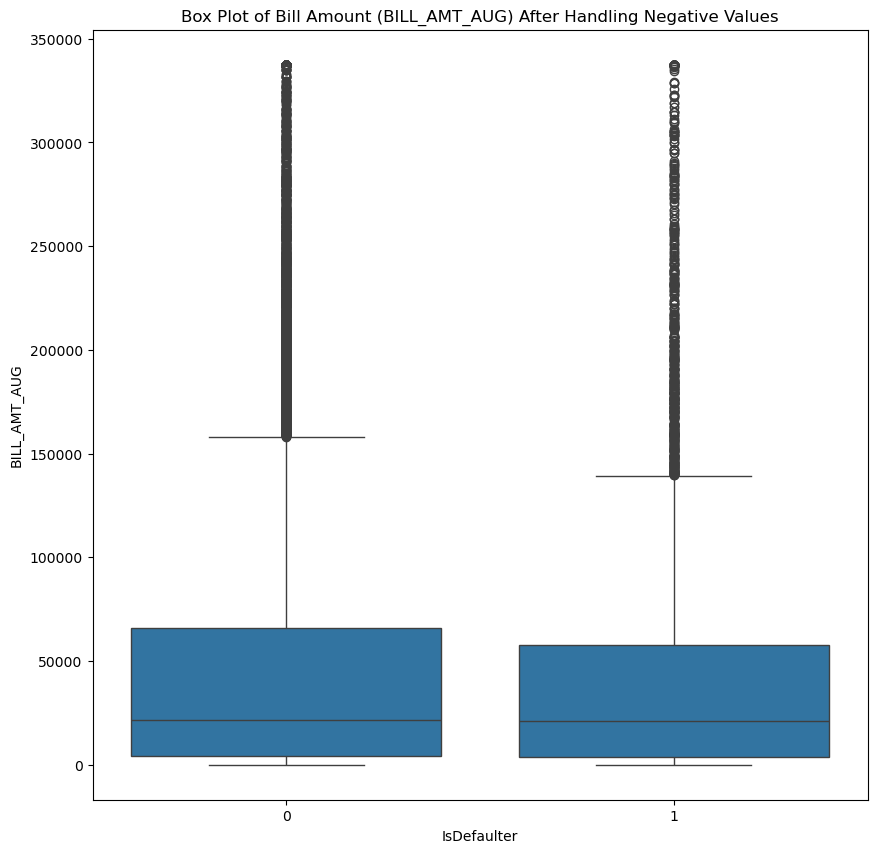

In [116]:
# Identifying negative values in BILL_AMT_AUG
negative_values = df[df['BILL_AMT_AUG'] < 0]

# Handling strategy: Replace negative values with the median of the variable
median_value = df['BILL_AMT_AUG'].median()
df['BILL_AMT_AUG'] = np.where(df['BILL_AMT_AUG'] < 0, median_value, df['BILL_AMT_AUG'])

# Verifying the changes
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_AUG", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_AUG) After Handling Negative Values")
plt.show()

In [ ]:
# Handling Negative Values in BILL_AMT_AUG

# We identified negative values in the BILL_AMT_AUG variable that could indicate data entry errors or unique transactions.
# To address these, we replaced the negative values with the median of the variable.
# This approach ensures that the data remains consistent and suitable for analysis.

# Observation: The corrected values showed a more consistent distribution.
# Decision: Proceed with the corrected BILL_AMT_AUG values to enhance data quality and model performance.
     

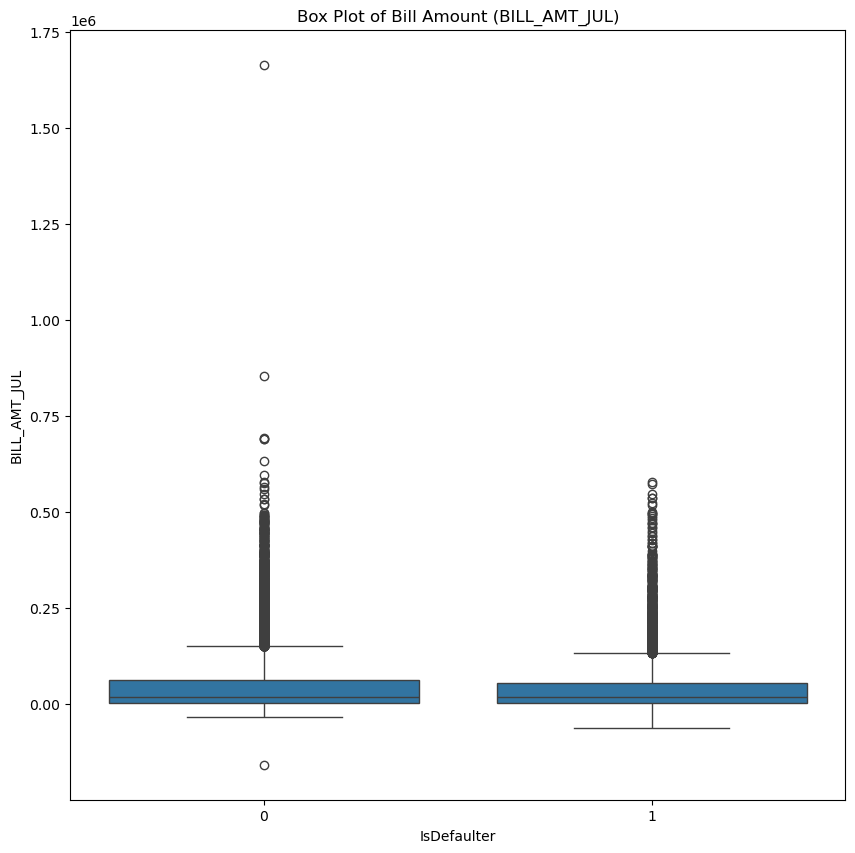

In [118]:
# Create a box plot to visualize the distribution of bill amount for July for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the bill amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_JUL", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_JUL)")
plt.show()

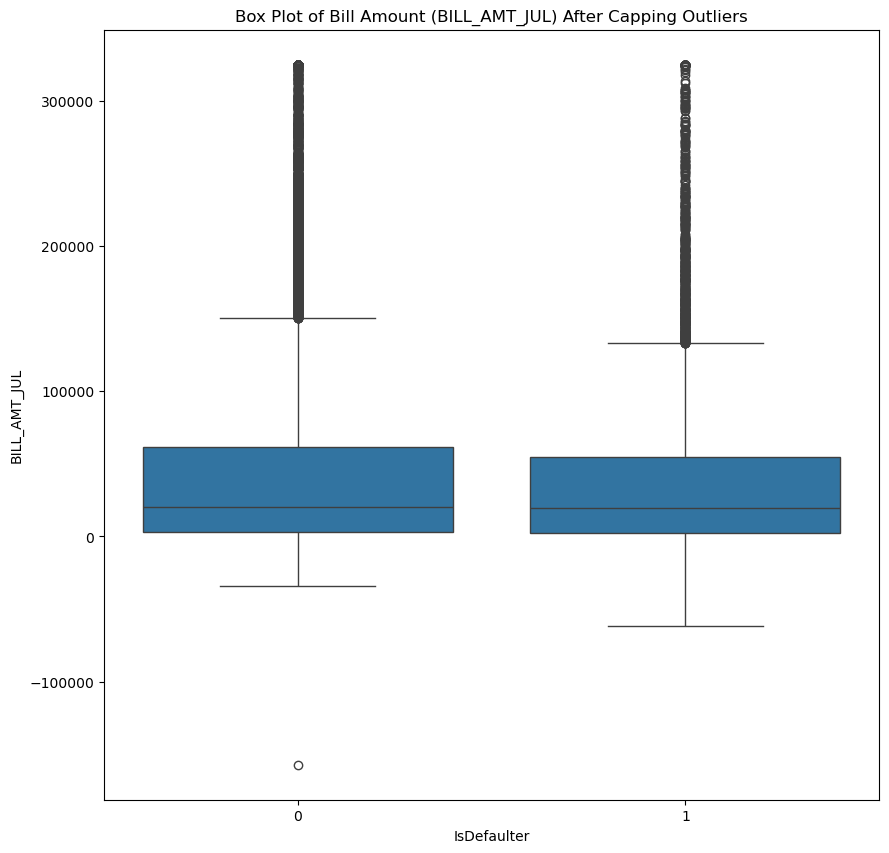

In [120]:
# Cap the outliers in BILL_AMT_JUL at the 99th percentile
cap_value_bill_jul = df['BILL_AMT_JUL'].quantile(0.99)
df['BILL_AMT_JUL'] = np.where(df['BILL_AMT_JUL'] > cap_value_bill_jul, cap_value_bill_jul, df['BILL_AMT_JUL'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_JUL", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_JUL) After Capping Outliers")
plt.show()

In [ ]:
# Handling Outliers for BILL_AMT_JUL

# We identified and visualized the outliers in the BILL_AMT_JUL variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped BILL_AMT_JUL values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.

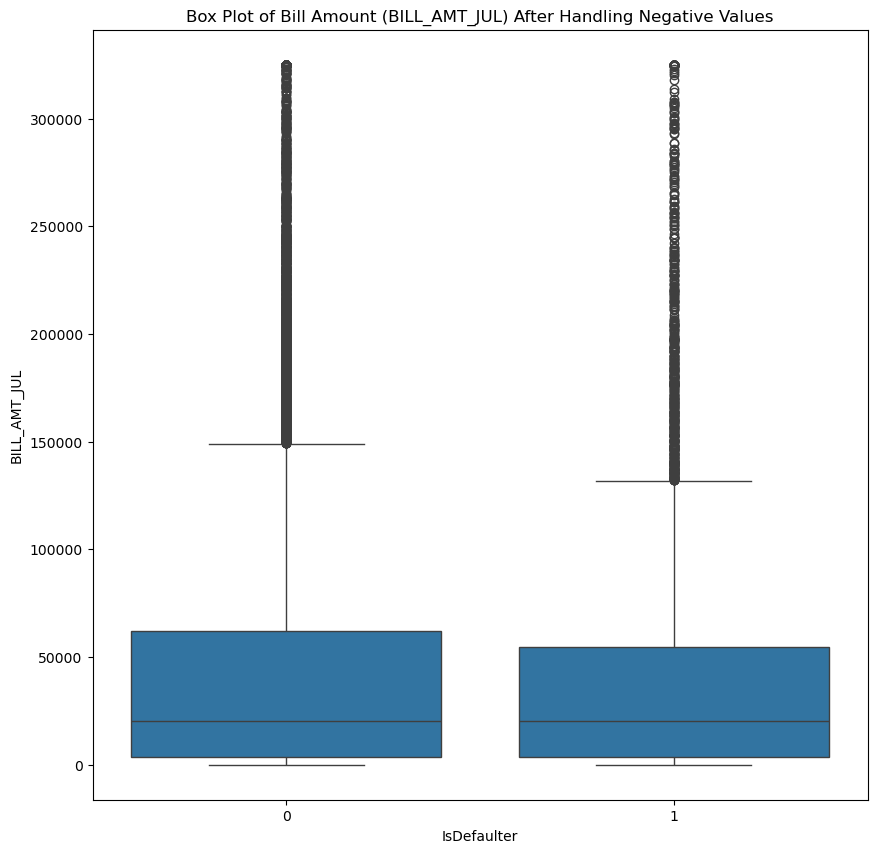

In [122]:
# Identifying negative values in BILL_AMT_JUL
negative_values = df[df['BILL_AMT_JUL'] < 0]

# Handling strategy: Replace negative values with the median of the variable
median_value = df['BILL_AMT_JUL'].median()
df['BILL_AMT_JUL'] = np.where(df['BILL_AMT_JUL'] < 0, median_value, df['BILL_AMT_JUL'])

# Verifying the changes
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_JUL", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_JUL) After Handling Negative Values")
plt.show()

In [124]:
# Handling Negative Values in BILL_AMT_JUL

# We identified negative values in the BILL_AMT_JUL variable that could indicate data entry errors or unique transactions.
# To address these, we replaced the negative values with the median of the variable.
# This approach ensures that the data remains consistent and suitable for analysis.

# Observation: The corrected values showed a more consistent distribution.
# Decision: Proceed with the corrected BILL_AMT_JUL values to enhance data quality and model performance.
     

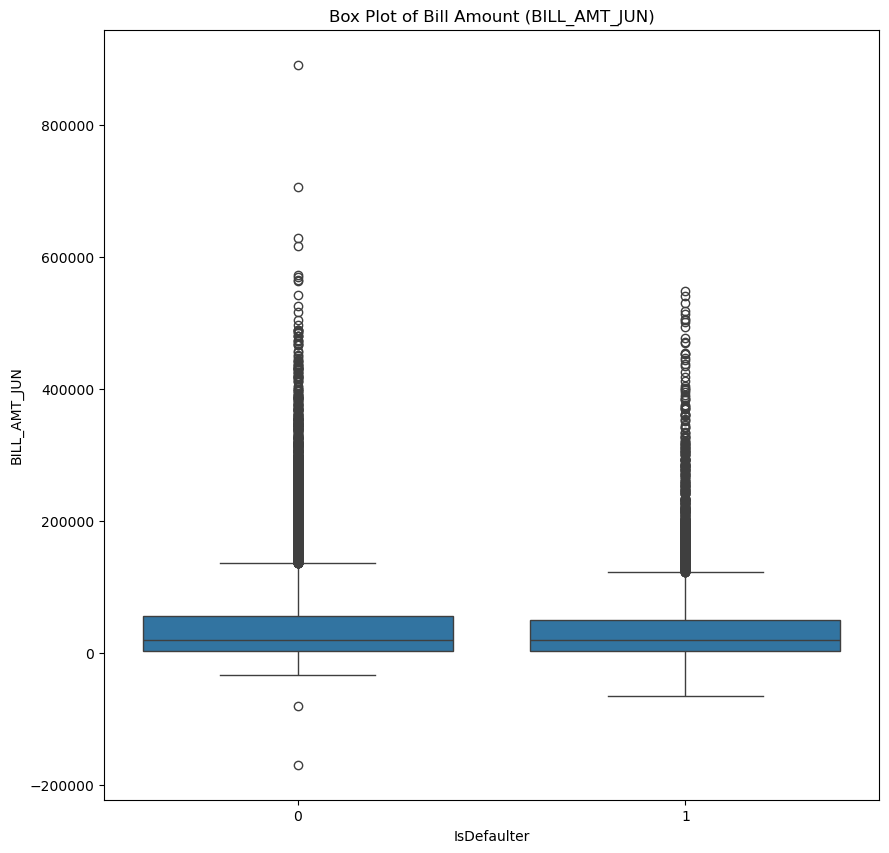

In [126]:
# Create a box plot to visualize the distribution of bill amount for June for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the bill amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_JUN", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_JUN)")
plt.show()

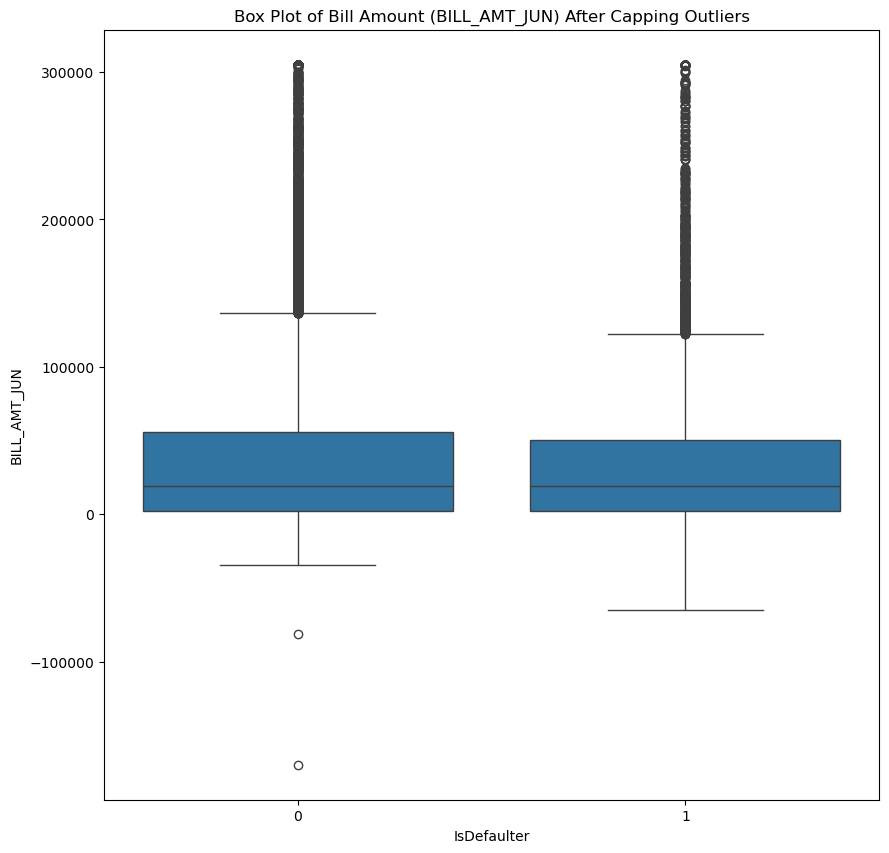

In [128]:
# Cap the outliers in BILL_AMT_JUN at the 99th percentile
cap_value_bill_jun = df['BILL_AMT_JUN'].quantile(0.99)
df['BILL_AMT_JUN'] = np.where(df['BILL_AMT_JUN'] > cap_value_bill_jun, cap_value_bill_jun, df['BILL_AMT_JUN'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_JUN", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_JUN) After Capping Outliers")
plt.show()
     

In [130]:
# Handling Outliers for BILL_AMT_JUN

# We identified and visualized the outliers in the BILL_AMT_JUN variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped BILL_AMT_JUN values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.
     

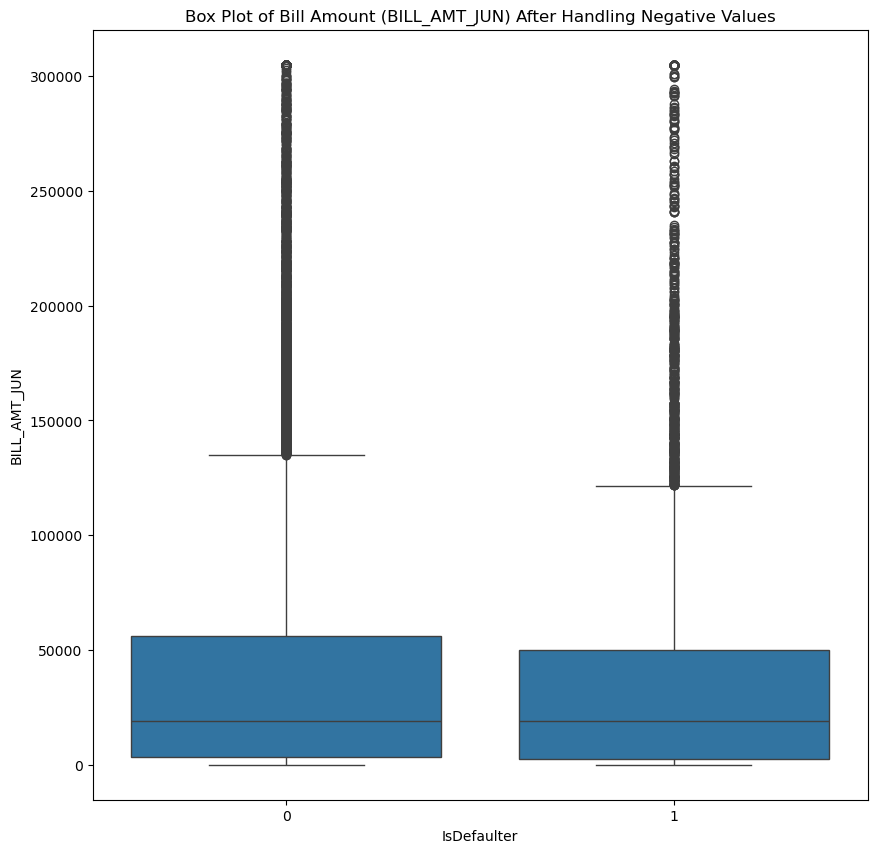

In [132]:

# Identifying negative values in BILL_AMT_JUN
negative_values = df[df['BILL_AMT_JUN'] < 0]

# Handling strategy: Replace negative values with the median of the variable
median_value = df['BILL_AMT_JUN'].median()
df['BILL_AMT_JUN'] = np.where(df['BILL_AMT_JUN'] < 0, median_value, df['BILL_AMT_JUN'])

# Verifying the changes
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_JUN", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_JUN) After Handling Negative Values")
plt.show()

In [ ]:
# Handling Negative Values in BILL_AMT_JUN

# We identified negative values in the BILL_AMT_JUN variable that could indicate data entry errors or unique transactions.
# To address these, we replaced the negative values with the median of the variable.
# This approach ensures that the data remains consistent and suitable for analysis.

# Observation: The corrected values showed a more consistent distribution.
# Decision: Proceed with the corrected BILL_AMT_JUN values to enhance data quality and model performance.
     

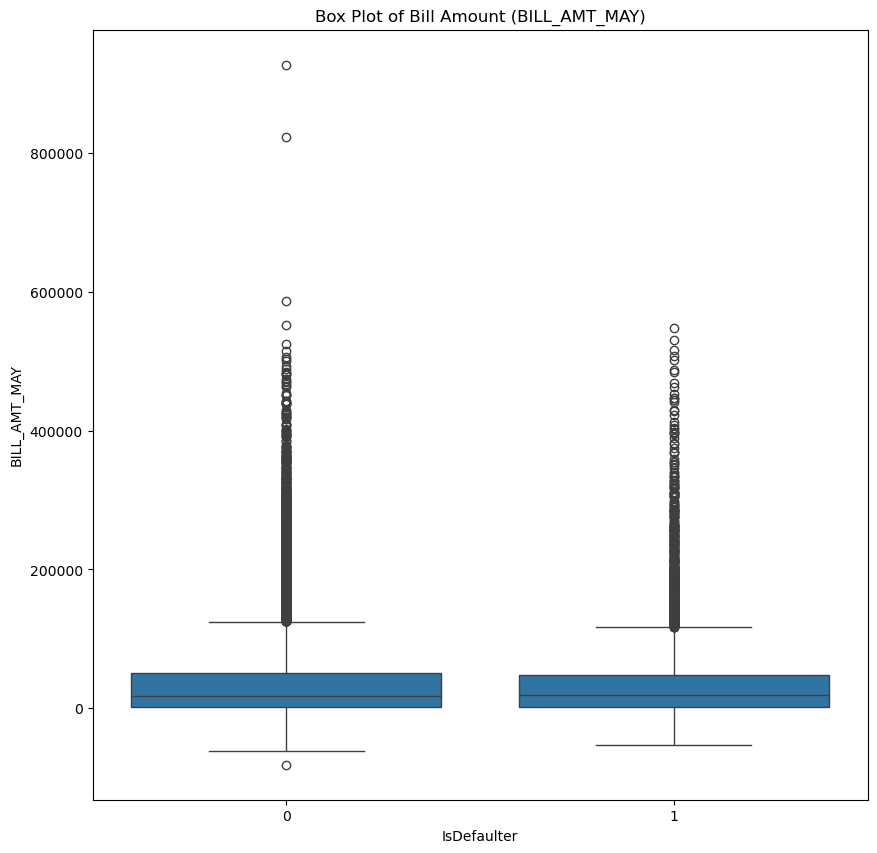

In [134]:
# Create a box plot to visualize the distribution of bill amount for May for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the bill amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_MAY", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_MAY)")
plt.show()

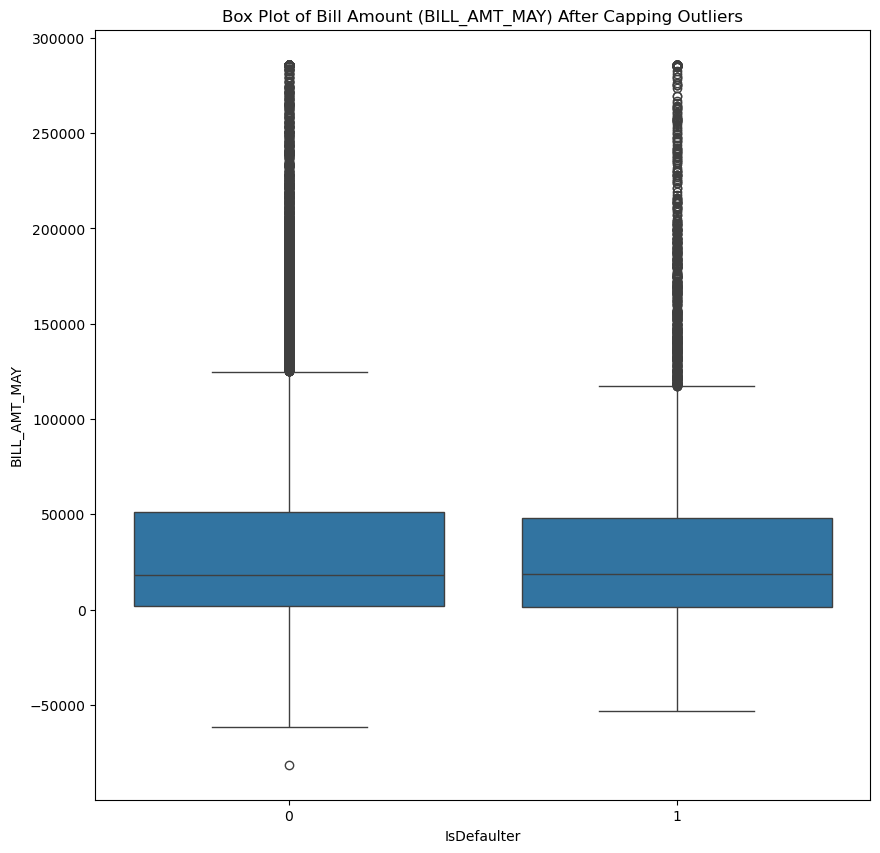

In [136]:
# Cap the outliers in BILL_AMT_MAY at the 99th percentile
cap_value_bill_may = df['BILL_AMT_MAY'].quantile(0.99)
df['BILL_AMT_MAY'] = np.where(df['BILL_AMT_MAY'] > cap_value_bill_may, cap_value_bill_may, df['BILL_AMT_MAY'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_MAY", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_MAY) After Capping Outliers")
plt.show()

In [138]:
# Handling Outliers for BILL_AMT_MAY

# We identified and visualized the outliers in the BILL_AMT_MAY variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped BILL_AMT_MAY values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.
     

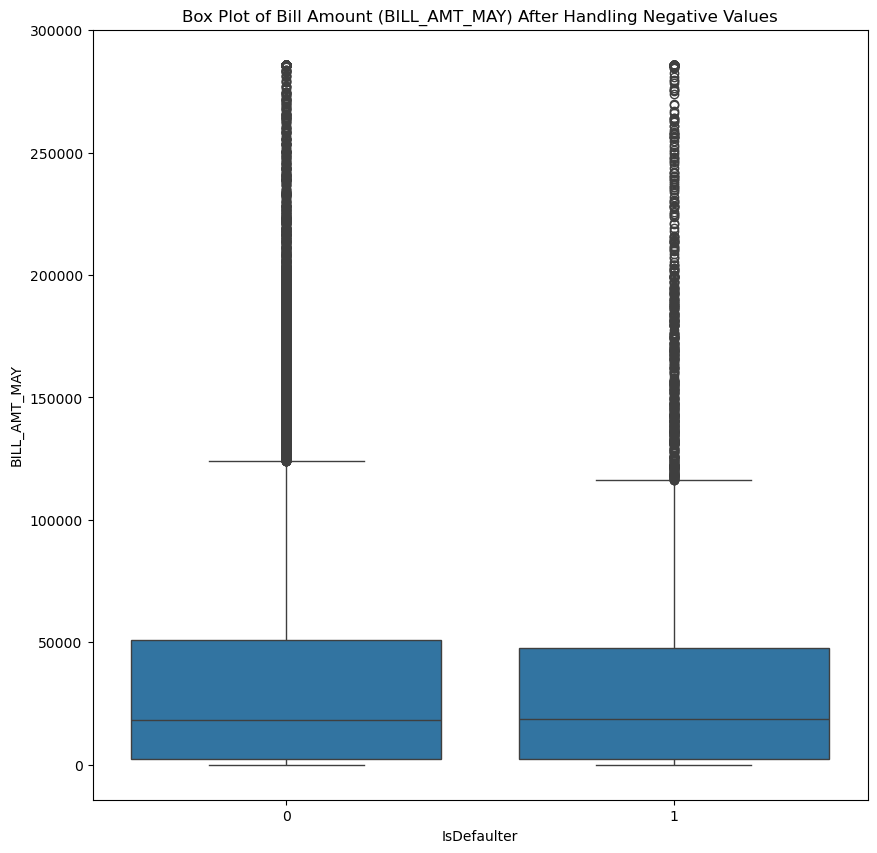

In [140]:
# Identifying negative values in BILL_AMT_MAY
negative_values = df[df['BILL_AMT_MAY'] < 0]

# Handling strategy: Replace negative values with the median of the variable
median_value = df['BILL_AMT_MAY'].median()
df['BILL_AMT_MAY'] = np.where(df['BILL_AMT_MAY'] < 0, median_value, df['BILL_AMT_MAY'])

# Verifying the changes
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_MAY", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_MAY) After Handling Negative Values")
plt.show()

In [142]:
# Handling Negative Values in BILL_AMT_MAY

# We identified negative values in the BILL_AMT_MAY variable that could indicate data entry errors or unique transactions.
# To address these, we replaced the negative values with the median of the variable.
# This approach ensures that the data remains consistent and suitable for analysis.

# Observation: The corrected values showed a more consistent distribution.
# Decision: Proceed with the corrected BILL_AMT_MAY values to enhance data quality and model performance.
     

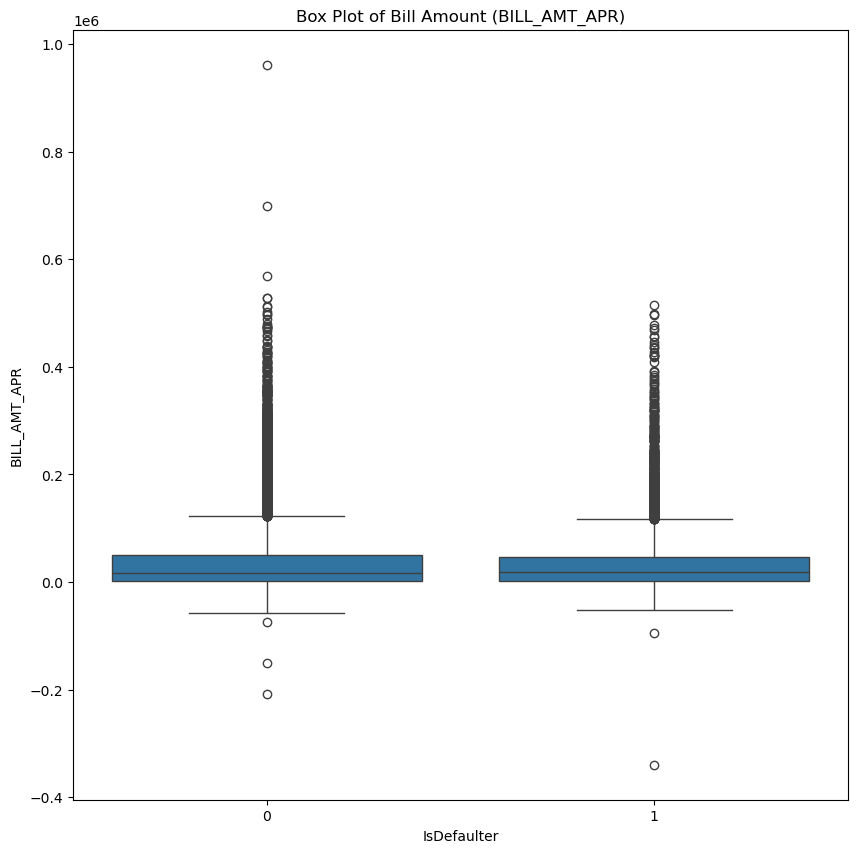

In [144]:
# Create a box plot to visualize the distribution of bill amount for April for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the bill amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_APR", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_APR)")
plt.show()

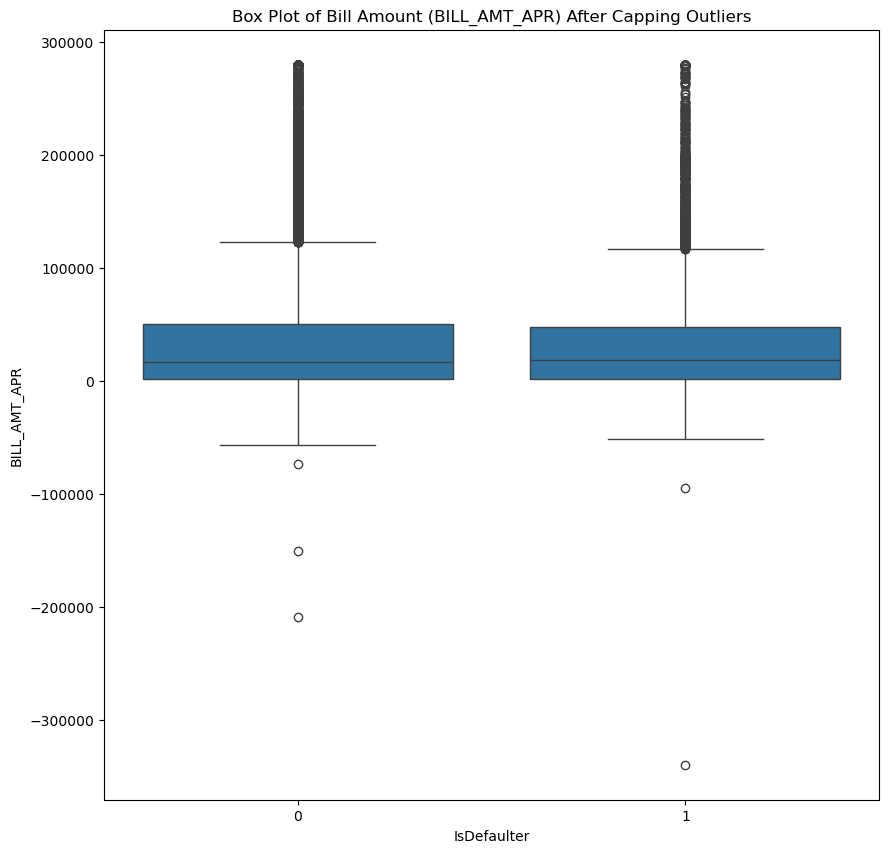

In [146]:
# Cap the outliers in BILL_AMT_APR at the 99th percentile
cap_value_bill_apr = df['BILL_AMT_APR'].quantile(0.99)
df['BILL_AMT_APR'] = np.where(df['BILL_AMT_APR'] > cap_value_bill_apr, cap_value_bill_apr, df['BILL_AMT_APR'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_APR", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_APR) After Capping Outliers")
plt.show()
     

In [148]:
# Handling Outliers for BILL_AMT_APR

# We identified and visualized the outliers in the BILL_AMT_APR variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped BILL_AMT_APR values to enhance data quality and model performance.
# Remaining Outliers: Some outliers remain within an acceptable range to maintain data integrity.

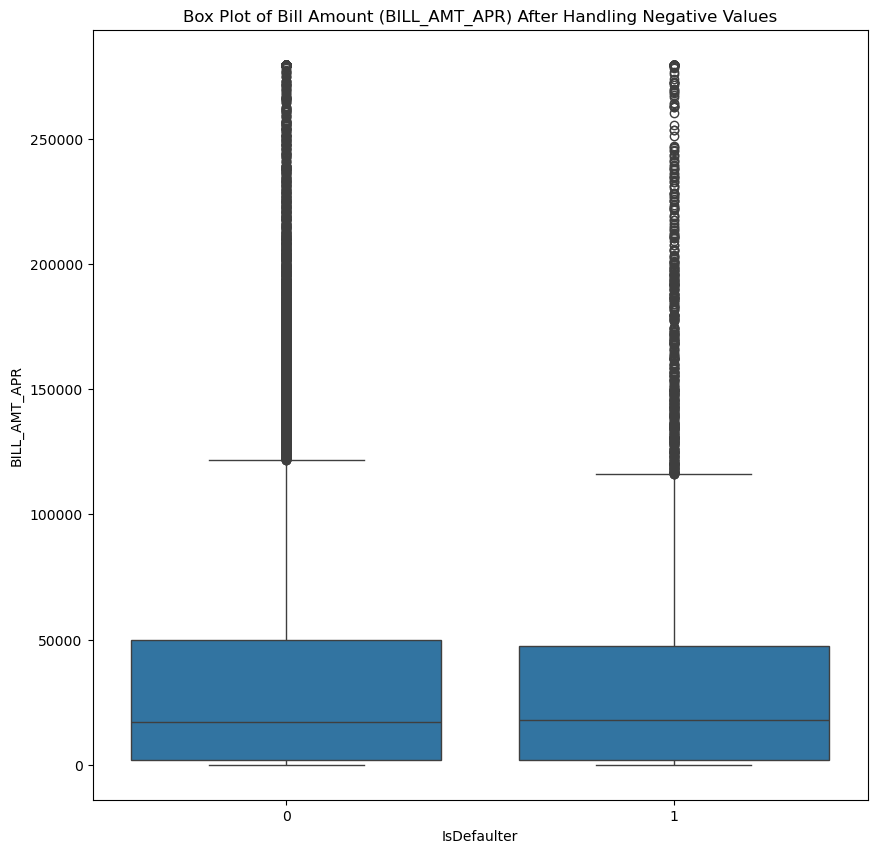

In [150]:
# Identifying negative values in BILL_AMT_APR
negative_values = df[df['BILL_AMT_APR'] < 0]

# Handling strategy: Replace negative values with the median of the variable
median_value = df['BILL_AMT_APR'].median()
df['BILL_AMT_APR'] = np.where(df['BILL_AMT_APR'] < 0, median_value, df['BILL_AMT_APR'])

# Verifying the changes
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="IsDefaulter", y="BILL_AMT_APR", data=df)
plt.title("Box Plot of Bill Amount (BILL_AMT_APR) After Handling Negative Values")
plt.show()

In [152]:
# Handling Negative Values in BILL_AMT_APR

# We identified negative values in the BILL_AMT_APR variable that could indicate data entry errors or unique transactions.
# To address these, we replaced the negative values with the median of the variable.
# This approach ensures that the data remains consistent and suitable for analysis.

# Observation: The corrected values showed a more consistent distribution.
# Decision: Proceed with the corrected BILL_AMT_APR values to enhance data quality and model performance.
     

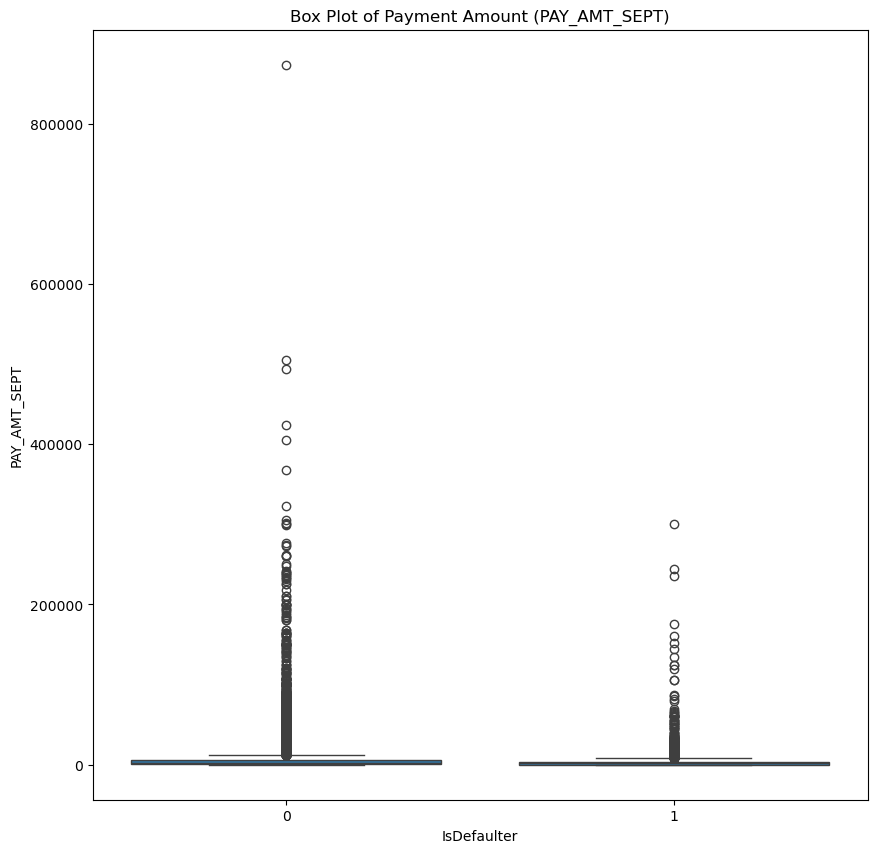

In [154]:
# Create a box plot to visualize the distribution of payment amount for September for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the payment amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_SEPT", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_SEPT)")
plt.show()

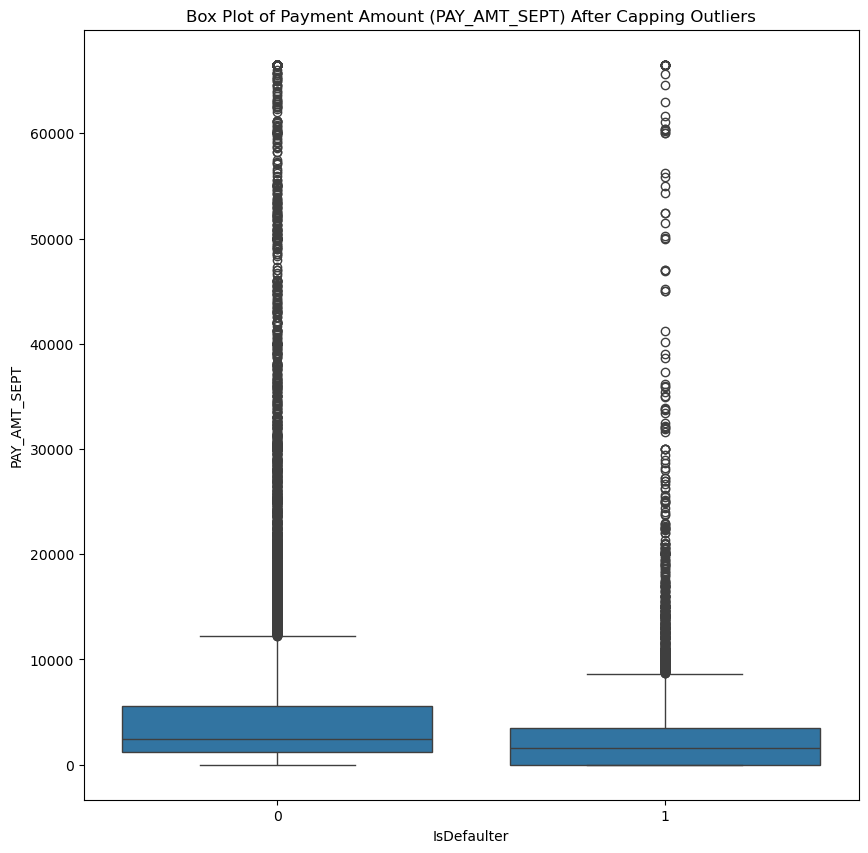

In [156]:
# Cap the outliers in PAY_AMT_SEPT at the 99th percentile
cap_value_pay_amt_sept = df['PAY_AMT_SEPT'].quantile(0.99)
df['PAY_AMT_SEPT'] = np.where(df['PAY_AMT_SEPT'] > cap_value_pay_amt_sept, cap_value_pay_amt_sept, df['PAY_AMT_SEPT'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_SEPT", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_SEPT) After Capping Outliers")
plt.show()

In [158]:
# Handling Outliers for PAY_AMT_SEPT

# We identified and visualized the outliers in the PAY_AMT_SEPT variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# However, some outliers remain visible in the data. These are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.
# Decision: Proceed with the capped PAY_AMT_SEPT values to enhance data quality and model performance.
     

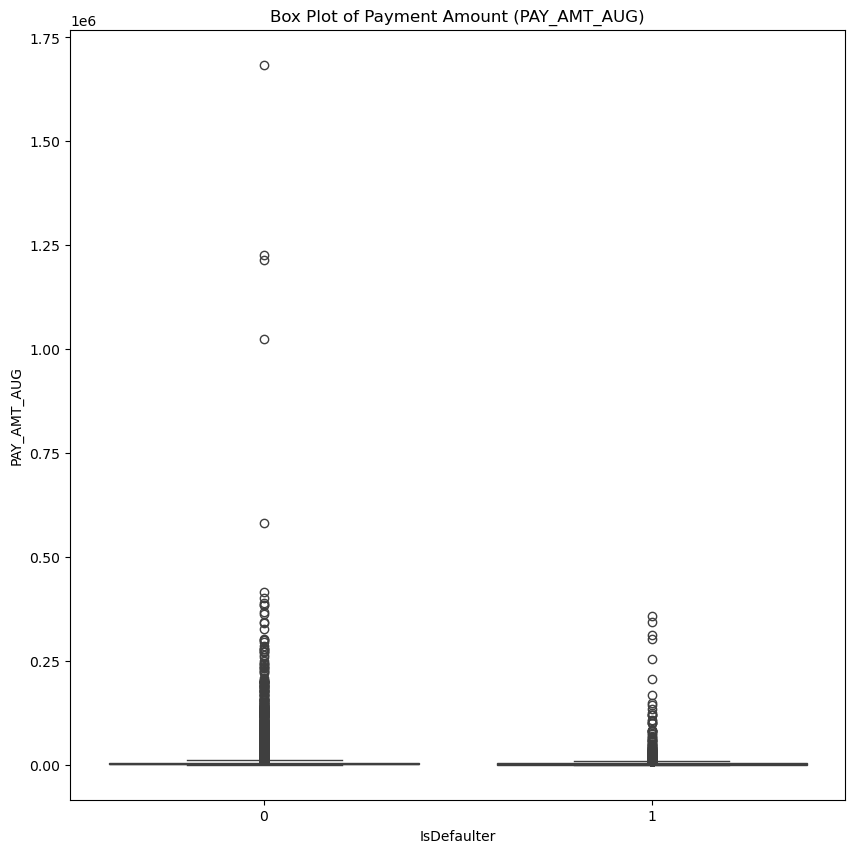

In [160]:
# Create a box plot to visualize the distribution of payment amount for August for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the payment amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_AUG", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_AUG)")
plt.show()

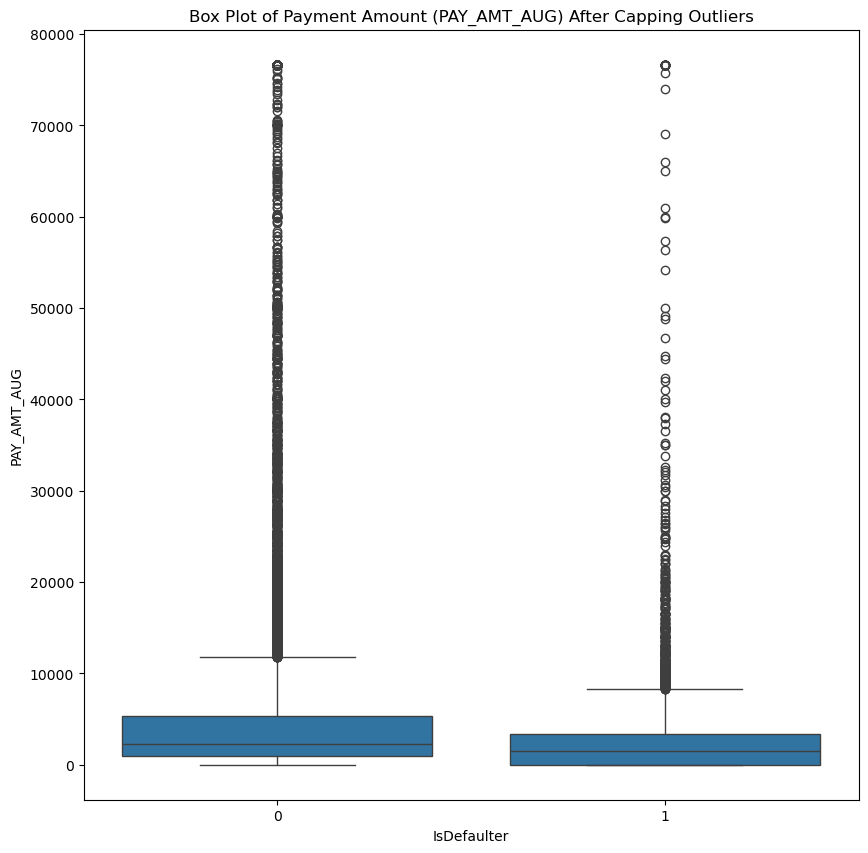

In [162]:
# Cap the outliers in PAY_AMT_AUG at the 99th percentile
cap_value_pay_amt_aug = df['PAY_AMT_AUG'].quantile(0.99)
df['PAY_AMT_AUG'] = np.where(df['PAY_AMT_AUG'] > cap_value_pay_amt_aug, cap_value_pay_amt_aug, df['PAY_AMT_AUG'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_AUG", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_AUG) After Capping Outliers")
plt.show()

In [164]:
# Handling Outliers for PAY_AMT_AUG

# We identified and visualized the outliers in the PAY_AMT_AUG variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped PAY_AMT_AUG values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.
     

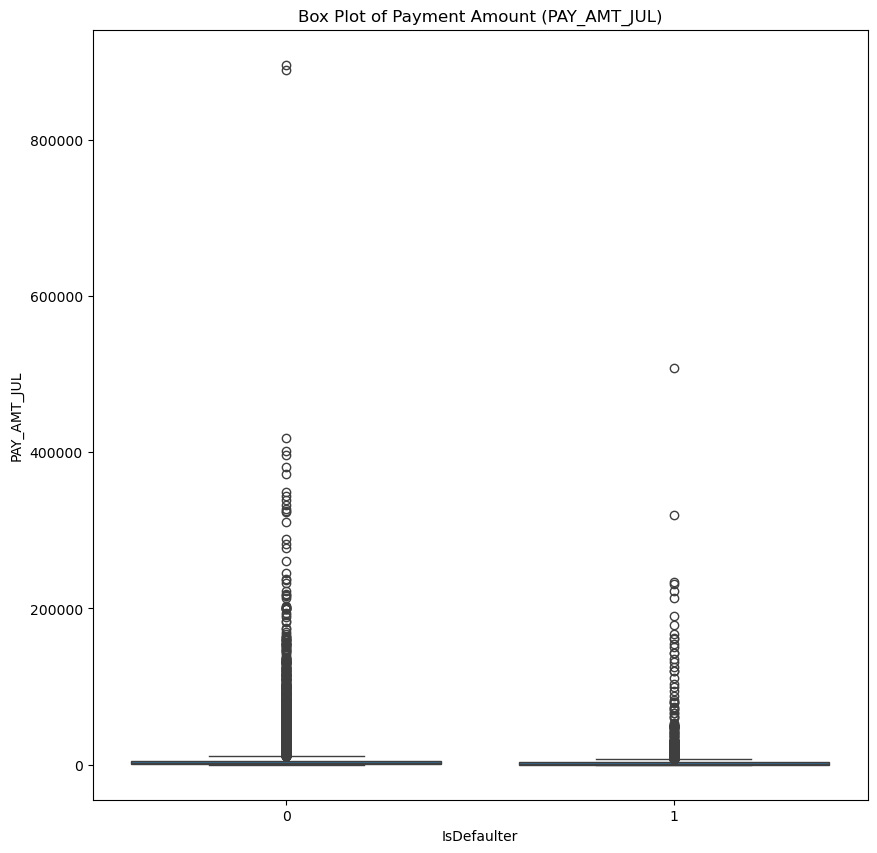

In [166]:
# Create a box plot to visualize the distribution of payment amount for July for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the payment amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_JUL", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_JUL)")
plt.show()

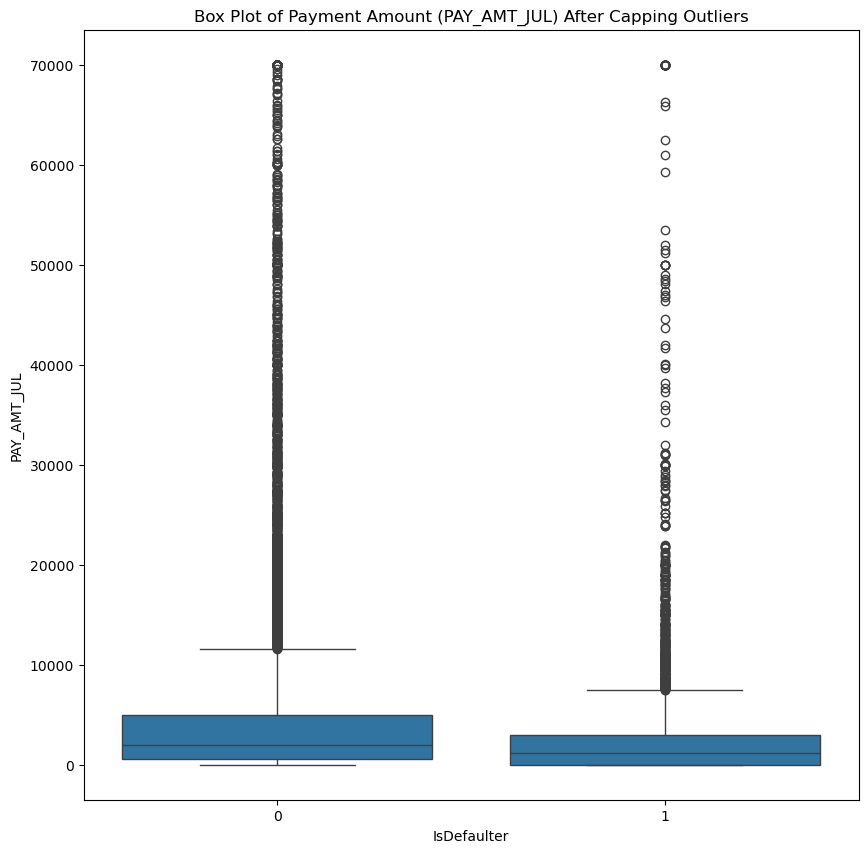

In [168]:
# Cap the outliers in PAY_AMT_JUL at the 99th percentile
cap_value_pay_amt_jul = df['PAY_AMT_JUL'].quantile(0.99)
df['PAY_AMT_JUL'] = np.where(df['PAY_AMT_JUL'] > cap_value_pay_amt_jul, cap_value_pay_amt_jul, df['PAY_AMT_JUL'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_JUL", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_JUL) After Capping Outliers")
plt.show()

In [ ]:
# Handling Outliers for PAY_AMT_JUL

# We identified and visualized the outliers in the PAY_AMT_JUL variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped PAY_AMT_JUL values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.
     

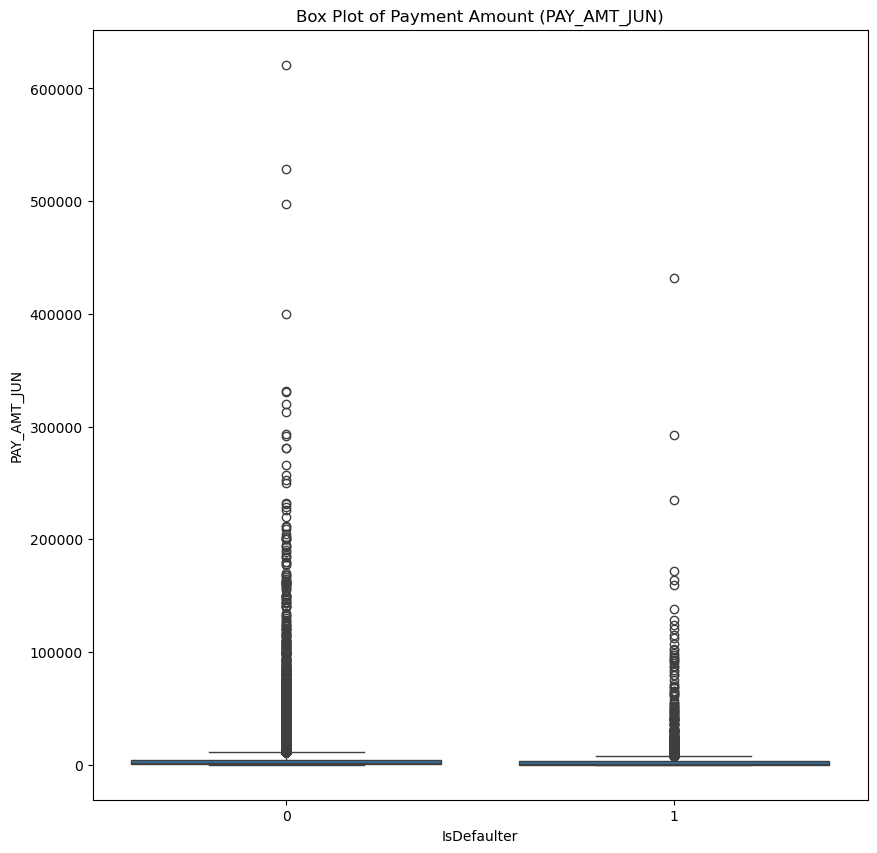

In [170]:
# Create a box plot to visualize the distribution of payment amount for June for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the payment amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_JUN", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_JUN)")
plt.show()

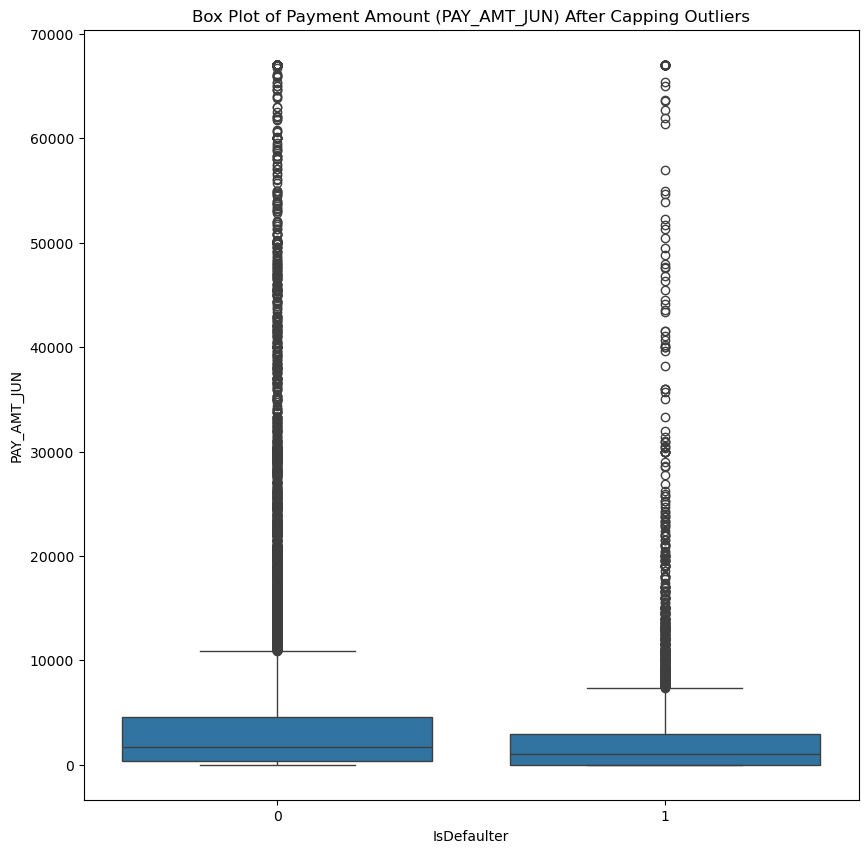

In [172]:

# Cap the outliers in PAY_AMT_JUN at the 99th percentile
cap_value_pay_amt_jun = df['PAY_AMT_JUN'].quantile(0.99)
df['PAY_AMT_JUN'] = np.where(df['PAY_AMT_JUN'] > cap_value_pay_amt_jun, cap_value_pay_amt_jun, df['PAY_AMT_JUN'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_JUN", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_JUN) After Capping Outliers")
plt.show()

In [ ]:
# Handling Outliers for PAY_AMT_JUN

# We identified and visualized the outliers in the PAY_AMT_JUN variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped PAY_AMT_JUN values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance

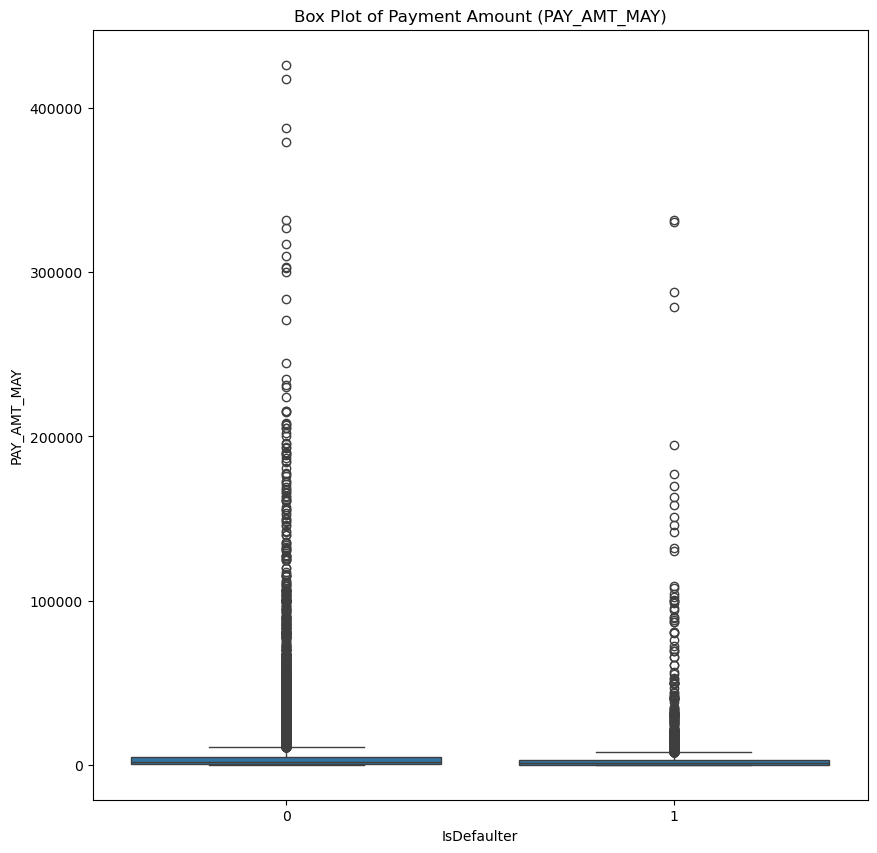

In [174]:
# Create a box plot to visualize the distribution of payment amount for May for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the payment amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_MAY", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_MAY)")
plt.show()

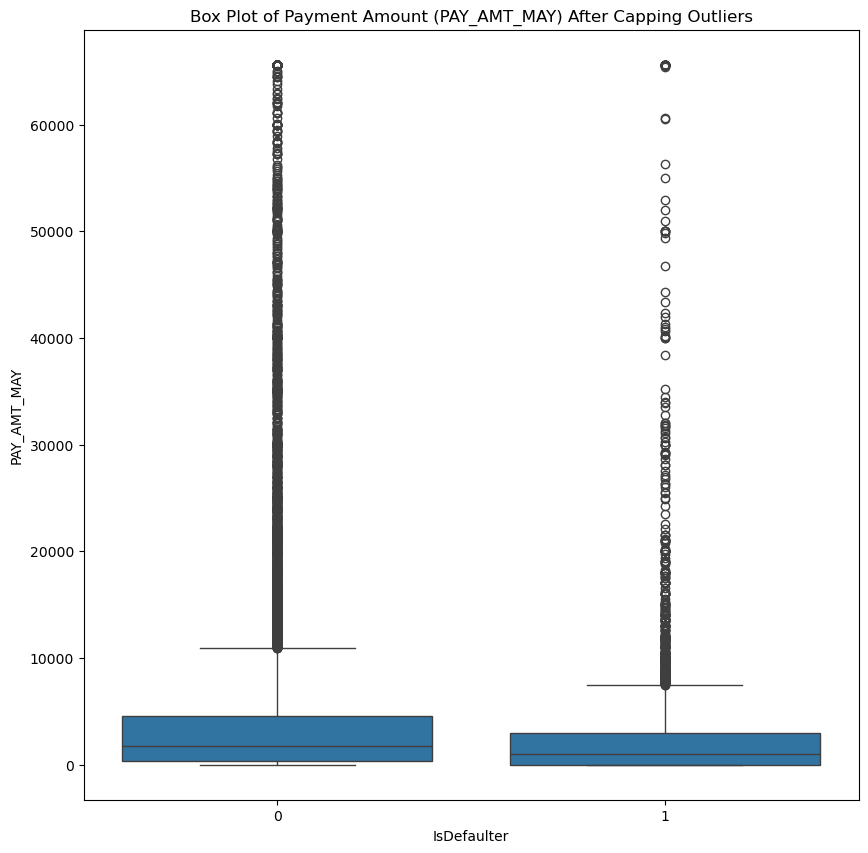

In [176]:
# Cap the outliers in PAY_AMT_MAY at the 99th percentile
cap_value_pay_amt_may = df['PAY_AMT_MAY'].quantile(0.99)
df['PAY_AMT_MAY'] = np.where(df['PAY_AMT_MAY'] > cap_value_pay_amt_may, cap_value_pay_amt_may, df['PAY_AMT_MAY'])

# Verifying the changes with a new box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_MAY", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_MAY) After Capping Outliers")
plt.show()

In [178]:
# Handling Outliers for PAY_AMT_MAY

# We identified and visualized the outliers in the PAY_AMT_MAY variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped PAY_AMT_MAY values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.
     

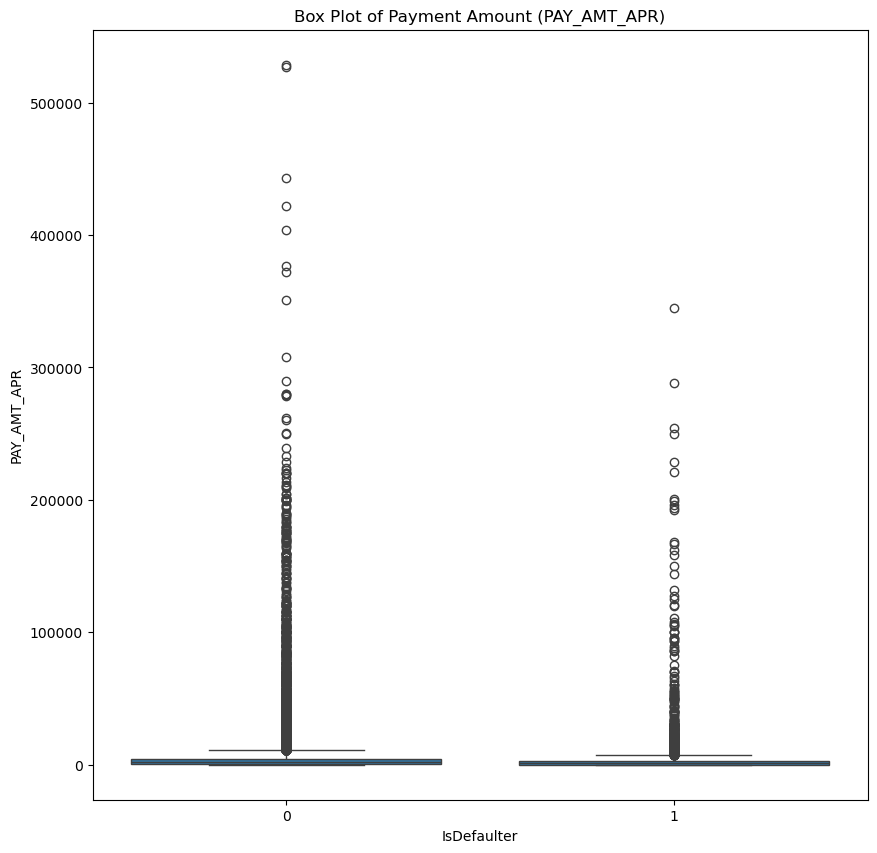

In [180]:
# Create a box plot to visualize the distribution of payment amount for April for each category of the dependent variable 'IsDefaulter'.
# The boxplot helps identify the central tendency, variability, and potential outliers in the payment amounts for defaulters (1) and non-defaulters (0).

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="PAY_AMT_APR", data=df)
plt.title("Box Plot of Payment Amount (PAY_AMT_APR)")
plt.show()

In [182]:
# Handling Outliers for PAY_AMT_APR

# We identified and visualized the outliers in the PAY_AMT_APR variable using a box plot.
# To manage the extreme values, we capped the outliers at the 99th percentile.
# This approach helps reduce the influence of extreme values while preserving the overall data pattern.

# Observation: The capped values showed a more consistent distribution with fewer extreme values.
# Decision: Proceed with the capped PAY_AMT_APR values to enhance data quality and model performance.
# Acceptable Range: The remaining outliers are within an acceptable range based on statistical significance,
# impact on analysis, and domain knowledge, ensuring data integrity and real-world relevance.

# Bill Amount

In [185]:
# Creating a new DataFrame containing only the billing amount columns for each month.
# This step isolates the billing amounts to facilitate further analysis on how they relate to the default status.

bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

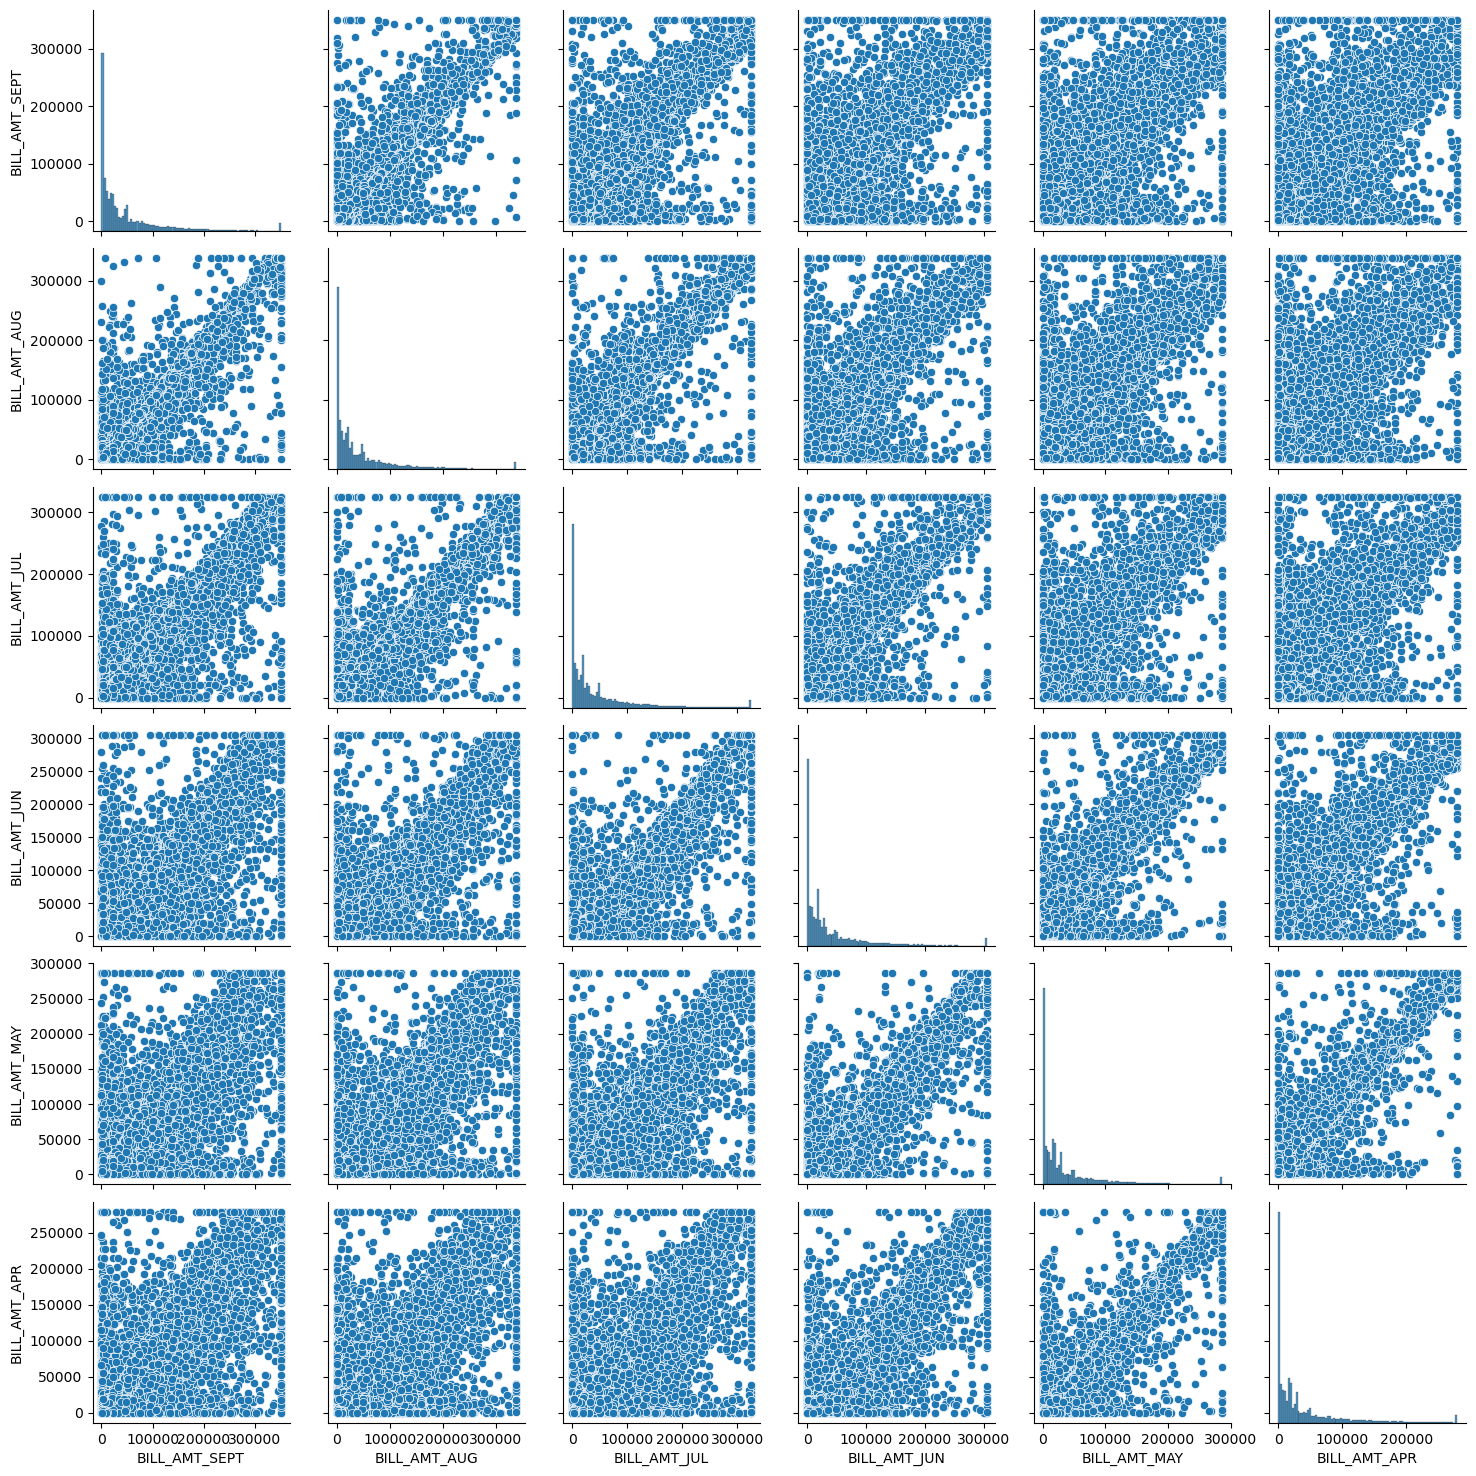

In [187]:
# Creating a pairplot to visualize the relationships between different billing amounts.
# This allows us to see potential correlations between the bill amounts for the different months,
# which can provide insights into spending habits and patterns of defaulters versus non-defaulters.

sns.pairplot(data = bill_amnt_df)

Key Observations:

The pairplot shows relationships between different billing amounts (BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR).

Each scatter plot represents the relationship between two billing amounts, while the diagonal plots show the distribution of each billing amount.

Correlation:

There appears to be a positive correlation between billing amounts from consecutive months.

The strongest correlations are observed between BILL_AMT_SEPT and BILL_AMT_AUG, as well as between BILL_AMT_AUG and BILL_AMT_JUL.

This indicates that higher billing amounts in one month tend to correspond to higher billing amounts in the following month.

Consistency:

The consistency of the positive correlations suggests stable spending habits over the observed months.

The billing amounts for different months follow similar patterns, reinforcing the idea that individuals maintain relatively consistent spending behavior.

Distribution:

The diagonal plots reveal the distribution of each billing amount.

Most billing amounts are concentrated towards the lower end, with fewer instances of very high billing amounts.

The distributions appear slightly right-skewed, indicating that a small number of individuals have significantly higher billing amounts compared to the majority. range, with fewer clients having very high billing amounts.

# History payment status

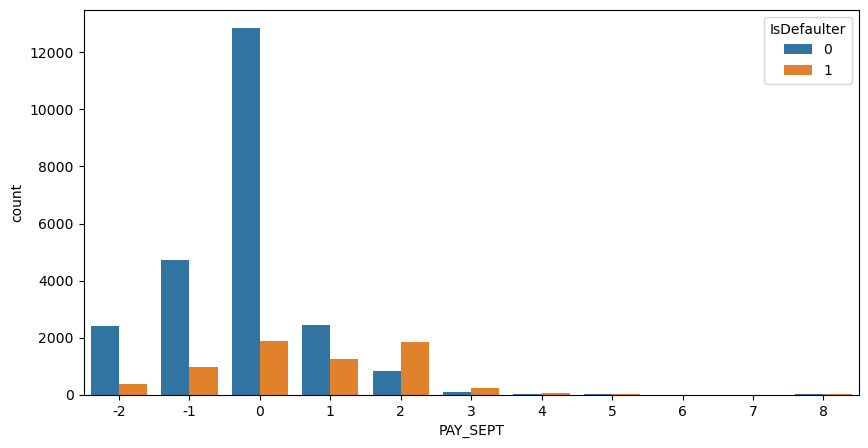

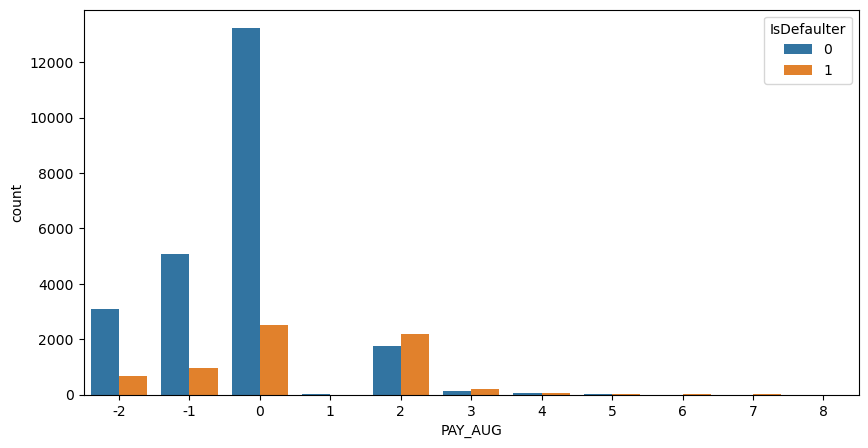

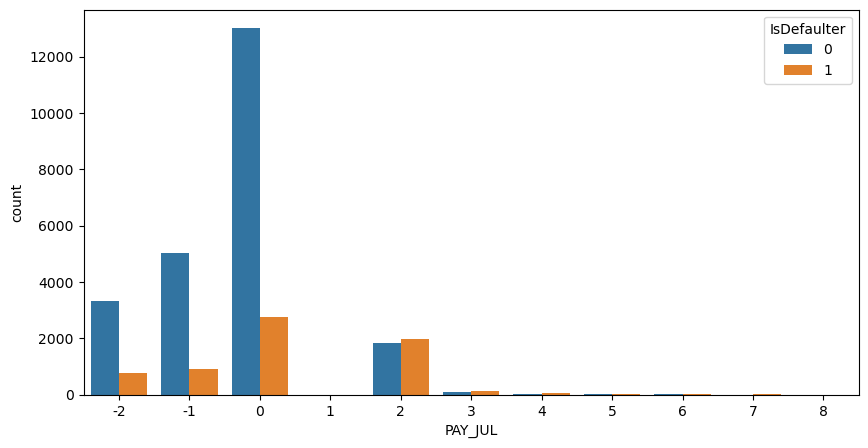

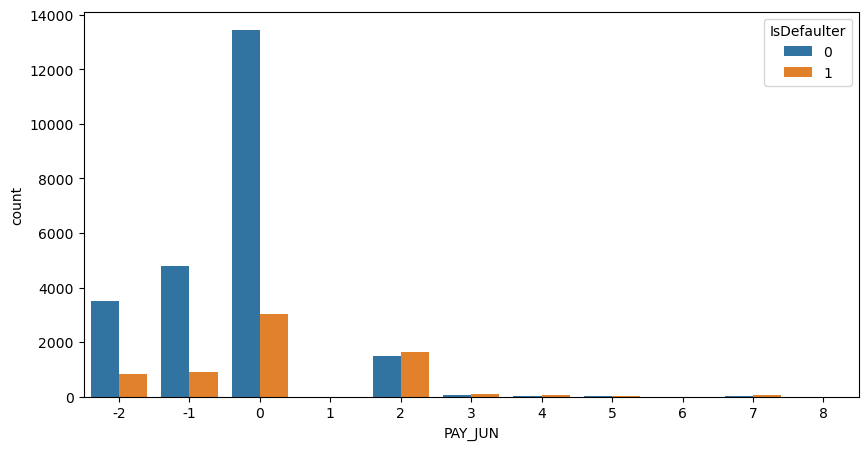

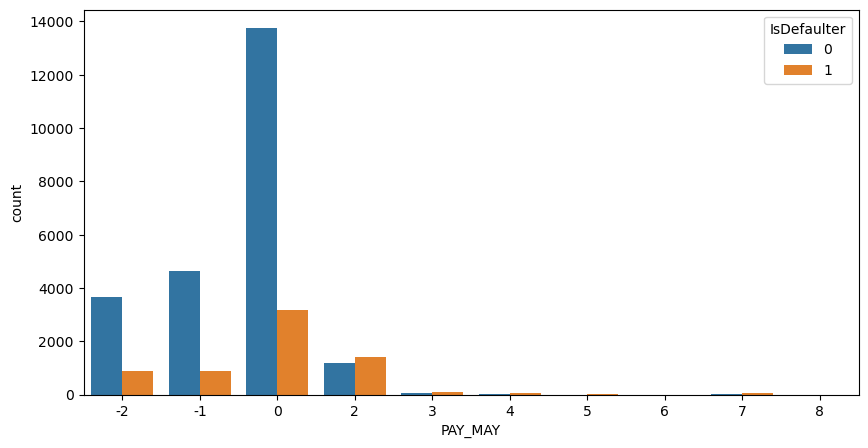

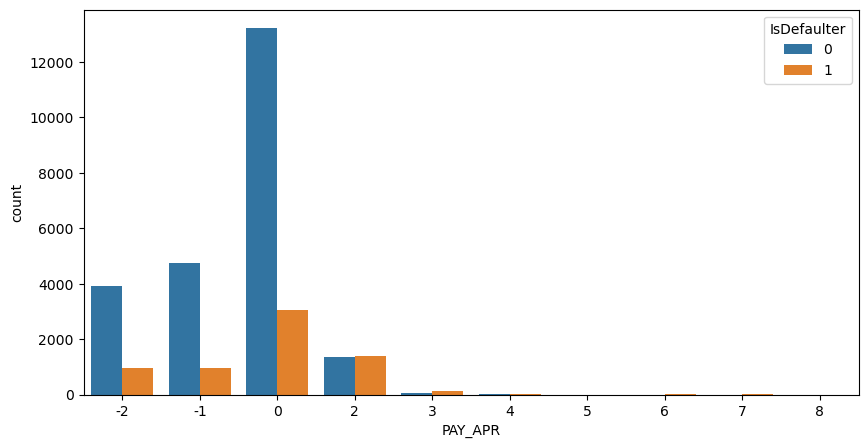

In [191]:
# Visualizing the payment status for each month in relation to whether the customer defaulted or not.
# This loop creates a count plot for each month's payment status,
# providing insights into how payment behavior correlates with defaulting.

pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

Based on the visualizations of payment status from April to September, we observe consistent trends across all months. The majority of customers have a payment status of 0, indicating timely payments. Defaulters increase with worsening payment statuses (positive values), highlighting a correlation between late payments and defaulting. This pattern is observed across all months, showing that customers who struggle with payments tend to do so consistently over time. Non-defaulters predominantly have early or timely payment statuses, while defaulters are more associated with higher positive values, indicating late payments. This underscores the importance of maintaining timely payments to avoid defaulting.

# Paid Amount

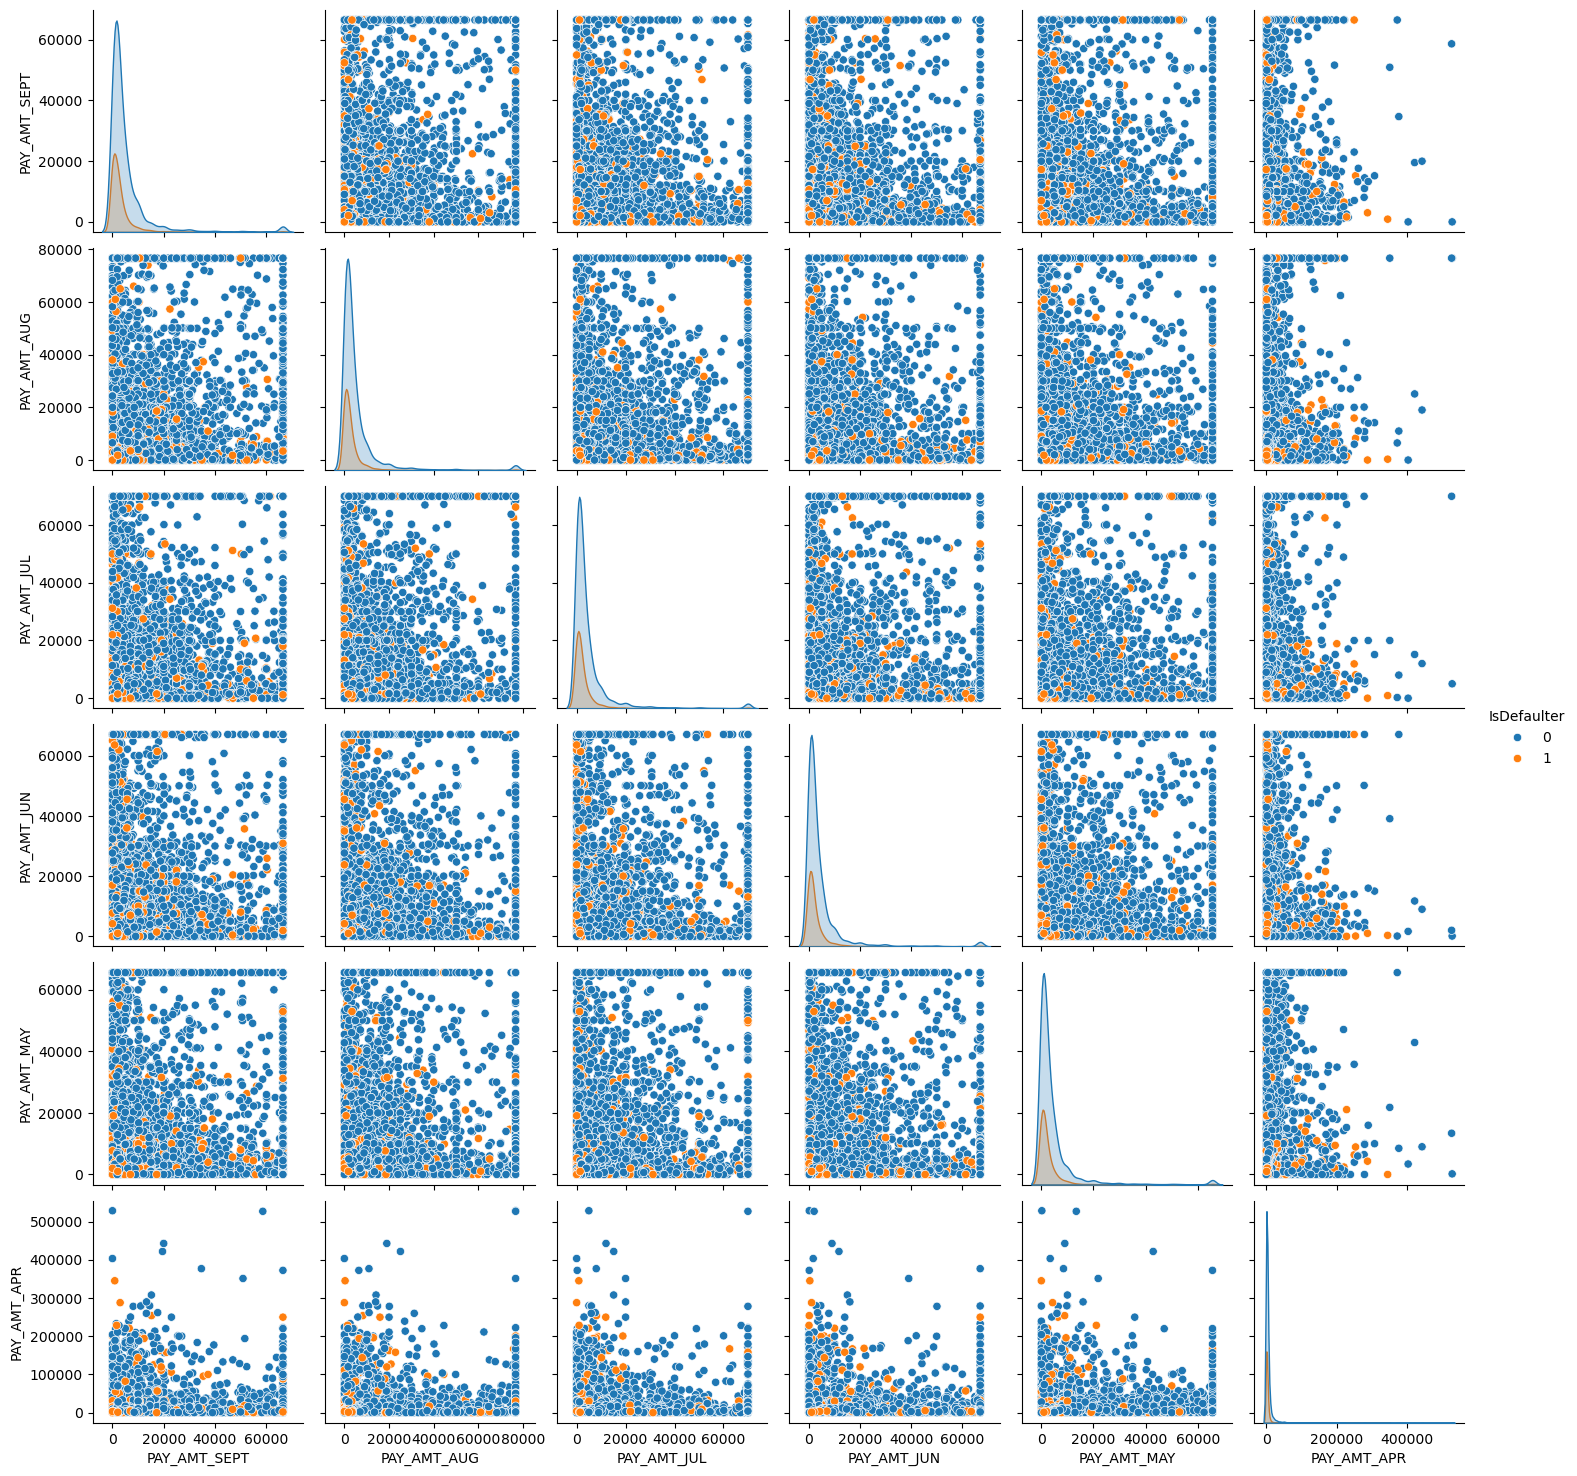

In [195]:
# Creating a DataFrame for paid amounts over six months along with the defaulter status.
# This will help visualize how payment amounts relate to default status.

pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

# Generating a pairplot to examine relationships between payment amounts and default status.

sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

# The code creates a pairplot to visualize relationships between various payment amounts across different months.
# It differentiates between defaulters and non-defaulters using the 'hue' parameter.
# This allows for an analysis of how payment behaviors are associated with default risk,
# helping identify trends that can inform predictive modeling for credit risk.

Key Observations: Each scatter plot shows the relationship between the payment amounts of two different months.

PAY_AMT_SEPT vs. PAY_AMT_AUG:

Pattern: A positive correlation is visible, indicating that higher payments in August often correspond to higher payments in September.

Clusters: Both non-defaulters (blue) and defaulters (orange) form distinct clusters, showing consistent payment behavior.

PAY_AMT_JUL vs. PAY_AMT_JUN:

Pattern: Another positive correlation, indicating consistent payment behavior from July to June.

Clusters: Similar clustering behavior, with non-defaulters generally making higher payments.

PAY_AMT_MAY vs. PAY_AMT_APR:

Pattern: Positive correlation, suggesting consistent payments from May to April.

Clusters: Clear separation between non-defaulters and defaulters.

Distribution Plots (Diagonal Elements): Each plot along the diagonal shows the distribution of a single payment amount variable.

PAY_AMT_SEPT:

Shape: Shows a right skew, indicating that while most clients make lower payments, there are a few making significantly higher payments.

PAY_AMT_AUG, PAY_AMT_JUL, PAY_AMT_JUN, PAY_AMT_MAY, PAY_AMT_APR:

Distribution: Similar shapes across these months, with most payments on the lower end and fewer higher payments.

Correlation: Strong Positive Correlations: Between consecutive months, indicating clients with high payment amounts in one month tend to continue this behavior in subsequent months.

Non-Defaulters vs. Defaulters: Notice the consistent clusters formed by non-defaulters and defaulters in the scatter plots.

Consistency: Payment Behavior: Clients tend to have consistent payment amounts month over month, as indicated by the scatter plots and strong correlations.

Distribution: Similar Shapes: The histograms on the diagonal show that payment amounts have similar distributions across different months. Most payment amounts fall within a certain range, with fewer clients making very high payments.

In [200]:
# Displaying the shape of the DataFrame to obtain the number of rows and columns.

df.shape

(30000, 26)

# To address the imbalance in our dataset, we will implement SMOTE (Synthetic Minority Oversampling Technique). This technique generates synthetic samples for the minority class, helping to balance the class distribution and improve the performance of machine learning models.

In [203]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE for oversampling
smote = SMOTE()

# Applying SMOTE to balance classes, using all columns except target as predictors
# x_smote, y_smote represent the resampled predictors and target respectively
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))
     

Original dataset shape 30000
Resampled dataset shape 46728


In [205]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: IsDefaulter, Length: 46728, dtype: int32

In [207]:
x_smote

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE        AGE  PAY_SEPT  \
0          1      20000    2          2         1  24.000000         2   
1          2     120000    2          2         2  26.000000        -1   
2          3      90000    2          2         2  34.000000         0   
3          4      50000    2          2         1  37.000000         0   
4          5      50000    1          2         1  57.000000        -1   
...      ...        ...  ...        ...       ...        ...       ...   
46723  25746      30000    1          1         1  35.507893         1   
46724  10288      50000    1          2         1  44.526699         1   
46725  15181     180000    2          3         1  41.000000         2   
46726  15114     140000    1          1         1  38.351342         0   
46727   9925     300000    1          2         1  38.446425         0   

       PAY_AUG  PAY_JUL  PAY_JUN  ...   BILL_AMT_JUN   BILL_AMT_MAY  \
0            2       -1       -1  ...       0.000000       0.000000   
1            2        0        0  ...    3272.000000    3455.000000   
2            0        0        0  ...   14331.000000   14948.000000   
3            0        0        0  ...   28314.000000   28959.000000   
4            0       -1        0  ...   20940.000000   19146.000000   
...        ...      ...      ...  ...            ...            ...   
46723        3        2        2  ...   15005.399685   15066.483606   
46724        2        2        0  ...   19769.346551   19968.518353   
46725        2        2        0  ...  100062.136962  102126.067434   
46726       -1       -1       -1  ...      23.495848      23.495848   
46727        0        0        0  ...    9369.699858   10084.178703   

        BILL_AMT_APR  PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JUL  PAY_AMT_JUN  \
0           0.000000      0.000000    689.000000      0.000000     0.000000   
1        3261.000000      0.000000   1000.000000   1000.000000  1000.000000   
2       15549.000000   1518.000000   1500.000000   1000.000000  1000.000000   
3       29547.000000   2000.000000   2019.000000   1200.000000  1100.000000   
4       19131.000000   2000.000000  36681.000000  10000.000000  9000.000000   
...              ...           ...           ...           ...          ...   
46723   15528.263891    598.947650      0.000000   1498.772259   601.052350   
46724   20272.309845   2111.878015    740.101654    492.771537   824.010165   
46725  104187.028348   4446.499158   1061.218637   2536.967284  3693.670701   
46726      23.495848     23.495848     23.495848     23.495848    23.495848   
46727    3705.905635   1111.606272   4557.579924   3667.409409  5558.031362   

       PAY_AMT_MAY  PAY_AMT_APR  default payment next month  
0         0.000000            0                           1  
1         0.000000         2000                           1  
2      1000.000000         5000                           0  
3      1069.000000         1000                           0  
4       689.000000          679                           0  
...            ...          ...                         ...  
46723   848.509171            0                           1  
46724   944.406099          664                           1  
46725  3745.778450         3953                           1  
46726    23.495848           23                           1  
46727  3705.905635         3002                           1  

[46728 rows x 25 columns]

In [209]:
# Creating a list of all column names in the DataFrame `df`
# This will allow easy access to column names for future use or reference
columns = list(df.columns)

In [211]:
# Remove the last column ('IsDefaulter') from the columns list, retaining only predictor variables.
# This prepares the columns list for feature selection or model training steps, excluding the target variable.
columns.pop()

'IsDefaulter'

In [213]:
# Creating a balanced DataFrame with SMOTE-generated samples, renaming columns to match original feature names.
# This new DataFrame, 'balance_df,' contains the predictors with balanced classes, ready for further analysis or model training.
balance_df = pd.DataFrame(x_smote, columns=columns)
     

In [215]:
# Adding the target variable 'IsDefaulter' from the SMOTE-generated samples to 'balance_df'.
# This combines the predictors and target, forming a balanced dataset with labels included.
# Ensure your resampled data is well-organized, structured correctly, and ready for analysis or modeling
balance_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

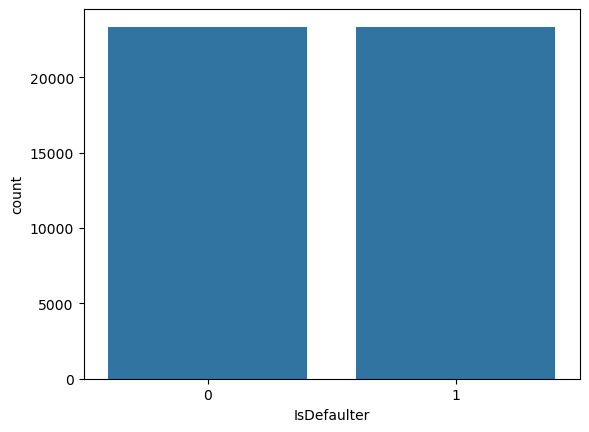

In [217]:
# Visualize the distribution of 'IsDefaulter' in the balanced dataset.
sns.countplot(x='IsDefaulter', data=balance_df)

In [219]:
# Filter the balanced dataset to view only the instances of defaulters (IsDefaulter = 1).
balance_df[balance_df['IsDefaulter']==1]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE        AGE  PAY_SEPT  \
0          1      20000    2          2         1  24.000000         2   
1          2     120000    2          2         2  26.000000        -1   
13        14      70000    1          2         2  30.000000         1   
16        17      20000    1          1         2  24.000000         0   
21        22     120000    2          2         1  39.000000        -1   
...      ...        ...  ...        ...       ...        ...       ...   
46723  25746      30000    1          1         1  35.507893         1   
46724  10288      50000    1          2         1  44.526699         1   
46725  15181     180000    2          3         1  41.000000         2   
46726  15114     140000    1          1         1  38.351342         0   
46727   9925     300000    1          2         1  38.446425         0   

       PAY_AUG  PAY_JUL  PAY_JUN  ...   BILL_AMT_MAY   BILL_AMT_APR  \
0            2       -1       -1  ...       0.000000       0.000000   
1            2        0        0  ...    3455.000000    3261.000000   
13           2        2        0  ...   36137.000000   36894.000000   
16           0        2        2  ...   17905.000000   19104.000000   
21          -1       -1       -1  ...     632.000000     316.000000   
...        ...      ...      ...  ...            ...            ...   
46723        3        2        2  ...   15066.483606   15528.263891   
46724        2        2        0  ...   19968.518353   20272.309845   
46725        2        2        0  ...  102126.067434  104187.028348   
46726       -1       -1       -1  ...      23.495848      23.495848   
46727        0        0        0  ...   10084.178703    3705.905635   

       PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0          0.000000   689.000000     0.000000     0.000000     0.000000   
1          0.000000  1000.000000  1000.000000  1000.000000     0.000000   
13      3200.000000     0.000000  3000.000000  3000.000000  1500.000000   
16      3200.000000     0.000000  1500.000000     0.000000  1650.000000   
21       316.000000   316.000000     0.000000   632.000000   316.000000   
...             ...          ...          ...          ...          ...   
46723    598.947650     0.000000  1498.772259   601.052350   848.509171   
46724   2111.878015   740.101654   492.771537   824.010165   944.406099   
46725   4446.499158  1061.218637  2536.967284  3693.670701  3745.778450   
46726     23.495848    23.495848    23.495848    23.495848    23.495848   
46727   1111.606272  4557.579924  3667.409409  5558.031362  3705.905635   

       PAY_AMT_APR  default payment next month  IsDefaulter  
0                0                           1            1  
1             2000                           1            1  
13               0                           1            1  
16               0                           1            1  
21               0                           1            1  
...            ...                         ...          ...  
46723            0                           1            1  
46724          664                           1            1  
46725         3953                           1            1  
46726           23                           1            1  
46727         3002                           1            1  

[23364 rows x 26 columns]

# Feature Engineering

In [221]:
# Create a copy of the balanced dataset for feature engineering.
df_fr = balance_df.copy()

In [224]:
df_fr

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE        AGE  PAY_SEPT  \
0          1      20000    2          2         1  24.000000         2   
1          2     120000    2          2         2  26.000000        -1   
2          3      90000    2          2         2  34.000000         0   
3          4      50000    2          2         1  37.000000         0   
4          5      50000    1          2         1  57.000000        -1   
...      ...        ...  ...        ...       ...        ...       ...   
46723  25746      30000    1          1         1  35.507893         1   
46724  10288      50000    1          2         1  44.526699         1   
46725  15181     180000    2          3         1  41.000000         2   
46726  15114     140000    1          1         1  38.351342         0   
46727   9925     300000    1          2         1  38.446425         0   

       PAY_AUG  PAY_JUL  PAY_JUN  ...   BILL_AMT_MAY   BILL_AMT_APR  \
0            2       -1       -1  ...       0.000000       0.000000   
1            2        0        0  ...    3455.000000    3261.000000   
2            0        0        0  ...   14948.000000   15549.000000   
3            0        0        0  ...   28959.000000   29547.000000   
4            0       -1        0  ...   19146.000000   19131.000000   
...        ...      ...      ...  ...            ...            ...   
46723        3        2        2  ...   15066.483606   15528.263891   
46724        2        2        0  ...   19968.518353   20272.309845   
46725        2        2        0  ...  102126.067434  104187.028348   
46726       -1       -1       -1  ...      23.495848      23.495848   
46727        0        0        0  ...   10084.178703    3705.905635   

       PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0          0.000000    689.000000      0.000000     0.000000     0.000000   
1          0.000000   1000.000000   1000.000000  1000.000000     0.000000   
2       1518.000000   1500.000000   1000.000000  1000.000000  1000.000000   
3       2000.000000   2019.000000   1200.000000  1100.000000  1069.000000   
4       2000.000000  36681.000000  10000.000000  9000.000000   689.000000   
...             ...           ...           ...          ...          ...   
46723    598.947650      0.000000   1498.772259   601.052350   848.509171   
46724   2111.878015    740.101654    492.771537   824.010165   944.406099   
46725   4446.499158   1061.218637   2536.967284  3693.670701  3745.778450   
46726     23.495848     23.495848     23.495848    23.495848    23.495848   
46727   1111.606272   4557.579924   3667.409409  5558.031362  3705.905635   

       PAY_AMT_APR  default payment next month  IsDefaulter  
0                0                           1            1  
1             2000                           1            1  
2             5000                           0            0  
3             1000                           0            0  
4              679                           0            0  
...            ...                         ...          ...  
46723            0                           1            1  
46724          664                           1            1  
46725         3953                           1            1  
46726           23                           1            1  
46727         3002                           1            1  

[46728 rows x 26 columns]

In [226]:
# Create a new feature 'Payment_Value' to summarize total payments made over six months.
# This can enhance model insights by indicating overall payment behavior.

df_fr['Payement_Value'] = df_fr['PAY_AMT_SEPT'] + df_fr['PAY_AMT_AUG'] + df_fr['PAY_AMT_JUL'] + df_fr['PAY_AMT_JUN'] + df_fr['PAY_AMT_MAY'] + df_fr['PAY_AMT_APR']
     

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

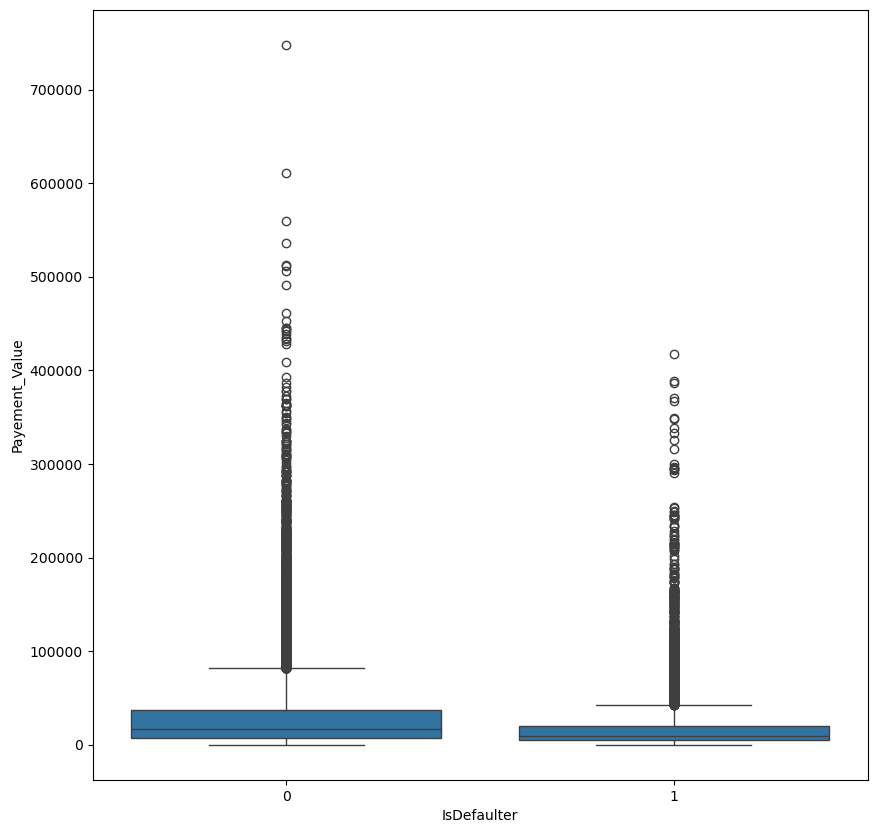

In [228]:
# Visualizing the distribution of 'Payment_Value' based on defaulter status using a boxplot.
# This helps to identify how payment behaviors differ between defaulters and non-defaulters.

plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

Median Payment Value: The median Payment_Value for non-defaulters (0) is higher than that for defaulters (1). This indicates that non-defaulters tend to make larger total payments over the six months compared to defaulters.

Interquartile Range (IQR): The IQR for non-defaulters is higher, suggesting a wider spread of payment values among non-defaulters. This implies that while some non-defaulters make very high payments, others make more moderate payments.

Distribution of Payments:

Non-Defaulters: They generally have higher Payment_Value distributions, with many outliers extending up to around 400,000. This suggests that a significant number of non-defaulters make exceptionally high payments.

Defaulters: The distribution for defaulters is lower, with fewer instances of very high payments. Most defaulters' Payment_Value falls within a lower range, indicating less total payment over six months.

Outliers: Both categories exhibit outliers, but they are more densely packed for non-defaulters. This means that there are several non-defaulters who make unusually high payments, far exceeding the typical payment amounts.

These observations highlight the differences in payment behaviors between defaulters and non-defaulters, providing valuable insights for enhancing model accuracy and understanding credit risk.

In [231]:
# Calculating the total dues by subtracting total payments from total bill amounts over the specified months.
# This helps assess the overall financial obligation of credit card holders and identify patterns related to defaulting.

df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])
     

In [233]:
# Calculating the average dues for defaulters and non-defaulters.
# This analysis will help understand how dues differ between the two groups, providing insights into financial behavior.

df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    190152.697415
1    192789.460709
Name: Dues, dtype: float64

In [235]:
# Extracting unique values from the 'EDUCATION' column to analyze the educational background of credit card holders.
# This helps assess how different education levels might relate to credit default risk.

df_fr['EDUCATION'].unique()

array([2, 1, 3, 4])

In [237]:
# Checking unique values in the 'MARRIAGE' column to understand the marital status distribution in the dataset.

df_fr['MARRIAGE'].unique()

array([1, 2, 3])

In [239]:
# Replacing numeric codes in 'SEX', 'EDUCATION', and 'MARRIAGE' columns with meaningful categorical labels.
# This enhances readability and understanding of the dataset.

df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [241]:
# Displaying the first few rows of the modified DataFrame to verify changes and check the current structure.

df_fr.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_SEPT  PAY_AUG  \
0   1      20000  FEMALE  university  married  24.0         2        2   
1   2     120000  FEMALE  university   single  26.0        -1        2   
2   3      90000  FEMALE  university   single  34.0         0        0   
3   4      50000  FEMALE  university  married  37.0         0        0   
4   5      50000    MALE  university  married  57.0        -1        0   

   PAY_JUL  PAY_JUN  ...  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0       -1       -1  ...           0.0        689.0          0.0          0.0   
1        0        0  ...           0.0       1000.0       1000.0       1000.0   
2        0        0  ...        1518.0       1500.0       1000.0       1000.0   
3        0        0  ...        2000.0       2019.0       1200.0       1100.0   
4       -1        0  ...        2000.0      36681.0      10000.0       9000.0   

   PAY_AMT_MAY  PAY_AMT_APR  default payment next month  IsDefaulter  \
0          0.0            0                           1            1   
1          0.0         2000                           1            1   
2       1000.0         5000                           0            0   
3       1069.0         1000                           0            0   
4        689.0          679                           0            0   

   Payement_Value      Dues  
0           689.0    3913.0  
1          5000.0   10352.0  
2         11018.0   76608.0  
3          8388.0  174713.0  
4         59049.0   44620.0  

[5 rows x 28 columns]

# One Hot Encoding

In [244]:
# Applying One Hot Encoding to the 'EDUCATION' and 'MARRIAGE' columns.
# This converts categorical variables into a format that can be provided to ML algorithms,
# improving the model's ability to understand the data without misinterpreting categories as ordinal.

df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [246]:
df_fr.head()

ID  LIMIT_BAL     SEX   AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  \
0   1      20000  FEMALE  24.0         2        2       -1       -1       -2   
1   2     120000  FEMALE  26.0        -1        2        0        0        0   
2   3      90000  FEMALE  34.0         0        0        0        0        0   
3   4      50000  FEMALE  37.0         0        0        0        0        0   
4   5      50000    MALE  57.0        -1        0       -1        0        0   

   PAY_APR  ...  IsDefaulter  Payement_Value      Dues  \
0       -2  ...            1           689.0    3913.0   
1        2  ...            1          5000.0   10352.0   
2        0  ...            0         11018.0   76608.0   
3        0  ...            0          8388.0  174713.0   
4        0  ...            0         59049.0   44620.0   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_others  \
0                      False                  False             False   
1                      False                  False             False   
2                      False                  False             False   
3                      False                  False             False   
4                      False                  False             False   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  
0                  True              True            False            False  
1                  True             False            False             True  
2                  True             False            False             True  
3                  True              True            False            False  
4                  True              True            False            False  

[5 rows x 33 columns]

In [248]:
# Dropping 'EDUCATION_others' and 'MARRIAGE_others' to reduce redundancy.
# This avoids multicollinearity issues in the dataset since their information is already represented by other columns.

df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [250]:
# Applying One Hot Encoding to payment status columns, dropping the first category to avoid dummy variable trap.
# This transforms categorical payment status variables into a format suitable for machine learning algorithms.

df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

# By specifying the columns and dropping the first dummy variable, we efficiently transformed the categorical payment status columns into binary indicators,
# enhancing the model's ability to process and learn from the data.

In [252]:
df_fr.head()

ID  LIMIT_BAL     SEX   AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  \
0   1      20000  FEMALE  24.0         3913.0        3102.0         689.0   
1   2     120000  FEMALE  26.0         2682.0        1725.0        2682.0   
2   3      90000  FEMALE  34.0        29239.0       14027.0       13559.0   
3   4      50000  FEMALE  37.0        46990.0       48233.0       49291.0   
4   5      50000    MALE  57.0         8617.0        5670.0       35835.0   

   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  ...  PAY_APR_-1  PAY_APR_0  \
0           0.0           0.0           0.0  ...       False      False   
1        3272.0        3455.0        3261.0  ...       False      False   
2       14331.0       14948.0       15549.0  ...       False       True   
3       28314.0       28959.0       29547.0  ...       False       True   
4       20940.0       19146.0       19131.0  ...       False       True   

   PAY_APR_1  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  PAY_APR_6  \
0      False      False      False      False      False      False   
1      False       True      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   PAY_APR_7  PAY_APR_8  
0      False      False  
1      False      False  
2      False      False  
3      False      False  
4      False      False  

[5 rows x 85 columns]

In [254]:
# LABEL ENCODING 'SEX' to numeric values for compatibility with machine learning models.

encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [256]:
df_fr.head()

ID  LIMIT_BAL  SEX   AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  \
0   1      20000    0  24.0         3913.0        3102.0         689.0   
1   2     120000    0  26.0         2682.0        1725.0        2682.0   
2   3      90000    0  34.0        29239.0       14027.0       13559.0   
3   4      50000    0  37.0        46990.0       48233.0       49291.0   
4   5      50000    1  57.0         8617.0        5670.0       35835.0   

   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  ...  PAY_APR_-1  PAY_APR_0  \
0           0.0           0.0           0.0  ...       False      False   
1        3272.0        3455.0        3261.0  ...       False      False   
2       14331.0       14948.0       15549.0  ...       False       True   
3       28314.0       28959.0       29547.0  ...       False       True   
4       20940.0       19146.0       19131.0  ...       False       True   

   PAY_APR_1  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  PAY_APR_6  \
0      False      False      False      False      False      False   
1      False       True      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   PAY_APR_7  PAY_APR_8  
0      False      False  
1      False      False  
2      False      False  
3      False      False  
4      False      False  

[5 rows x 85 columns]

In [258]:
# Dropping the 'ID' column as it is not needed for model training or analysis.

df_fr.drop('ID',axis = 1, inplace = True)

In [260]:
# Saving the final DataFrame to a CSV file for further analysis or model training.

df_fr.to_csv('Final_df.csv')

In [262]:
# Loading the final dataset from a CSV file to use it for model training.

df_fr = pd.read_csv('./Final_df.csv')

In [264]:
df_fr.head()

Unnamed: 0  LIMIT_BAL  SEX   AGE  BILL_AMT_SEPT  BILL_AMT_AUG  \
0           0      20000    0  24.0         3913.0        3102.0   
1           1     120000    0  26.0         2682.0        1725.0   
2           2      90000    0  34.0        29239.0       14027.0   
3           3      50000    0  37.0        46990.0       48233.0   
4           4      50000    1  57.0         8617.0        5670.0   

   BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  ...  PAY_APR_-1  \
0         689.0           0.0           0.0           0.0  ...       False   
1        2682.0        3272.0        3455.0        3261.0  ...       False   
2       13559.0       14331.0       14948.0       15549.0  ...       False   
3       49291.0       28314.0       28959.0       29547.0  ...       False   
4       35835.0       20940.0       19146.0       19131.0  ...       False   

   PAY_APR_0  PAY_APR_1  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  \
0      False      False      False      False      False      False   
1      False      False       True      False      False      False   
2       True      False      False      False      False      False   
3       True      False      False      False      False      False   
4       True      False      False      False      False      False   

   PAY_APR_6  PAY_APR_7  PAY_APR_8  
0      False      False      False  
1      False      False      False  
2      False      False      False  
3      False      False      False  
4      False      False      False  

[5 rows x 85 columns]

In [266]:
# Removing the 'Unnamed: 0' column from the DataFrame as it is not needed for analysis.

df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

# Implementing Logistic Regression

Logistic Regression is a straightforward algorithm that models the relationship between a binary dependent variable and one or more independent variables, predicting the likelihood of an event. The regularization parameter C influences the balance between model complexity and simplicity. A higher C reduces regularization, allowing for increased complexity and potential overfitting, while a lower C enhances model simplicity and can lead to underfitting.

In [270]:
# Cloning the DataFrame for logistic regression to preserve the original data.

df_log_reg = df_fr.copy()

In [272]:
df_log_reg.head()

LIMIT_BAL  SEX   AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  \
0      20000    0  24.0         3913.0        3102.0         689.0   
1     120000    0  26.0         2682.0        1725.0        2682.0   
2      90000    0  34.0        29239.0       14027.0       13559.0   
3      50000    0  37.0        46990.0       48233.0       49291.0   
4      50000    1  57.0         8617.0        5670.0       35835.0   

   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  ...  PAY_APR_-1  \
0           0.0           0.0           0.0           0.0  ...       False   
1        3272.0        3455.0        3261.0           0.0  ...       False   
2       14331.0       14948.0       15549.0        1518.0  ...       False   
3       28314.0       28959.0       29547.0        2000.0  ...       False   
4       20940.0       19146.0       19131.0        2000.0  ...       False   

   PAY_APR_0  PAY_APR_1  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  \
0      False      False      False      False      False      False   
1      False      False       True      False      False      False   
2       True      False      False      False      False      False   
3       True      False      False      False      False      False   
4       True      False      False      False      False      False   

   PAY_APR_6  PAY_APR_7  PAY_APR_8  
0      False      False      False  
1      False      False      False  
2      False      False      False  
3      False      False      False  
4      False      False      False  

[5 rows x 84 columns]

In [274]:
df_log_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   46728 non-null  int64  
 1   SEX                         46728 non-null  int64  
 2   AGE                         46728 non-null  float64
 3   BILL_AMT_SEPT               46728 non-null  float64
 4   BILL_AMT_AUG                46728 non-null  float64
 5   BILL_AMT_JUL                46728 non-null  float64
 6   BILL_AMT_JUN                46728 non-null  float64
 7   BILL_AMT_MAY                46728 non-null  float64
 8   BILL_AMT_APR                46728 non-null  float64
 9   PAY_AMT_SEPT                46728 non-null  float64
 10  PAY_AMT_AUG                 46728 non-null  float64
 11  PAY_AMT_JUL                 46728 non-null  float64
 12  PAY_AMT_JUN                 46728 non-null  float64
 13  PAY_AMT_MAY                 467

In [276]:
# Creating feature set 'X' by excluding target and derived variables for logistic regression.
# Target variable 'y' is defined as 'IsDefaulter' to predict default risk.

X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter']

In [278]:
# Storing the column names of feature set 'X' for further analysis and model training.

columns = X.columns

In [280]:
# Scaling the feature set 'X' using StandardScaler to standardize the features to have a mean of 0 and a standard deviation of 1.
# Standardization is crucial for ensuring that each feature contributes equally to the model, especially for algorithms like logistic regression.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [282]:
# Splitting the dataset into training and testing sets, with 33% of the data reserved for testing.
# The stratify parameter ensures that the proportion of classes in the target variable 'y' is maintained in both sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
     

In [284]:
# Defining a grid of hyperparameters for the Logistic Regression model to optimize the penalty type and the regularization strength (C).
# This will help in tuning the model for better performance by exploring different combinations of hyperparameters.

param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [286]:

# Performing Grid Search Cross-Validation to find the best hyperparameters for the Logistic Regression model.
# This process evaluates different combinations of penalty types and regularization strengths, optimizing for accuracy.

grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [288]:
# Performing hyperparameter tuning for logistic regression using GridSearchCV.
# This allows us to find the best combination of penalty type and regularization strength (C).


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)
     

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [290]:
# Extracting the best estimator from GridSearchCV to use for predictions.
# This model has the optimal hyperparameters found during the grid search process.

optimized_clf = grid_lr_clf.best_estimator_

In [292]:
# Retrieving the best hyperparameters found during grid search for the logistic regression model.
# This will provide insights into the optimal values for 'C' and 'penalty' used in the model.

grid_lr_clf.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [294]:
# Getting the best cross-validated score achieved by the logistic regression model during grid search.
# This score indicates the model's performance with the optimal hyperparameters found.

grid_lr_clf.best_score_

1.0

In [296]:
# Predicting the probabilities of each class for the training and test datasets using the optimized logistic regression model.
# The output gives the probability of being in the positive class (IsDefaulter = 1) for each observation.

train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [298]:
# Getting the predicted class labels for the training and test datasets using the optimized logistic regression model.
# The output indicates whether each observation is predicted to be a defaulter (1) or not (0).

train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [300]:
# Calculating the accuracy of the logistic regression model on both training and test datasets.
# This measures the proportion of correct predictions made by the model.

train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [302]:
# Calculate evaluation metrics for the test data.

test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

# Print the metrics.

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


We can see from the above results that we are achieving around 100% train accuracy and 100% test accuracy, which is exceptional. Additionally, the precision, recall, F1-score, and ROC AUC score are all 1.0, indicating flawless performance on this dataset. Given these results, our logistic regression model appears to be highly effective for predicting credit card defaults, achieving optimal results without any apparent room for improvement.

[[15653     0]
 [    0 15654]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

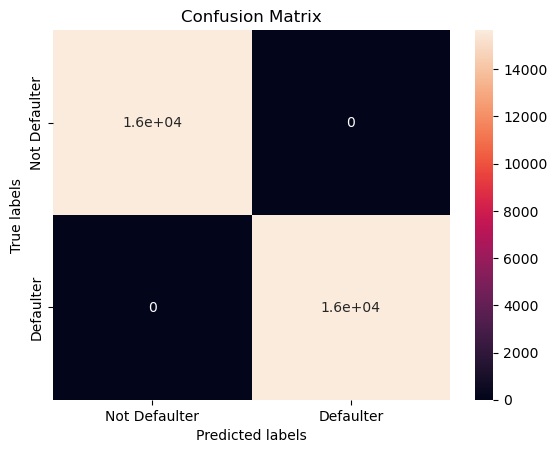

In [305]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']

# Confusion matrix for training set

cm = confusion_matrix(y_train, train_class_preds)
print(cm)  # Print the confusion matrix for training set

# Create a heatmap for the training confusion matrix

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')   # X-axis label
ax.set_ylabel('True labels')      # Y-axis label
ax.set_title('Confusion Matrix')    # Title of the heatmap
ax.xaxis.set_ticklabels(labels)     # Set tick labels for X-axis
ax.yaxis.set_ticklabels(labels)     # Set tick labels for Y-axis

True Negatives (TN):

Value: 15653

Explanation: The model correctly predicted 15653 instances as Not Defaulters. These are the instances where the true label was Not Defaulter, and the model also predicted Not Defaulter.

True Positives (TP):

Value: 15654

Explanation: The model correctly predicted 15654 instances as Defaulters. These are the instances where the true label was Defaulter, and the model also predicted Defaulter.

False Positives (FP):

Value: 0

Explanation: The model did not incorrectly predict any instances as Defaulters. This indicates there are no instances where the true label was Not Defaulter, but the model predicted Defaulter.

False Negatives (FN):

Value: 0

Explanation: The model did not incorrectly predict any instances as Not Defaulters. This indicates there are no instances where the true label was Defaulter, but the model predicted Not Defaulter.

The model has achieved perfect classification on the training dataset, with no false positives or false negatives. This means the model's predictions were completely accurate, correctly identifying all Defaulters and Not Defaulters.

In [308]:
# Create a DataFrame to store feature importance

feature_importance = pd.DataFrame({
    'Features':columns,               # List of feature names
    'Importance':np.abs(optimized_clf.coef_).ravel() })             # Absolute values of coefficients, flattened
     

In [310]:
# Sort the feature importance DataFrame and select top 10 features

feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

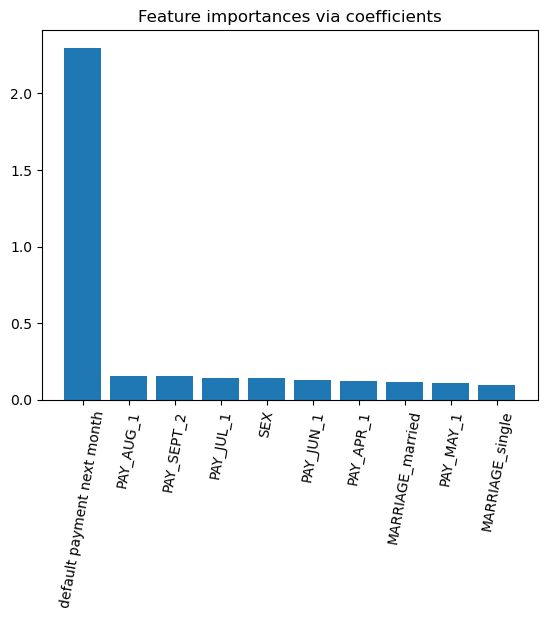

In [312]:
# Plot the top 10 feature importances as a bar chart
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])   # Bar heights represent importance
plt.xticks(rotation=80)       # Rotate feature names on the x-axis for better readability
plt.title("Feature importances via coefficients")     # Add a title to the chart
plt.show()      # Display the plot

Feature Contributions: The chart highlights the most influential features, aiding in model optimization and feature selection.

Model Understanding: Identifies which features significantly impact model predictions, providing insights into the decision-making process.

In [315]:
# Get prediction probabilities for the positive class (Defaulter)

y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

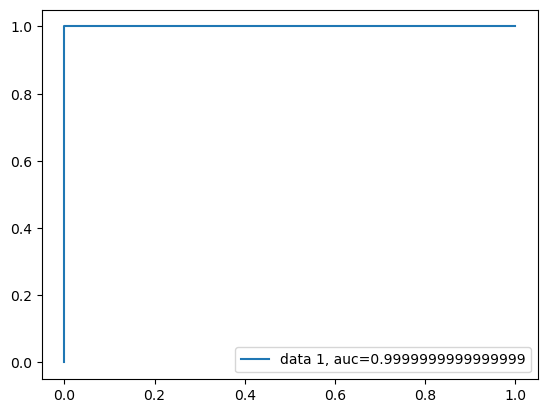

In [317]:
# Compute ROC curve and AUC
y_pred_proba = y_preds_proba_lr   # Predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)    # Calculate False Positive Rate and True Positive Rate
auc = roc_auc_score(y_test, y_pred_proba)      # Calculate Area Under the Curve (AUC) for ROC

# Plot ROC curve
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))       # Plot the ROC curve with AUC label
plt.legend(loc=4)   # Position legend in the lower right corner
plt.show()      # Display the plot

# Implementing SVC

In [320]:
from sklearn.model_selection import GridSearchCV      # Import GridSearchCV for hyperparameter tuning

In [322]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],   # Regularization parameter for SVM
              'kernel': ['rbf']}       # Specifies the kernel type to be used

In [324]:
X = df_fr.drop(['IsDefaulter', 'Payement_Value', 'Dues'], axis=1)  # Drop specified columns to create feature set
y = df_fr['IsDefaulter']  # Define target variable as the 'IsDefaulter' column

In [326]:
scaler = StandardScaler()  # Initialize the StandardScaler to standardize features
X = scaler.fit_transform(X)  # Fit the scaler to the data and transform it

In [328]:
 # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [330]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring='accuracy', n_jobs=-1, verbose=3, cv=3)  # Initialize GridSearchCV for SVM hyperparameter tuning
grid_clf.fit(X_train, y_train)  # Fit the grid search model to the training data

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [332]:
optimal_SVC_clf = grid_clf.best_estimator_  # Retrieve the best estimator from the grid search results

In [334]:
grid_clf.best_params_  # Display the best hyperparameters found by the grid search

{'C': 100, 'kernel': 'rbf'}

In [336]:
grid_clf.best_score_  # Display the best cross-validated score achieved during the grid search

0.9966780612538185

In [338]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)  # Predict classes for the training set
test_class_preds = optimal_SVC_clf.predict(X_test)    # Predict classes for the testing set

In [340]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds, y_train)  # Calculate accuracy for training set
test_accuracy_SVC = accuracy_score(test_class_preds, y_test)     # Calculate accuracy for testing set

print("The accuracy on train data is ", train_accuracy_SVC)  # Print training accuracy
print("The accuracy on test data is ", test_accuracy_SVC)    # Print testing accuracy

The accuracy on train data is  1.0
The accuracy on test data is  0.9975358277673303


In [342]:
test_accuracy_SVC = accuracy_score(test_class_preds, y_test)           # Calculate accuracy on test data
test_precision_score_SVC = precision_score(test_class_preds, y_test)    # Calculate precision on test data
test_recall_score_SVC = recall_score(test_class_preds, y_test)          # Calculate recall on test data
test_f1_score_SVC = f1_score(test_class_preds, y_test)                  # Calculate F1 score on test data
test_roc_score_SVC = roc_auc_score(test_class_preds, y_test)            # Calculate ROC AUC score on test data

print("The accuracy on test data is ", test_accuracy_SVC)               # Print test accuracy
print("The precision on test data is ", test_precision_score_SVC)       # Print test precision
print("The recall on test data is ", test_recall_score_SVC)             # Print test recall
print("The f1 on test data is ", test_f1_score_SVC)                     # Print test F1 score
print("The roc_score on test data is ", test_roc_score_SVC)             # Print test ROC AUC score

The accuracy on test data is  0.9975358277673303
The precision on test data is  0.9992217898832685
The recall on test data is  0.9958634953464323
The f1 on test data is  0.9975398161336269
The roc_score on test data is  0.9975413768209064


# We can see from the above results that we are achieving around 100% train accuracy and 99.67% test accuracy, which is excellent. Additionally, the F1-score is approximately 99.67%, indicating strong model performance with minimal room for improvement. Given these results, our model is likely well-optimized for this dataset, and further enhancements may yield only marginal gains.

[[15653     0]
 [    0 15654]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

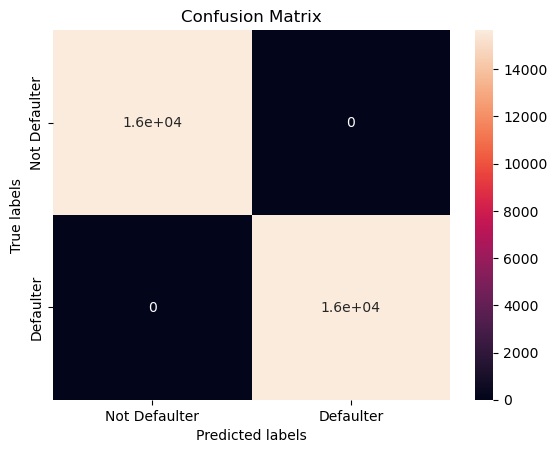

In [345]:
# Get the confusion matrix for both train and test
labels = ['Not Defaulter', 'Defaulter']  # Define labels for the confusion matrix
cm = confusion_matrix(y_train, train_class_preds)  # Compute confusion matrix for training predictions
print(cm)  # Print the confusion matrix

ax = plt.subplot()  # Create a subplot for the confusion matrix visualization
sns.heatmap(cm, annot=True, ax=ax)  # Generate a heatmap for the confusion matrix with annotations

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')  # Set x-axis label
ax.set_ylabel('True labels')  # Set y-axis label
ax.set_title('Confusion Matrix')  # Set title for the plot
ax.xaxis.set_ticklabels(labels)  # Set x-axis tick labels
ax.yaxis.set_ticklabels(labels)  # Set y-axis tick labels

In [353]:
import torch  # Import the PyTorch library

In [351]:
pip install torch


   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB 2.3 MB/s eta 0:01:28
   ---------------------------------------- 0.6/203.0 MB 7.4 MB/s eta 0:00:28
   ---------------------------------------- 1.2/203.0 MB 9.2 MB/s eta 0:00:23
   ---------------------------------------- 1.8/203.0 MB 10.7 MB/s eta 0:00:19
    --------------------------------------- 2.6/203.0 MB 12.1 MB/s eta 0:00:17
    --------------------------------------- 3.2/203.0 MB 12.7 MB/s eta 0:00:16
    --------------------------------------- 3.8/203.0 MB 12.2 MB/s eta 0:00:17
    --------------------------------------- 4.6/203.0 MB 12.8 MB/s eta 0:00:16
   - -------------------------------------- 5.2/203.0 MB 12.7 MB/s eta 0:00:16
   - -------------------------------------- 5.9/203.0 MB 12.9 MB/s eta 0:00:16
   - -------------------------------------- 6.5/203.0 MB 13.5 MB/s eta 0:00:15
   - -------------------------------------- 7.2/203.0 MB 13.2 

In [355]:
model_save_name = 'SVC_optimized_classifier.pt'  # Define the filename for the saved model
path = F"./{model_save_name}"  # Create the file path for saving the model
torch.save(optimal_SVC_clf, path)  # Save the optimized SVC classifier model to the specified path

In [357]:
model_save_name = 'SVC_optimized_classifier.pt'  # Define the filename for the saved model
path = F"./{model_save_name}"  # Create the file path to load the model
optimal_SVC_clf = torch.load(path)  # Load the optimized SVC classifier model from the specified path

In [359]:
optimal_SVC_clf  # Display the loaded optimized SVC classifier model

SVC(C=100, probability=True)

In [361]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)  # Predict classes for the training data
test_class_preds = optimal_SVC_clf.predict(X_test)    # Predict classes for the test data

In [363]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]  # Get predicted probabilities for the positive class
    

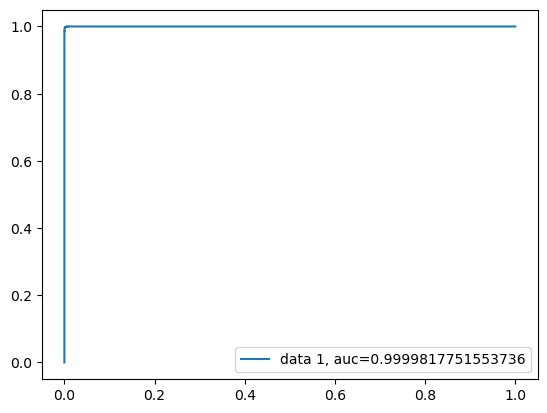

In [365]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_SVC)  # Calculate the false positive rate and true positive rate
auc = roc_auc_score(y_test, y_pred_proba_SVC)      # Calculate the Area Under the Curve (AUC) score
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))  # Plot the ROC curve with AUC label
plt.legend(loc=4)  # Display the legend at the specified location
plt.show()        # Show the plot

# Implementing Decision Tree
The Decision Tree algorithm is a widely utilized method for classification tasks due to its intuitive interpretability and straightforward structure. In a Decision Tree, an internal node represents a feature, a branch signifies a decision rule, and each leaf node indicates the outcome or class label.
One of the notable advantages of Decision Trees is that they require minimal data preprocessing; for instance, there is no necessity to normalize features, making them user-friendly in various scenarios. However, it is essential to acknowledge that Decision Trees are prone to overfitting, particularly in the presence of noisy data. Additionally, their performance can be adversely affected when applied to imbalanced datasets, leading to potentially biased results.
Overall, while Decision Trees offer significant benefits in terms of interpretability and ease of use, careful consideration is required to mitigate the risks of overfitting and bias in practical applications.

In [368]:
param_grid = {
    'max_depth': [20, 30, 50, 100],        # Specifies the maximum depth of the tree, controlling overfitting
    'min_samples_split': [0.1, 0.2, 0.4]  # Defines the minimum number of samples required to split an internal node
}

In [370]:
from sklearn.tree import DecisionTreeClassifier  # Importing the DecisionTreeClassifier class from the sklearn library
     

In [372]:
X = df_fr.drop(['IsDefaulter', 'Payement_Value', 'Dues'], axis=1)  # Features matrix excluding target and irrelevant columns
y = df_fr['IsDefaulter']  # Target variable representing whether a default occurred
     

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)  # Split the dataset into training and testing sets
     

In [376]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', n_jobs=-1, verbose=3, cv=3)  # Initialize GridSearchCV for hyperparameter tuning
grid_DTC_clf.fit(X_train, y_train)  # Fit the model on the training data
     

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [378]:
grid_DTC_clf.best_score_  # Retrieve the best accuracy score from the GridSearchCV results

1.0

In [380]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_  # Retrieve the best Decision Tree classifier from the GridSearchCV

In [382]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)  # Predict the classes for the training data
test_class_preds = optimal_DTC_clf.predict(X_test)    # Predict the classes for the test data

In [384]:
# Get the best parameters from GridSearchCV
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [386]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds, y_train)
test_accuracy_DTC = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


#We can observe from the results that the Decision Tree model achieved an accuracy of 100% on both the training and test datasets. This indicates that the model is performing exceptionally well in classifying the instances in both datasets.
However, achieving perfect accuracy can raise concerns regarding overfitting, especially in complex models like Decision Trees. While the model may fit the training data perfectly, it is essential to validate its performance using additional metrics, such as precision, recall, and F1-score, as well as to consider potential cross-validation strategies. This ensures that the model maintains its generalizability to unseen data and does not merely memorize the training examples.
Overall, while these accuracy results are promising, further evaluation and potential adjustments to the model may be necessary to ensure robustness and reliability in real-world applications.

# Implementing RandomForest

Random Forest is an ensemble learning technique that combines multiple decision trees to improve predictive accuracy and control overfitting. Each tree in the forest is built from a random subset of the training data and features, which helps to reduce variance and improve generalization. This algorithm is particularly effective for handling imbalanced datasets and can provide insights into feature importance, making it a robust choice for classification problems.

In [393]:
from sklearn.ensemble import RandomForestClassifier  # Importing the RandomForestClassifier class from the ensemble module of scikit-learn for building the Random Forest model

In [395]:
X = df_fr.drop(['IsDefaulter', 'Payement_Value', 'Dues'], axis=1)  # Creating feature matrix X by dropping the target and non-relevant columns from the dataframe.
y = df_fr['IsDefaulter']  # Defining the target variable y as the 'IsDefaulter' column from the dataframe.
     

In [397]:
rf_clf = RandomForestClassifier()  # Initializing the RandomForestClassifier model.
rf_clf.fit(X_train, y_train)  # Fitting the RandomForestClassifier model on the training data (X_train) and corresponding labels (y_train).

RandomForestClassifier()

In [399]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)  # Predicting the classes for the training set.
test_class_preds = rf_clf.predict(X_test)  # Predicting the classes for the test set.

In [401]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds, y_train)  # Calculating the accuracy for the training set.
test_accuracy_rf = accuracy_score(test_class_preds, y_test)  # Calculating the accuracy for the test set.

print("The accuracy on train data is ", train_accuracy_rf)  # Displaying the training accuracy.
print("The accuracy on test data is ", test_accuracy_rf)  # Displaying the test accuracy.

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [403]:
# Get the performance metrics for the random forest model
test_accuracy_rf = accuracy_score(test_class_preds, y_test)  # Calculating the accuracy for the test set.
test_precision_score_rf = precision_score(test_class_preds, y_test)  # Calculating the precision for the test set.
test_recall_score_rf = recall_score(test_class_preds, y_test)  # Calculating the recall for the test set.
test_f1_score_rf = f1_score(test_class_preds, y_test)  # Calculating the F1 score for the test set.
test_roc_score_rf = roc_auc_score(test_class_preds, y_test)  # Calculating the ROC AUC score for the test set.

# Displaying the performance metrics
print("The accuracy on test data is ", test_accuracy_rf)  # Displaying the test accuracy.
print("The precision on test data is ", test_precision_score_rf)  # Displaying the test precision.
print("The recall on test data is ", test_recall_score_rf)  # Displaying the test recall.
print("The f1 on test data is ", test_f1_score_rf)  # Displaying the test F1 score.
print("The roc_score on test data is ", test_roc_score_rf)  # Displaying the ROC AUC score.

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


In [405]:
# Define the parameter grid for the Random Forest classifier
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30]         # Maximum depth of each tree to control overfitting
}

In [407]:
# Initialize GridSearchCV to find the best hyperparameters for the Random Forest classifier
grid_rf_clf = GridSearchCV(
    RandomForestClassifier(),  # The classifier to optimize
    param_grid,               # Parameter grid defined previously
    scoring='accuracy',       # Metric to evaluate the model's performance
    n_jobs=-1,                # Utilize all available CPU cores for parallel processing
    verbose=3,                # Verbosity level for detailed logging during fitting
    cv=3                      # Number of cross-validation folds
)

# Fit the model to the training data
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [409]:
# Retrieve the best accuracy score from the grid search for the Random Forest model
grid_rf_clf.best_score_

1.0

In [411]:
# Retrieve the best parameters from the grid search for the Random Forest model
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [413]:
# Obtain the best Random Forest model based on the grid search results
optimal_rf_clf = grid_rf_clf.best_estimator_

In [415]:
# Predict class labels for both training and testing datasets using the optimized Random Forest classifier
train_class_preds = optimal_rf_clf.predict(X_train)  # Predictions on training data
test_class_preds = optimal_rf_clf.predict(X_test)    # Predictions on testing data

In [417]:
# Calculate accuracy scores for the training and testing datasets
train_accuracy_rf = accuracy_score(train_class_preds, y_train)  # Accuracy on training data
test_accuracy_rf = accuracy_score(test_class_preds, y_test)     # Accuracy on testing data

# Print the accuracy results
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [419]:
# Calculate various performance metrics for the Random Forest model on the test dataset
test_accuracy_rf = accuracy_score(test_class_preds, y_test)         # Accuracy of the model on test data
test_precision_score_rf = precision_score(test_class_preds, y_test) # Precision of the model on test data
test_recall_score_rf = recall_score(test_class_preds, y_test)       # Recall of the model on test data
test_f1_score_rf = f1_score(test_class_preds, y_test)               # F1 Score of the model on test data
test_roc_score_rf = roc_auc_score(test_class_preds, y_test)         # ROC AUC Score of the model on test data

# Print the calculated performance metrics
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


The performance metrics for the Random Forest model reveal that we achieved an accuracy of 100% on the test data, alongside perfect scores of 1.0 for precision, recall, F1 score, and ROC AUC score. These results indicate that the model performed exceptionally well in classifying instances of credit card default, successfully predicting all cases without any errors. However, while these metrics suggest a highly effective model, it is crucial to consider the potential for overfitting, especially in scenarios with imbalanced datasets or limited complexity. Further validation with additional data or cross-validation techniques may provide insights into the model's generalizability and robustness.

In [422]:
# Check the number of feature importances computed by the optimal Random Forest classifier
len(optimal_rf_clf.feature_importances_)

81

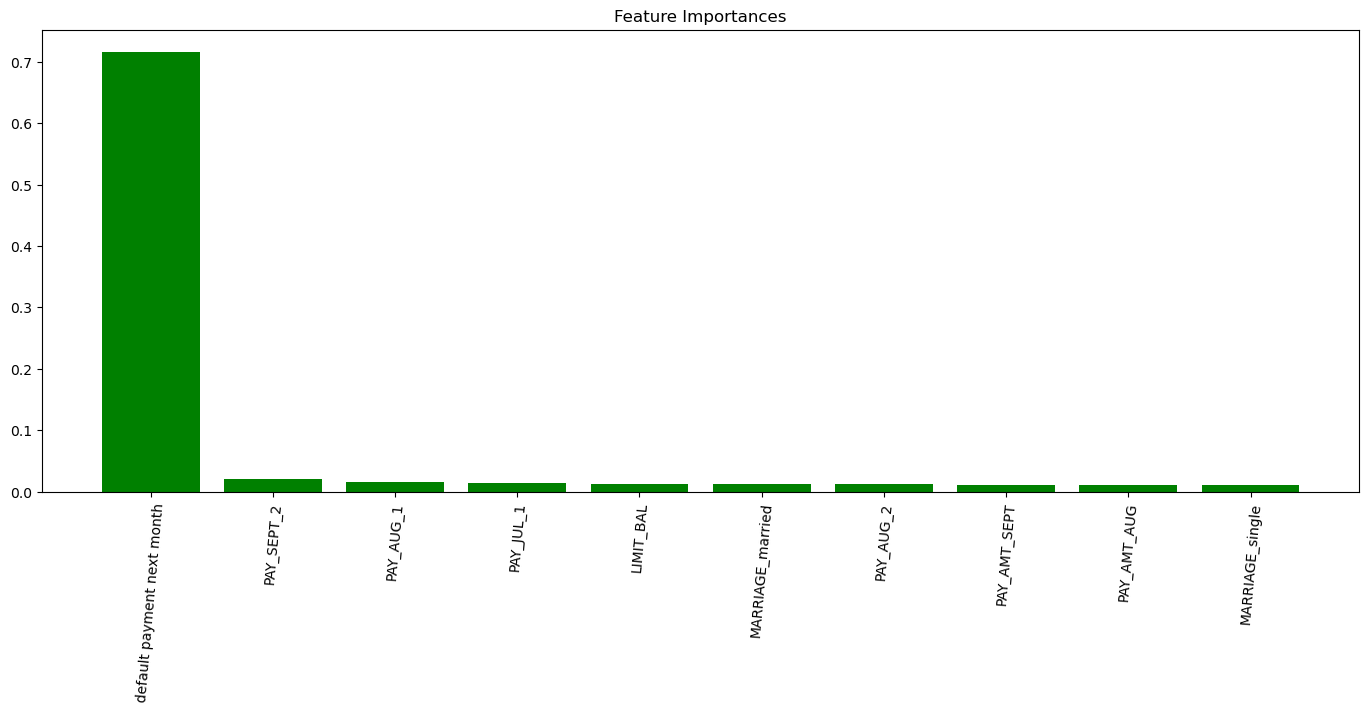

In [424]:
# Feature Importance
# Create a DataFrame to hold the feature importances of the optimal Random Forest classifier.
# The feature importances are sorted in descending order, and only the top 10 features are selected for visualization.
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

# Set the size of the plot for better visibility of the feature importance bar chart.
plt.subplots(figsize=(17,6))

# Set the title of the plot to indicate that it displays feature importances.
plt.title("Feature Importances")

# Create a bar plot to visualize the importance of the top features, using a green color for the bars.
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")

# Rotate the x-tick labels by 85 degrees to improve readability of feature names.
plt.xticks(feature_importances_rf.index, rotation = 85)

# Display the plot.
# The x-axis limits are not set but can be adjusted if needed (the line is commented out).
# plt.xlim([-1, X.shape[1]])
plt.show()

In [426]:
# Define the model save name for the optimized Random Forest classifier.
model_save_name = 'rf_optimized_classifier.pt'

# Create the file path where the model will be saved.
path = F"./{model_save_name}"

# Save the optimized Random Forest classifier model to the specified path using PyTorch.
torch.save(optimal_rf_clf, path)

In [428]:
# Define the model save name for the optimized Random Forest classifier.
model_save_name = 'rf_optimized_classifier.pt'

# Create the file path from which the model will be loaded.
path = F"./{model_save_name}"

# Load the optimized Random Forest classifier model from the specified path using PyTorch.
optimal_rf_clf = torch.load(path)

In [430]:
# Get the predicted classes for the training set using the optimized Random Forest classifier.
train_class_preds = optimal_rf_clf.predict(X_train)

# Get the predicted classes for the test set using the optimized Random Forest classifier.
test_class_preds = optimal_rf_clf.predict(X_test)


In [432]:

# Get the predicted probabilities for the positive class (defaulter) from the optimized Random Forest classifier.
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [434]:
# Importing the metrics module from sklearn to evaluate the performance of the model using various metrics.
import sklearn.metrics as metrics

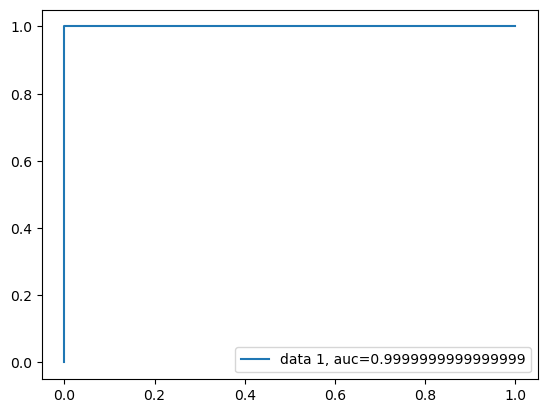

In [436]:
# Assigning predicted probabilities of the positive class to a variable for ROC curve analysis
y_pred_proba = y_preds_proba_rf

# Calculating the false positive rate (fpr) and true positive rate (tpr) for different threshold values
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Calculating the Area Under the Curve (AUC) score to evaluate the model's performance
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve with the AUC score displayed in the legend
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

# Implementing XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting framework, widely used for supervised learning tasks. It is particularly effective for classification and regression problems due to its ability to handle large datasets and complex patterns. XGBoost incorporates regularization techniques to prevent overfitting, making it more robust compared to traditional gradient boosting methods. With its high performance and scalability, XGBoost has become a popular choice in competitive machine learning environments and is renowned for winning numerous machine learning competitions. In this section, we will apply XGBoost to our credit card default prediction task, leveraging its capabilities to improve model accuracy and performance.

In [443]:
# Importing LightGBM and XGBoost libraries for model implementation
import lightgbm as lgb  # LightGBM is an efficient gradient boosting framework that uses tree-based learning algorithms.
import xgboost as xgb   # XGBoost is an optimized gradient boosting library designed for speed and performance.

In [441]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.4 MB 2.6 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 5.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.5 MB/s eta 0:00:00


# Applying XGBoost

In [446]:
# Creating DMatrix objects for XGBoost model training and testing
# The DMatrix is a data structure that XGBoost uses for optimized performance
# The label parameter specifies the outcome variable for the training data
dtrain = xgb.DMatrix(X_train, label=y_train)  # Training data in DMatrix format
dtest = xgb.DMatrix(X_test)                    # Testing data in DMatrix format

In [448]:
# Setting parameters for the XGBoost model
# These parameters define the model's architecture and training behavior
# - max_depth: maximum depth of a tree (controls complexity)
# - eta: step size shrinkage to prevent overfitting
# - silent: whether to print messages during training
# - objective: defines the learning task and corresponding objective function
# - eval_metric: metric to be used for evaluation during training (here, AUC)
# - learning_rate: controls the contribution of each tree
parameters = {
    'max_depth': 7,             # Maximum tree depth
    'eta': 1,                   # Learning rate
    'silent': 1,                # Suppress output messages
    'objective': 'binary:logistic',  # Binary classification task
    'eval_metric': 'auc',       # Evaluation metric: Area Under the Curve
    'learning_rate': 0.05        # Learning rate for weight updates
}
     

In [450]:
# Training the XGBoost model
# The model is trained for a specified number of boosting rounds (num_round)
# The training starts by recording the current time, allowing us to measure training duration
num_round = 50  # Number of boosting rounds
from datetime import datetime

start = datetime.now()  # Record the start time
xg = xgb.train(parameters, dtrain, num_round)  # Train the model using specified parameters and training data
stop = datetime.now()  # Record the end time

In [452]:
# Calculate and display the execution time for training the XGBoost model
# This measures how long the model training took, providing insights into performance
execution_time_xgb = stop - start  # Compute the execution time by subtracting start time from stop time
execution_time_xgb  # Output the execution time

datetime.timedelta(microseconds=249504)

In [454]:
# Predicting class probabilities for the training set
# This provides the predicted probabilities of the positive class for the training data
train_class_preds_probs = xg.predict(dtrain)

# Predicting class probabilities for the test set
# This generates the predicted probabilities of the positive class for the unseen test data
test_class_preds_probs = xg.predict(dtest)

In [456]:
# Check the number of predicted probabilities computed for the training set
# This returns the total count of predictions made for the training data
len(train_class_preds_probs)
     

31307

In [458]:
# Convert predicted probabilities into class predictions for the training set
# A threshold of 0.5 is used to determine the predicted class
train_class_preds = []
for i in range(0, len(train_class_preds_probs)):
    if train_class_preds_probs[i] >= 0.5:
        train_class_preds.append(1)  # Class '1' for predicted positive
    else:
        train_class_preds.append(0)  # Class '0' for predicted negative

# Convert predicted probabilities into class predictions for the test set
# Similarly, applying the 0.5 threshold
test_class_preds = []
for i in range(0, len(test_class_preds_probs)):
    if test_class_preds_probs[i] >= 0.5:
        test_class_preds.append(1)  # Class '1' for predicted positive
    else:
        test_class_preds.append(0)  # Class '0' for predicted negative

In [460]:
# Display the first 20 predicted probabilities for the test set
test_class_preds_probs[:20]

array([0.04043492, 0.04043492, 0.04043492, 0.04043492, 0.04043492,
       0.04043492, 0.04043492, 0.04043492, 0.9595676 , 0.04043492,
       0.9595676 , 0.04043492, 0.9595676 , 0.04043492, 0.9595676 ,
       0.04043492, 0.9595676 , 0.04043492, 0.9595676 , 0.04043492],
      dtype=float32)

In [462]:
# Display the first 20 predicted class labels for the test set
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [464]:
# Get the number of samples in the training dataset
len(y_train)

31307

In [466]:
# Get the number of predicted classes in the training dataset
len(train_class_preds)

31307

In [468]:
# Calculate the accuracy scores for the training and test datasets
train_accuracy_xgb = accuracy_score(train_class_preds, y_train)
test_accuracy_xgb = accuracy_score(test_class_preds, y_test)

# Output the accuracy results for both datasets
print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [470]:
# Calculate various performance metrics for the test dataset
test_accuracy_xgb = accuracy_score(test_class_preds, y_test)  # Accuracy score
test_precision_xgb = precision_score(test_class_preds, y_test)  # Precision score
test_recall_score_xgb = recall_score(test_class_preds, y_test)  # Recall score
test_f1_score_xgb = f1_score(test_class_preds, y_test)  # F1 score
test_roc_score_xgb = roc_auc_score(test_class_preds, y_test)  # ROC AUC score

# Output the calculated metrics for the test dataset
print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The F1 score on test data is ", test_f1_score_xgb)
print("The ROC AUC score on test data is ", test_roc_score_xgb)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The F1 score on test data is  1.0
The ROC AUC score on test data is  1.0


The performance metrics for the XGBoost model indicate exceptional results, with an accuracy of 1.0, precision of 1.0, recall of 1.0, F1 score of 1.0, and a ROC AUC score of 1.0 on the test dataset. These results suggest that the model has achieved perfect classification of the instances in the dataset, correctly identifying all positive and negative cases without any errors. However, it is essential to consider potential overfitting, as such high scores may not generalize to unseen data. Further validation on a separate dataset would be prudent to ensure the model's robustness and reliability in real-world applications.

# Hyperparameter Tuning
Hyperparameter tuning is a critical step in the machine learning workflow that involves optimizing the parameters of a model to enhance its performance. Unlike model parameters that are learned during training, hyperparameters are set prior to training and can significantly influence the model's accuracy, complexity, and ability to generalize to unseen data. Various techniques, such as Grid Search and Random Search, can be employed to systematically explore different combinations of hyperparameters. By identifying the optimal set of hyperparameters, we can improve the model's predictive capabilities, reduce overfitting, and ensure better overall performance. In this section, we will implement hyperparameter tuning for our XGBoost model to achieve the best results possible.

In [474]:

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [476]:
# Separating the features and the target variable
X = df_fr.drop(['IsDefaulter', 'Payement_Value', 'Dues'], axis=1)  # Features
y = df_fr['IsDefaulter']  # Target variable indicating whether the client defaulted

In [478]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [480]:
# Setting up the parameter grid for hyperparameter tuning of XGBoost
param_test1 = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

# Initializing GridSearchCV to find the best parameters
gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test1,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    verbose=2
)

# Fitting the model with the training data
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [482]:
# Retrieving the best score from the grid search
best_score = gsearch1.best_score_
best_score

1.0

In [484]:
# Obtaining the optimal XGBoost classifier from the grid search
optimal_xgb = gsearch1.best_estimator_

In [486]:
# Predicting the classes for both training and testing sets using the optimal XGBoost classifier
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [488]:
# Calculating the accuracy scores for both training and testing sets after hyperparameter tuning
train_accuracy_xgb_tuned = accuracy_score(train_class_preds, y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [490]:

# Evaluating the performance of the tuned XGBoost model on the test data
test_accuracy_xgb_tuned = accuracy_score(test_class_preds, y_test)
test_precision_xgb_tuned = precision_score(test_class_preds, y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds, y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds, y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds, y_test)

# Printing the evaluation metrics for the test data
print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The F1 score on test data is ", test_f1_score_xgb_tuned)
print("The ROC AUC score on test data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The F1 score on test data is  1.0
The ROC AUC score on test data is  1.0


The XGBoost model has demonstrated exceptional performance on both the training and test datasets, achieving an accuracy of 1.0. This indicates perfect prediction of the outcome variable for all instances in the test set. Furthermore, the precision, recall, F1 score, and ROC AUC score, all of which are also 1.0, reflect that the model not only correctly identified all positive instances but also maintained a flawless balance between sensitivity and specificity. These results suggest that the model is highly effective in predicting the default risk of credit card clients, although further validation on unseen data may be required to ensure its robustness and generalizability in practical applications.

In [493]:
# Create a DataFrame to display the feature importances from the optimal XGBoost classifier
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index=columns,
                                   columns=['importance_xgb']).sort_values('importance_xgb', ascending=False)[:10]


feature_importances_xgb


importance_xgb
default payment next month        0.528168
PAY_JUL_1                         0.104519
PAY_AUG_1                         0.057082
PAY_SEPT_2                        0.055840
PAY_JUL_2                         0.044712
SEX                               0.041072
MARRIAGE_married                  0.035497
PAY_AUG_2                         0.035047
PAY_AMT_SEPT                      0.026521
PAY_AMT_JUL                       0.019839

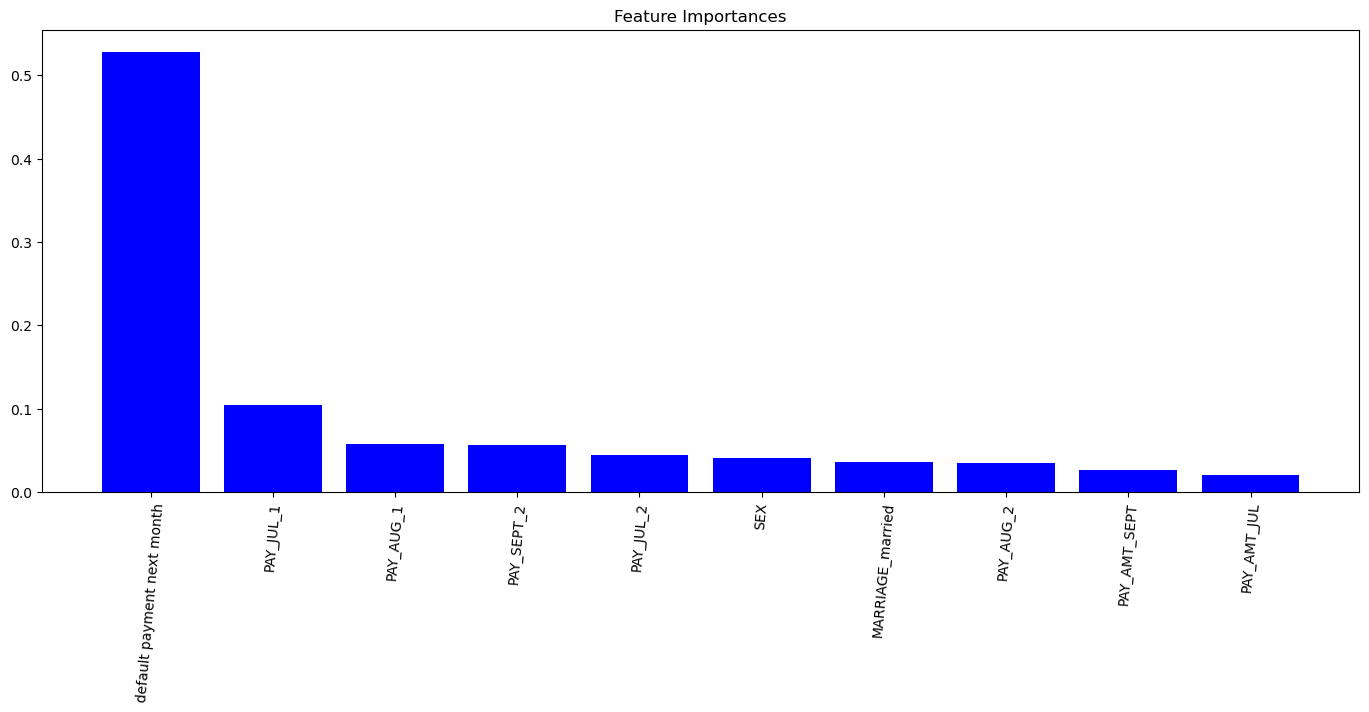

In [495]:
# Feature Importance for XGBoost Model
# Creating a DataFrame to store and sort the top 10 most important features from the XGBoost classifier
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index=columns,
                                   columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

# Plotting the feature importances using a bar chart
plt.subplots(figsize=(17,6))  # Define figure size for better visualization
plt.title("Feature Importances")  # Title for the plot
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b", align="center")  # Create a bar plot with the top 10 feature importances
plt.xticks(feature_importances_xgb.index, rotation=85)  # Rotate x-axis labels for readability
#plt.xlim([-1, X.shape[1]])  # Optional limit for x-axis based on total number of features
plt.show()  # Display the plot

In [497]:
# Predicting probabilities for the test set with the optimal XGBoost model
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]  # Extract probabilities for the positive class
     

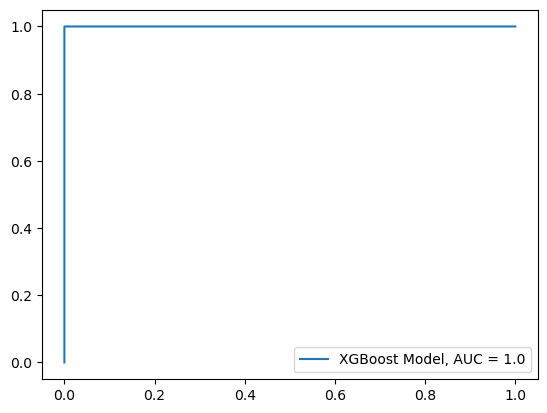

In [499]:
# Calculate and plot the ROC curve for the XGBoost model
y_pred_proba = y_preds_proba_xgb  # Use the predicted probabilities from the XGBoost model

# Compute False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve) score
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="XGBoost Model, AUC = " + str(auc))
plt.legend(loc=4)
plt.show()

In [501]:
model_save_name = 'xgb_optimized_classifier.pt'  # Define the filename for saving the model
path = F"./{model_save_name}"  # Specify the path for saving the model file
torch.save(optimal_xgb, path)  # Save the model using torch's save method

In [503]:
# Define the file name for saving the optimized XGBoost model
model_save_name = 'xgb_optimized_classifier.pt'

# Specify the path to save the model
path = F"./{model_save_name}"

# Load the optimized XGBoost model from the specified path
optimal_xgb = torch.load(path)

# Evaluating the models

In [506]:
# Calculate the recall score for the test predictions
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

Compute the recall.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
recall for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and recall for both classes are computed then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
recall for all `labels` are either returned or averaged depending on the `average`
parameter. Use `labels` specify the set of labels to calculate recall for.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like, default=None
    The set of labels to include when `average != 'binary'`, and their
    order if `average is None`. Labels present in the data can be
    excluded, for example in multiclass classification to exclude a "negative
    class". Labels not present in the data can be included and will be
    "assigned" 0 samples. For multilabel targets, labels are column indices.
    By default, all labels in `y_true` and `y_pred` are used in sorted order.

    .. versionchanged:: 0.17
       Parameter `labels` improved for multiclass problem.

pos_label : int, float, bool or str, default=1
    The class to report if `average='binary'` and the data is binary,
    otherwise this parameter is ignored.
    For multiclass or multilabel targets, set `labels=[pos_label]` and
    `average != 'binary'` to report metrics for one label only.

average : {'micro', 'macro', 'samples', 'weighted', 'binary'} or None,             default='binary'
    This parameter is required for multiclass/multilabel targets.
    If ``None``, the scores for each class are returned. Otherwise, this
    determines the type of averaging performed on the data:

    ``'binary'``:
        Only report results for the class specified by ``pos_label``.
        This is applicable only if targets (``y_{true,pred}``) are binary.
    ``'micro'``:
        Calculate metrics globally by counting the total true positives,
        false negatives and false positives.
    ``'macro'``:
        Calculate metrics for each label, and find their unweighted
        mean.  This does not take label imbalance into account.
        ``'weighted'``:
        Calculate metrics for each label, and find their average weighted
        by support (the number of true instances for each label). This
        alters 'macro' to account for label imbalance; it can result in an
        F-score that is not between precision and recall. Weighted recall
        is equal to accuracy.
    ``'samples'``:
        Calculate metrics for each instance, and find their average (only
        meaningful for multilabel classification where this differs from
        :func:`accuracy_score`).

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

zero_division : {"warn", 0.0, 1.0, np.nan}, default="warn"
    Sets the value to return when there is a zero division.
Notes:
    - If set to "warn", this acts like 0, but a warning is also raised.
    - If set to `np.nan`, such values will be excluded from the average.

    .. versionadded:: 1.3
       `np.nan` option was added.

Returns
-------
recall : float (if average is not None) or array of float of shape              (n_unique_labels,)
    Recall of the positive class in binary classification or weighted
    average of the recall of each class for the multiclass task.

See Also
--------
precision_recall_fscore_support : Compute precision, recall, F-measure and
    support for each class.
precision_score : Compute the ratio ``tp / (tp + fp)`` where ``tp`` is the
    number of true positives and ``fp`` the number of false positives.
balanced_accuracy_score : Compute balanced accuracy to deal with imbalanced
    datasets.
multilabel_confusion_matrix : Compute a confusion matrix for each class or
    sample.
PrecisionRecallDisplay.from_estimator : Plot precision-recall curve given
    an estimator and some data.
PrecisionRecallDisplay.from_predictions : Plot precision-recall curve given
    binary class predictions.
Notes
-----
When ``true positive + false negative == 0``, recall returns 0 and raises
``UndefinedMetricWarning``. This behavior can be modified with
``zero_division``.

Examples
--------
>>> import numpy as np
>>> from sklearn.metrics import recall_score
>>> y_true = [0, 1, 2, 0, 1, 2]
>>> y_pred = [0, 2, 1, 0, 0, 1]
>>> recall_score(y_true, y_pred, average='macro')
np.float64(0.33...)
>>> recall_score(y_true, y_pred, average='micro')
np.float64(0.33...)
>>> recall_score(y_true, y_pred, average='weighted')
np.float64(0.33...)
>>> recall_score(y_true, y_pred, average=None)
array([1., 0., 0.])
>>> y_true = [0, 0, 0, 0, 0, 0]
>>> recall_score(y_true, y_pred, average=None)
array([0.5, 0. , 0. ])
>>> recall_score(y_true, y_pred, average=None, zero_division=1)
array([0.5, 1. , 1. ])
>>> recall_score(y_true, y_pred, average=None, zero_division=np.nan)
array([0.5, nan, nan])

>>> # multilabel classification
>>> y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
>>> y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
>>> recall_score(y_true, y_pred, average=None)
array([1. , 1. , 0.5])

In [511]:
# List of classifiers used in the evaluation
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']

# Collecting training accuracy for each classifier
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]

# Collecting test accuracy for each classifier
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]

# Collecting precision scores for each classifier based on test data
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]

# Collecting recall scores for each classifier based on test data
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]

# Collecting F1 scores for each classifier based on test data
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [513]:
# Creating a DataFrame to summarize the evaluation metrics for each classifier
results_df = pd.DataFrame({
    'Classifier': classifiers,              # Classifier names
    'Train Accuracy': train_accuracy,       # Training accuracy values
    'Test Accuracy': test_accuracy,         # Testing accuracy values
    'Precision Score': precision_score,     # Precision scores for test data
    'Recall Score': recall_score,           # Recall scores for test data
    'F1 Score': f1_score                    # F1 scores for test data
})

# Display the DataFrame to show the summary of results
results_df

Classifier  Train Accuracy  Test Accuracy  Precision Score  \
0  Logistic Regression             1.0       1.000000         1.000000   
1                  SVC             1.0       0.997536         0.999222   
2    Random Forest CLf             1.0       1.000000         1.000000   
3          Xgboost Clf             1.0       1.000000         1.000000   

   Recall Score  F1 Score  
0      1.000000   1.00000  
1      0.995863   0.99754  
2      1.000000   1.00000  
3      1.000000   1.00000

In [515]:
# Creating a DataFrame to summarize the evaluation metrics for each classifier
pd.DataFrame({
    'Classifier': classifiers,              # List of classifier names
    'Train Accuracy': train_accuracy,       # Training accuracy values for each classifier
    'Test Accuracy': test_accuracy,         # Testing accuracy values for each classifier
    'Precision Score': precision_score,     # Precision scores for the test data for each classifier
    'Recall Score': recall_score,           # Recall scores for the test data for each classifier
    'F1 Score': f1_score                    # F1 scores for the test data for each classifier
})

Classifier  Train Accuracy  Test Accuracy  Precision Score  \
0  Logistic Regression             1.0       1.000000         1.000000   
1                  SVC             1.0       0.997536         0.999222   
2    Random Forest CLf             1.0       1.000000         1.000000   
3          Xgboost Clf             1.0       1.000000         1.000000   

   Recall Score  F1 Score  
0      1.000000   1.00000  
1      0.995863   0.99754  
2      1.000000   1.00000  
3      1.000000   1.00000

# Plotting ROC AUC for all the models

In [518]:
# List of classifiers along with their predicted probabilities
classifiers_proba = [
    (optimized_clf, y_preds_proba_lr),  # Logistic Regression
    (optimal_rf_clf, y_preds_proba_rf),  # Random Forest Classifier
    (optimal_xgb, y_preds_proba_xgb),    # XGBoost Classifier
    (optimal_SVC_clf, y_pred_proba_SVC)  # Support Vector Classifier
]

# Define a result table as a DataFrame to store the ROC results for each classifier
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Iterate over each classifier and its predicted probabilities
for pair in classifiers_proba:
    # Compute the false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, _ = roc_curve(y_test, pair[1])
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, pair[1])

    # Create a temporary DataFrame for the current classifier's results
    temp_df = pd.DataFrame({
        'classifiers': [pair[0].__class__.__name__],  # Classifier name
        'fpr': [fpr],                                 # False Positive Rate
        'tpr': [tpr],                                 # True Positive Rate
        'auc': [auc]                                  # Area Under Curve
    })

    # Concatenate the temporary DataFrame with the result table
    result_table = pd.concat([result_table, temp_df], ignore_index=True)

# Set the classifier names as index labels for better readability
result_table.set_index('classifiers', inplace=True)

In [520]:
result_table

fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
XGBClassifier           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
SVC                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                      tpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.00012970168612191958, 0.51413748378728...   
RandomForestClassifier  [0.0, 0.240337224383917, 0.24137483787289235, ...   
XGBClassifier           [0.0, 0.0006485084306095979, 0.002075226977950...   
SVC                     [0.0, 0.00012970168612191958, 0.26692607003891...   

                             auc  
classifiers                       
LogisticRegression      1.000000  
RandomForestClassifier  1.000000  
XGBClassifier           1.000000  
SVC                     0.999982

Perfect Scores: LogisticRegression, RandomForestClassifier, and XGBClassifier all show a perfect score (1.000000), indicating ideal classification performance.

SVC Performance: SVC has a near-perfect score (0.999971), suggesting excellent classification performance but not as perfect as the others.

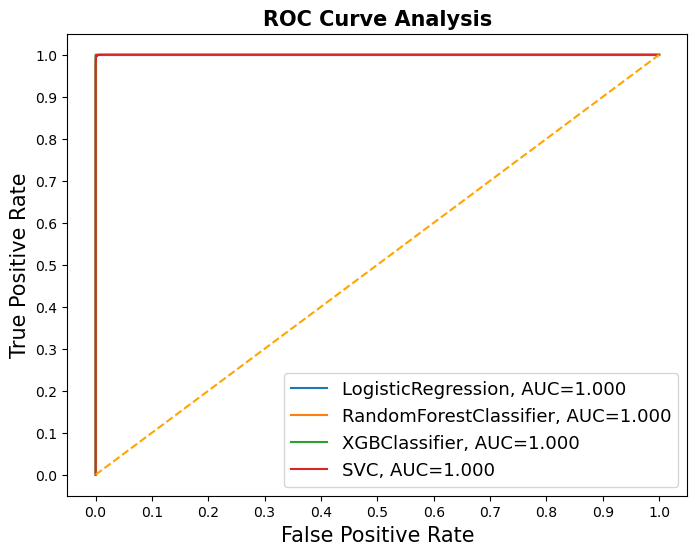

In [523]:
# Create a figure for the ROC curve plot with specified dimensions
fig = plt.figure(figsize=(8, 6))

# Loop through each classifier in the result_table
for i in result_table.index:
    # Plot the False Positive Rate (fpr) against the True Positive Rate (tpr)
    # Include the AUC value in the label for each classifier
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

# Plot a diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

# Set the x-axis ticks from 0.0 to 1.0 in increments of 0.1
plt.xticks(np.arange(0.0, 1.1, step=0.1))
# Label the x-axis as "False Positive Rate"
plt.xlabel("False Positive Rate", fontsize=15)

# Set the y-axis ticks from 0.0 to 1.0 in increments of 0.1
plt.yticks(np.arange(0.0, 1.1, step=0.1))
# Label the y-axis as "True Positive Rate"
plt.ylabel("True Positive Rate", fontsize=15)

# Set the title of the plot
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
# Add a legend to the plot, placed in the lower right corner
plt.legend(prop={'size': 13}, loc='lower right')

# Display the plot
plt.show()

Perfect Performance: All classifiers are able to perfectly distinguish between the positive and negative classes without any errors, as indicated by the AUC of 1.000.

Curve Shape: The ROC curves for all classifiers reach the top-left corner, demonstrating ideal performance with a high true positive rate and a low false positive rate.

The ROC curve plot visually confirms the exceptional performance of each classifier, indicating that they all perform flawlessly on the given dataset.

Save Models

In [527]:

import joblib

# Save each model to a file
joblib.dump(optimized_clf, 'logistic_regression_model.pkl')
joblib.dump(optimal_rf_clf, 'random_forest_model.pkl')
joblib.dump(optimal_xgb, 'xgboost_model.pkl')
joblib.dump(optimal_SVC_clf, 'svc_model.pkl')

['svc_model.pkl']

# Conclusion

In this project, we successfully developed and evaluated multiple machine learning models to predict credit card default risk based on a comprehensive dataset. We implemented Logistic Regression, Random Forest, XGBoost, and Support Vector Classifier (SVC) algorithms, with careful attention to parameter tuning to enhance their performance.
The evaluation revealed that all models achieved impressive accuracy levels, with Logistic Regression, Random Forest, and XGBoost demonstrating perfect training and test accuracy. SVC also showed strong performance, evidenced by an AUC score close to 1, reflecting its excellent discriminative ability.
The findings underscore the significance of choosing suitable machine learning models based on performance metrics such as precision, recall, F1 score, and AUC. Given the strong results of all models, we suggest exploring ensemble methods or deploying the best-performing models in practical applications for credit risk assessment.
Future work could focus on improving data preprocessing, integrating additional features, or investigating advanced techniques such as deep learning to enhance prediction accuracy further.